<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2 : House Prices - Advanced Regression Techniques
#### By: Samaher Alharbi  ,  Hanan Almohammadi, Nesreen Alqahtani


<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item">
<li><span><a href="#Introduction" ><span class="toc-item-num">&nbsp;&nbsp;</span>Introduction</a></span><ul class="toc-item">

<li><span><a href="#Datasets-Description" ><span class="toc-item-num">&nbsp;&nbsp;</span>Dataset description</a></span></li>
<li><span><a href="#Step1:--Problem-Statment"><span class="toc-item-num">&nbsp;&nbsp;</span>Problem Statment</a></span></li>
<li><span><a href="#Executive-Summary"><span class="toc-item-num">&nbsp;&nbsp;</span>Executive Summary</a></span></li>
</ul></li>
<li><span><a href="#Importing-the-Libraries" ><span class="toc-item-num">&nbsp;&nbsp;</span>Importing the Libraries</a></span>

<li><span><a href="#Step-2:-Data-Wrangling" ><span class="toc-item-num">&nbsp;&nbsp;</span>Data Wrangling</a></span>
    
<li><span><a href="#Step-3:-Data-Exploration" ><span class="toc-item-num">&nbsp;&nbsp;</span>Data Exploration</a></span>
<li><span><a href="#Step-4:-Data-Preprocessing" ><span class="toc-item-num">&nbsp;&nbsp;</span>Data Preprocessing</a></span>

    
<li><span><a href="#Step-5:--Modeling" ><span class="toc-item-num">&nbsp;&nbsp;</span>Prediction Models</a></span><ul class="toc-item">

<li><span><a href="#RidgeCV-model-:" ><span class="toc-item-num">&nbsp;&nbsp;</span> RidgeCV model</a></span></li>
    
<li><span><a href="#Ridge-model-:" ><span class="toc-item-num">&nbsp;&nbsp;</span> Ridge model </a></span></li>
    
<li><span><a href="#LassoCV-model-:" ><span class="toc-item-num">&nbsp;&nbsp;</span> LassoCV model</a></span></li>

<li><span><a href="#Lasso-model-:" ><span class="toc-item-num">&nbsp;&nbsp;</span> Lasso model</a></span></li>

<li><span><a href="#ElasticNetCV-model-:" ><span class="toc-item-num">&nbsp;&nbsp;</span> ElasticNetCV model</a></span></li>

<li><span><a href="#ElasticNet-model-:" ><span class="toc-item-num">&nbsp;&nbsp;</span> ElasticNet model</a></span></li>
    

<li><span><a href="#Random-Forest-Regressor-model-:" ><span class="toc-item-num">&nbsp;&nbsp;</span> Random Forest Regressor model </a></span></li>

    
<li><span><a href="#Random-Forest-Regressor-model-using-Pipeline-and-Grid-Search" ><span class="toc-item-num">&nbsp;&nbsp;</span> Random Forest Regressor model using Pipeline and Grid Search </a></span></li>

<li><span><a href="#Lasso-Grid-Search" ><span class="toc-item-num">&nbsp;&nbsp;</span> Lasso Grid Search</a></span></li>
    
    
<li><span><a href="#Support-Vector-Machine-(SVM)" ><span class="toc-item-num">&nbsp;&nbsp;</span> Support Vector Machine (SVM)</a></span></li>
    
    
<li><span><a href="#Gradient-Boosting-Regressor" ><span class="toc-item-num">&nbsp;&nbsp;</span> Gradient Boosting Regressor </a></span></li> </ul></li>


<li><span><a href="#Conclusion-and-Recommendations" ><span class="toc-item-num">&nbsp;&nbsp;</span>Conclusion and Recommendations</a></span></li></div>
  


# Introduction 

## Datasets Description 

[House prices ](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)
The dataset comes from a Kaggle competition named “House Prices: Advanced Regression Techniques”. It contains 1460 training data,1459 testing data and 80 features about houses and sales information.


## Executive Summary
After investigating the dataset, we built several machine learning models to predict the selling price of new houses. we reach lowest RMSE with Gradient Boosting Regressor approximtly 0.14
## Step1:  Problem Statment
The projet aims to predict the sale prices of new houses, which is given in the dataset, the problem is a supervised learning problem. Since house sales prices are continuous, this is a regression problem.







## Importing the Libraries 

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import tree 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
import math 
from sklearn.metrics import r2_score
np.set_printoptions(precision=4)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings("ignore")
sns.set(font_scale=1.5)

## Step 2: Data Wrangling

---

In [2]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

In [4]:
train.head()


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [5]:
test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6    2010        WD         Normal  
1   12500      6    2010        WD         Normal  
2       0      3    2010        WD         Normal  
3       0      6    2010        WD         Normal  
4       0      1    2010        WD         Normal  

[5 rows x 80 columns]

## Step 3: Data Exploration

---

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [574]:
train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [575]:
test.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MiscVal            int64
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
Length: 80, dtype: object

## Variable Identification

**Question: What features do you think is going to be important for House sales price?**


**Answer**: We select features according high corrlation with sale price (target)

OverallQual , GarageArea ,GrLivArea , TotalBsmtSF , YearBuilt , Fireplaces , FullBath ,MasVnrArea , YearRemodAdd , OpenPorchSF , BsmtFinSF1  , WoodDeckSF , LotFrontage  

- TotalBsmtSF: Total square feet of basement area
- OverallQual: Rates the overall material and finish of the house
- Fireplaces: Number of fireplaces
- FullBath: Full bathrooms above grade
- GarageArea: Size of garage in square feet
- YearBuilt: Original construction date
- GrLivArea: Above grade (ground) living area square feet
- MasVnrArea: Masonry veneer area in square feet
- YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)
- OpenPorchSF: Open porch area in square feet
- BsmtFinSF1: Type 1 finished square feet
- WoodDeckSF: Wood deck area in square feet
- LotFrontage: Linear feet of street connected to property

We will perform Univariate and Bi-variate analysis on the features you identified as important..




 - **Check Statistics:**

In [346]:
##
print("Statistics of the target variable (SalePrice) :")
print("--------------------------------")
print(train['SalePrice'].describe())
print("Skewness: %f" % (train['SalePrice']).skew())

Statistics of the target variable (SalePrice) :
--------------------------------
count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64
Skewness: 1.882876


**The target is apparently skewed (with a skewness value > 1).**

In [464]:
AC= train['SalePrice']
mean=AC.mean()
median=AC.median()
mode=AC.mode()
print('Mean: ',mean,'\nMedian: ',median,'\nMode: ',mode[0])

Mean:  180921.19589041095 
Median:  163000.0 
Mode:  140000


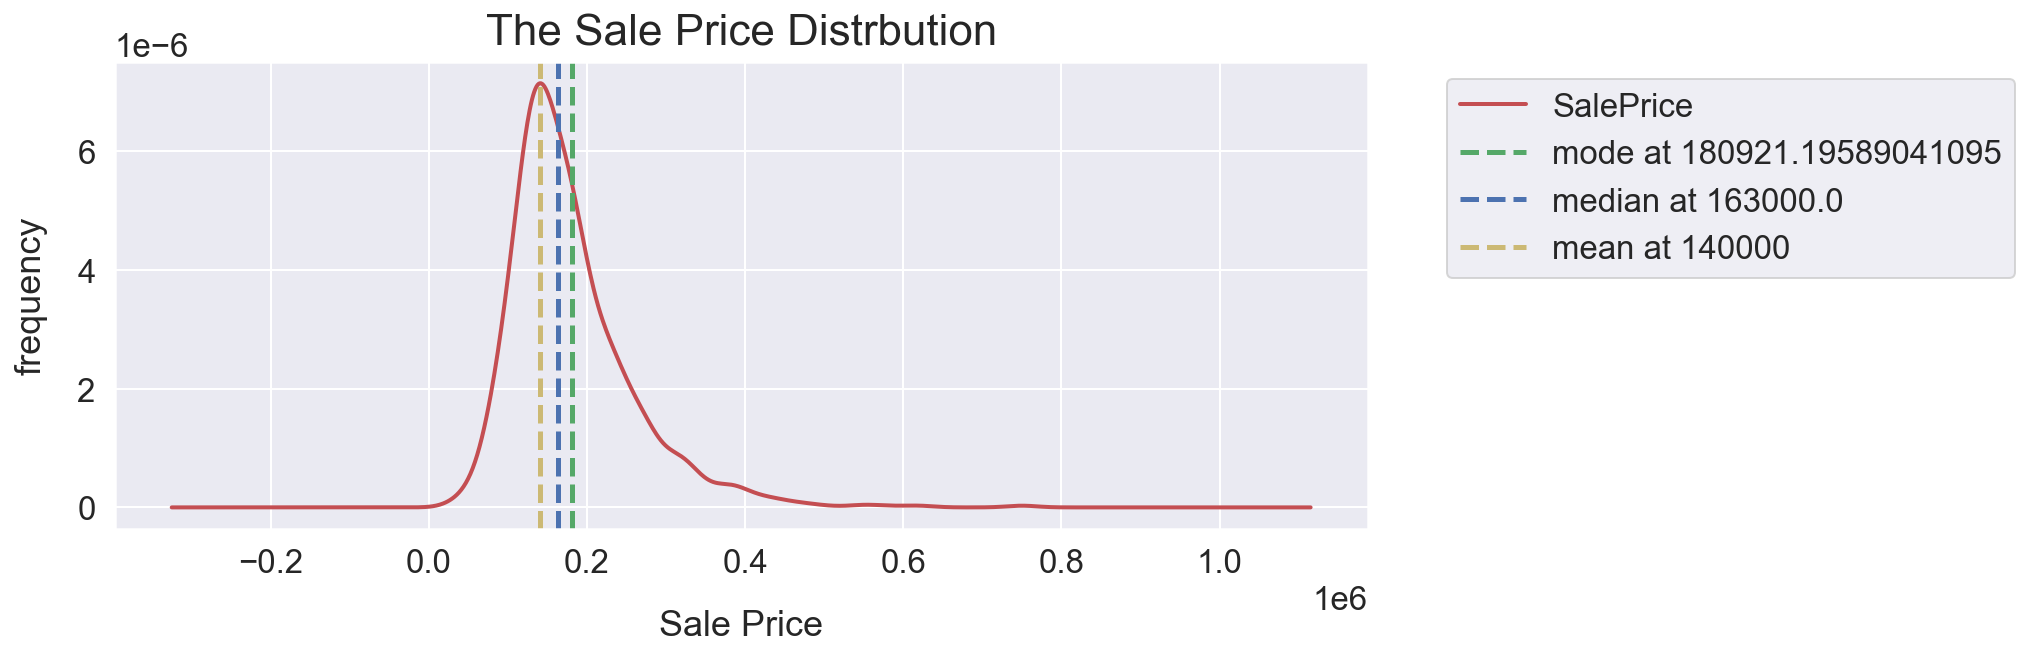

In [466]:
AC.plot(kind='density', figsize=(10, 4), linewidth=2, color='r')
        #')
plt.xlabel("Sale Price", labelpad=15)
plt.ylabel("frequency", labelpad=15)
plt.title("The Sale Price Distrbution", y=1.012, fontsize=22);
measurements = [mean, median, mode[0] ]
names = ["mode", "median", "mean"]
colors = ['g', 'b', 'y']
for measurement, name, color in zip(measurements, names, colors):
    plt.axvline(x=measurement, linestyle='--', linewidth=2.5, label='{0} at {1}'.format(name, measurement), c=color)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2 );


- The plot show us the sale price is positively distrbuted.

In [462]:
test.describe()

Id   MSSubClass  LotFrontage       LotArea        Alley  \
count  1459.000000  1459.000000  1459.000000   1459.000000  1459.000000   
mean   2190.000000    57.378341    68.580357   9819.161069     0.098698   
std     421.321334    42.746880    20.561228   4955.517327     0.373861   
min    1461.000000    20.000000    21.000000   1470.000000     0.000000   
25%    1825.500000    20.000000    60.000000   7391.000000     0.000000   
50%    2190.000000    50.000000    68.580357   9399.000000     0.000000   
75%    2554.500000    70.000000    78.000000  11517.500000     0.000000   
max    2919.000000   190.000000   200.000000  56600.000000     2.000000   

       OverallQual  OverallCond    YearBuilt  YearRemodAdd   MasVnrArea  ...  \
count  1459.000000  1459.000000  1459.000000   1459.000000  1459.000000  ...   
mean      6.078821     5.553804  1971.357779   1983.662783    99.673749  ...   
std       1.436812     1.113740    30.390071     21.130467   177.001792  ...   
min       1.000000     1.000000  1879.000000   1950.000000     0.000000  ...   
25%       5.000000     5.000000  1953.000000   1963.000000     0.000000  ...   
50%       6.000000     5.000000  1973.000000   1992.000000     0.000000  ...   
75%       7.000000     6.000000  2001.000000   2004.000000   162.000000  ...   
max      10.000000     9.000000  2010.000000   2010.000000  1290.000000  ...   

        GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  \
count  1459.000000  1459.000000  1459.000000    1459.000000  1459.000000   
mean    472.768861    93.174777    48.313914      24.243317     1.794380   
std     216.974165   127.744882    68.883364      67.227765    20.207842   
min       0.000000     0.000000     0.000000       0.000000     0.000000   
25%     318.000000     0.000000     0.000000       0.000000     0.000000   
50%     480.000000     0.000000    28.000000       0.000000     0.000000   
75%     576.000000   168.000000    72.000000       0.000000     0.000000   
max    1488.000000  1424.000000   742.000000    1012.000000   360.000000   

       ScreenPorch     PoolArea       MiscVal       MoSold       YrSold  
count  1459.000000  1459.000000   1459.000000  1459.000000  1459.000000  
mean     17.064428     1.744345     58.167923     6.104181  2007.769705  
std      56.609763    30.491646    630.806978     2.722432     1.301740  
min       0.000000     0.000000      0.000000     1.000000  2006.000000  
25%       0.000000     0.000000      0.000000     4.000000  2007.000000  
50%       0.000000     0.000000      0.000000     6.000000  2008.000000  
75%       0.000000     0.000000      0.000000     8.000000  2009.000000  
max     576.000000   800.000000  17000.000000    12.000000  2010.000000  

[8 rows x 38 columns]

In [348]:
train.describe()

Id   MSSubClass  LotFrontage        LotArea        Alley  \
count  1460.000000  1460.000000  1460.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     0.090411   
std     421.610009    42.300571    22.024023    9981.264932     0.372151   
min       1.000000    20.000000    21.000000    1300.000000     0.000000   
25%     365.750000    20.000000    60.000000    7553.500000     0.000000   
50%     730.500000    50.000000    70.049958    9478.500000     0.000000   
75%    1095.250000    70.000000    79.000000   11601.500000     0.000000   
max    1460.000000   190.000000   313.000000  215245.000000     2.000000   

       OverallQual  OverallCond    YearBuilt  YearRemodAdd   MasVnrArea  ...  \
count  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000  ...   
mean      6.099315     5.575342  1971.267808   1984.865753   103.117123  ...   
std       1.382997     1.112799    30.202904     20.645407   180.731373  ...   
min       1.000000     1.000000  1872.000000   1950.000000     0.000000  ...   
25%       5.000000     5.000000  1954.000000   1967.000000     0.000000  ...   
50%       6.000000     5.000000  1973.000000   1994.000000     0.000000  ...   
75%       7.000000     6.000000  2000.000000   2004.000000   164.250000  ...   
max      10.000000     9.000000  2010.000000   2010.000000  1600.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 39 columns]

### Outliers detection

**We are going to draw a boxplot to invistigate the outliers in our datasets**
- for train data:

In [17]:
#collect the numerical value to use it in the plot below.
num_var = [f for f in train.columns if train.dtypes[f] != 'object']
num_var.remove('SalePrice')
num_var.remove('Id')
# cato_var = [f for f in train.columns if train.dtypes[f] == 'object']


In [354]:
train55= train[num_var]
test55 = test[num_var]


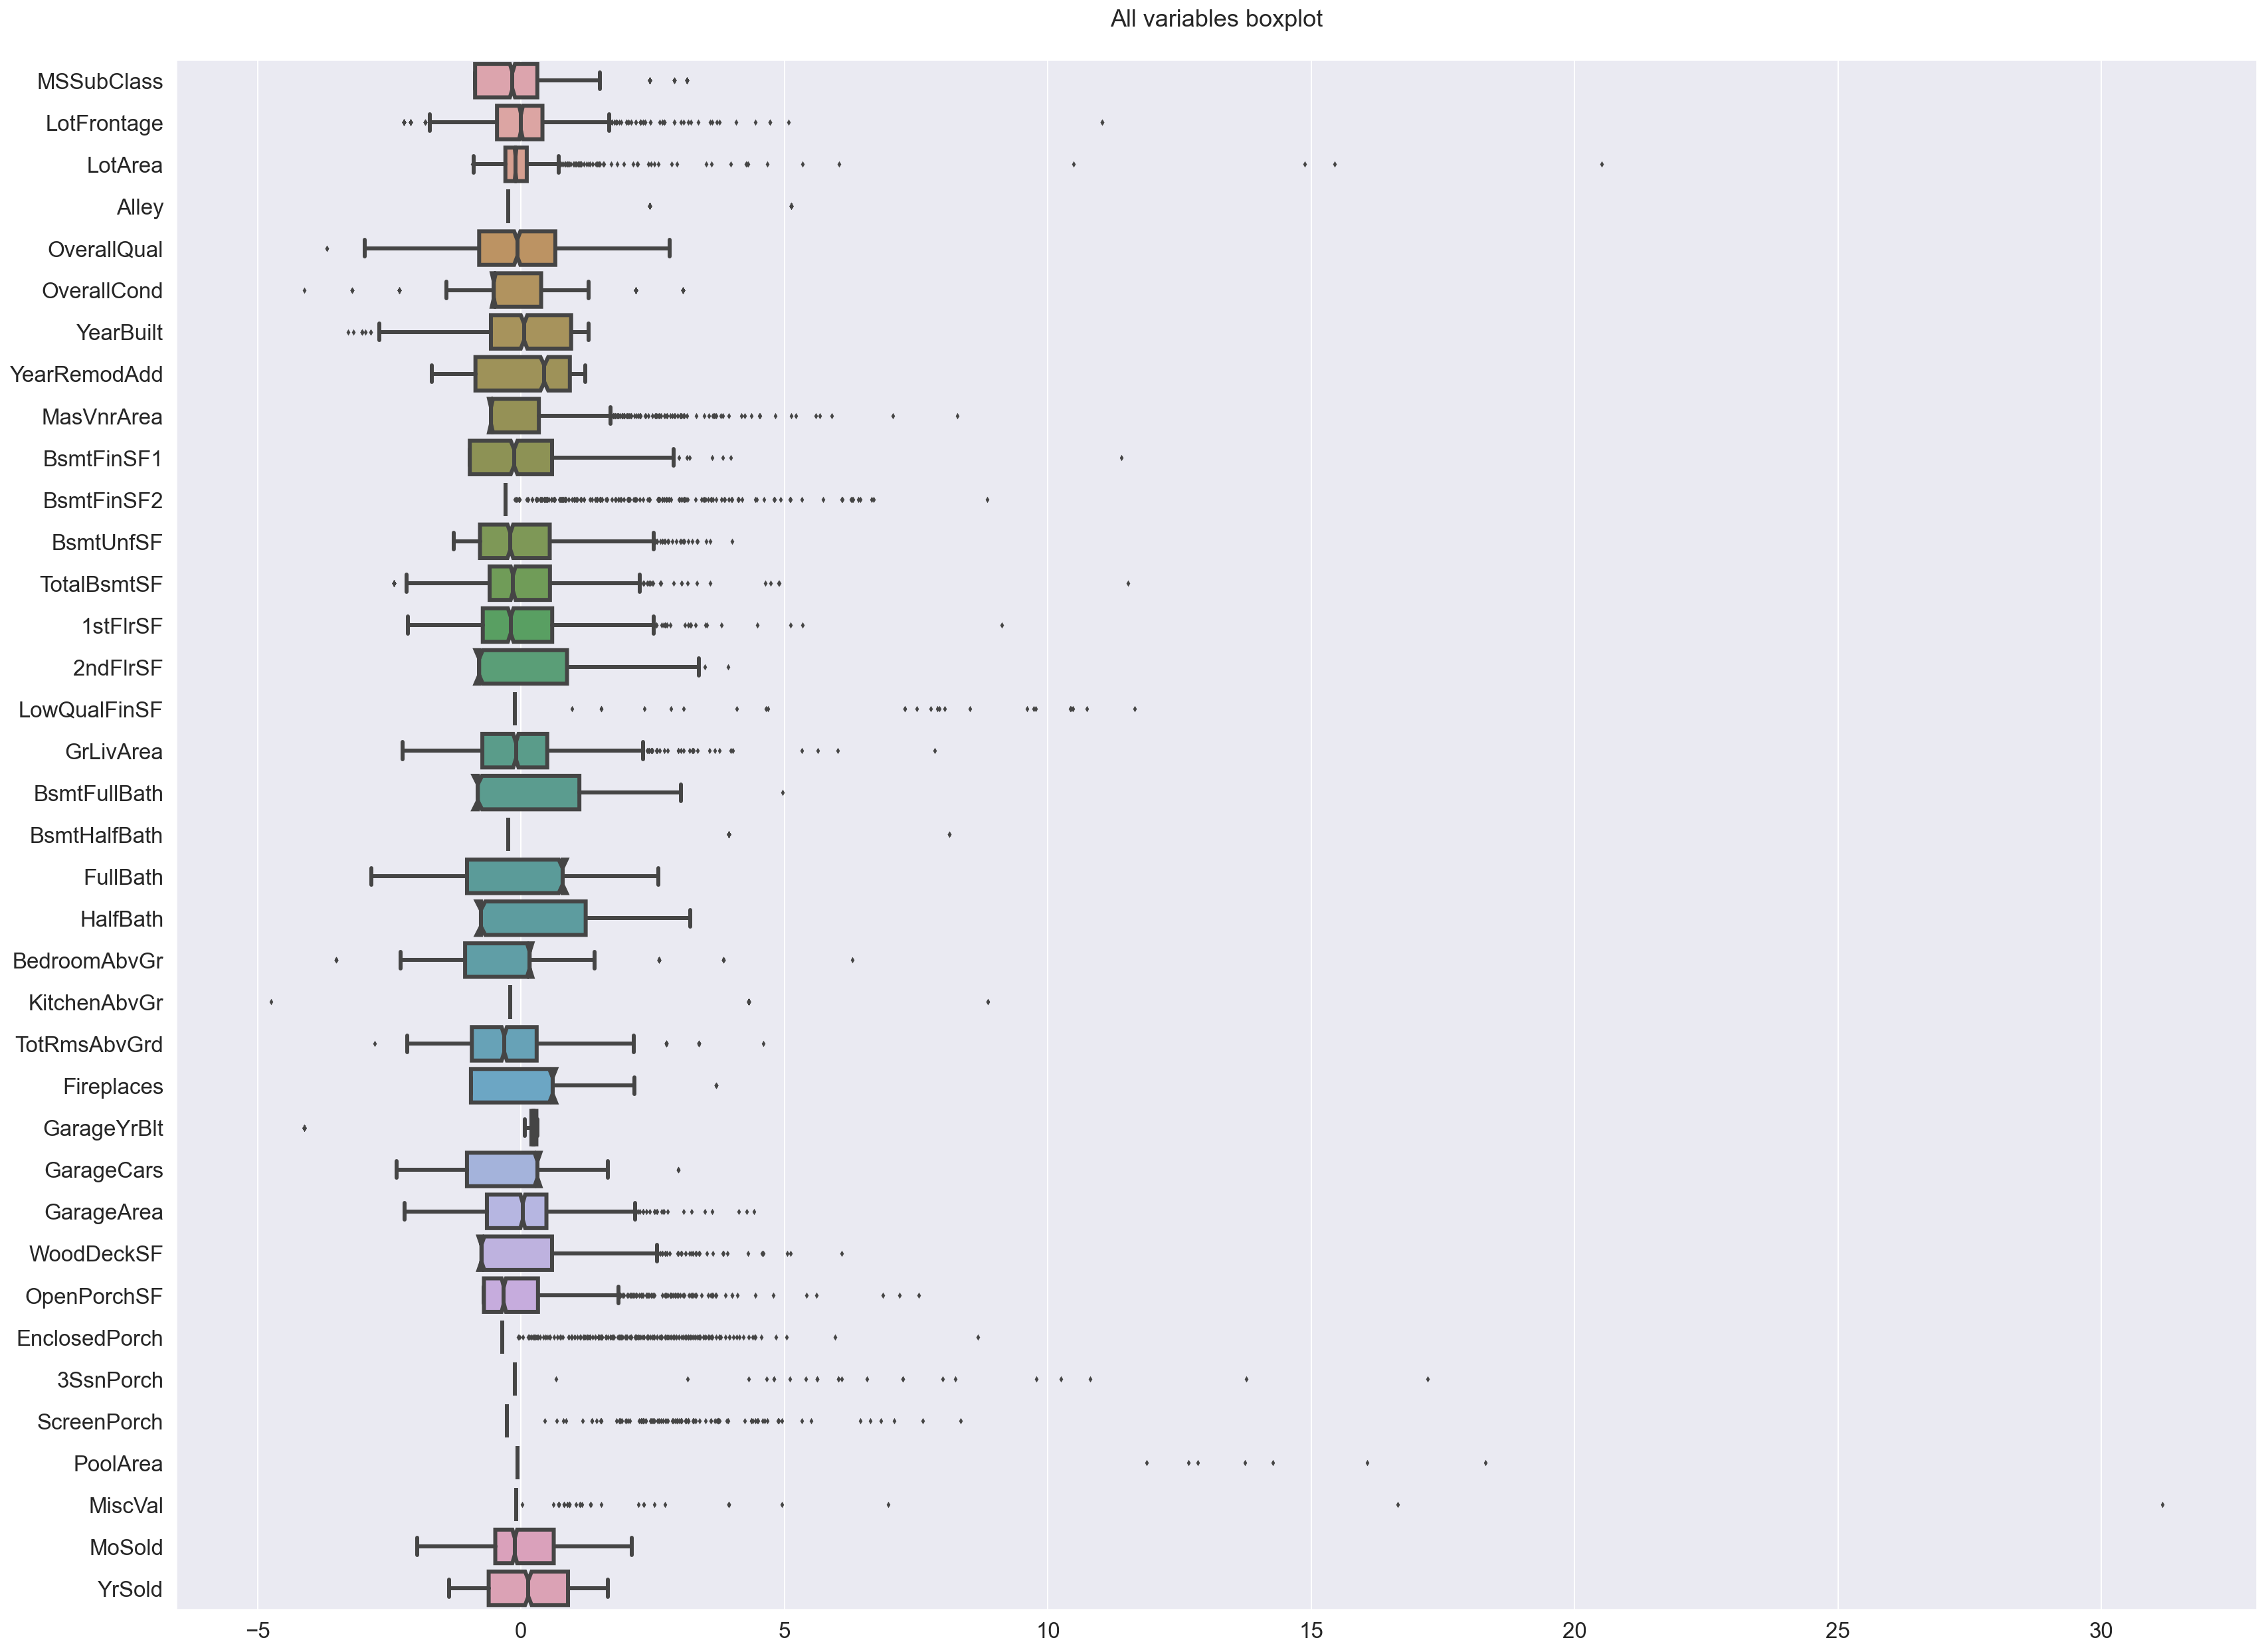

In [357]:
def var_standardized(var):
    var_stand = (var-var.mean())/var.std()
    return var_stand

train_stand = var_standardized(train55)
fig,ax = plt.subplots(figsize=(25,20))

sns.boxplot(data=train_stand, orient='h', fliersize=2, linewidth=3, notch=True,
                 saturation=0.5, ax=ax )

ax.set_title('All variables boxplot\n')
plt.show()

- for test data:


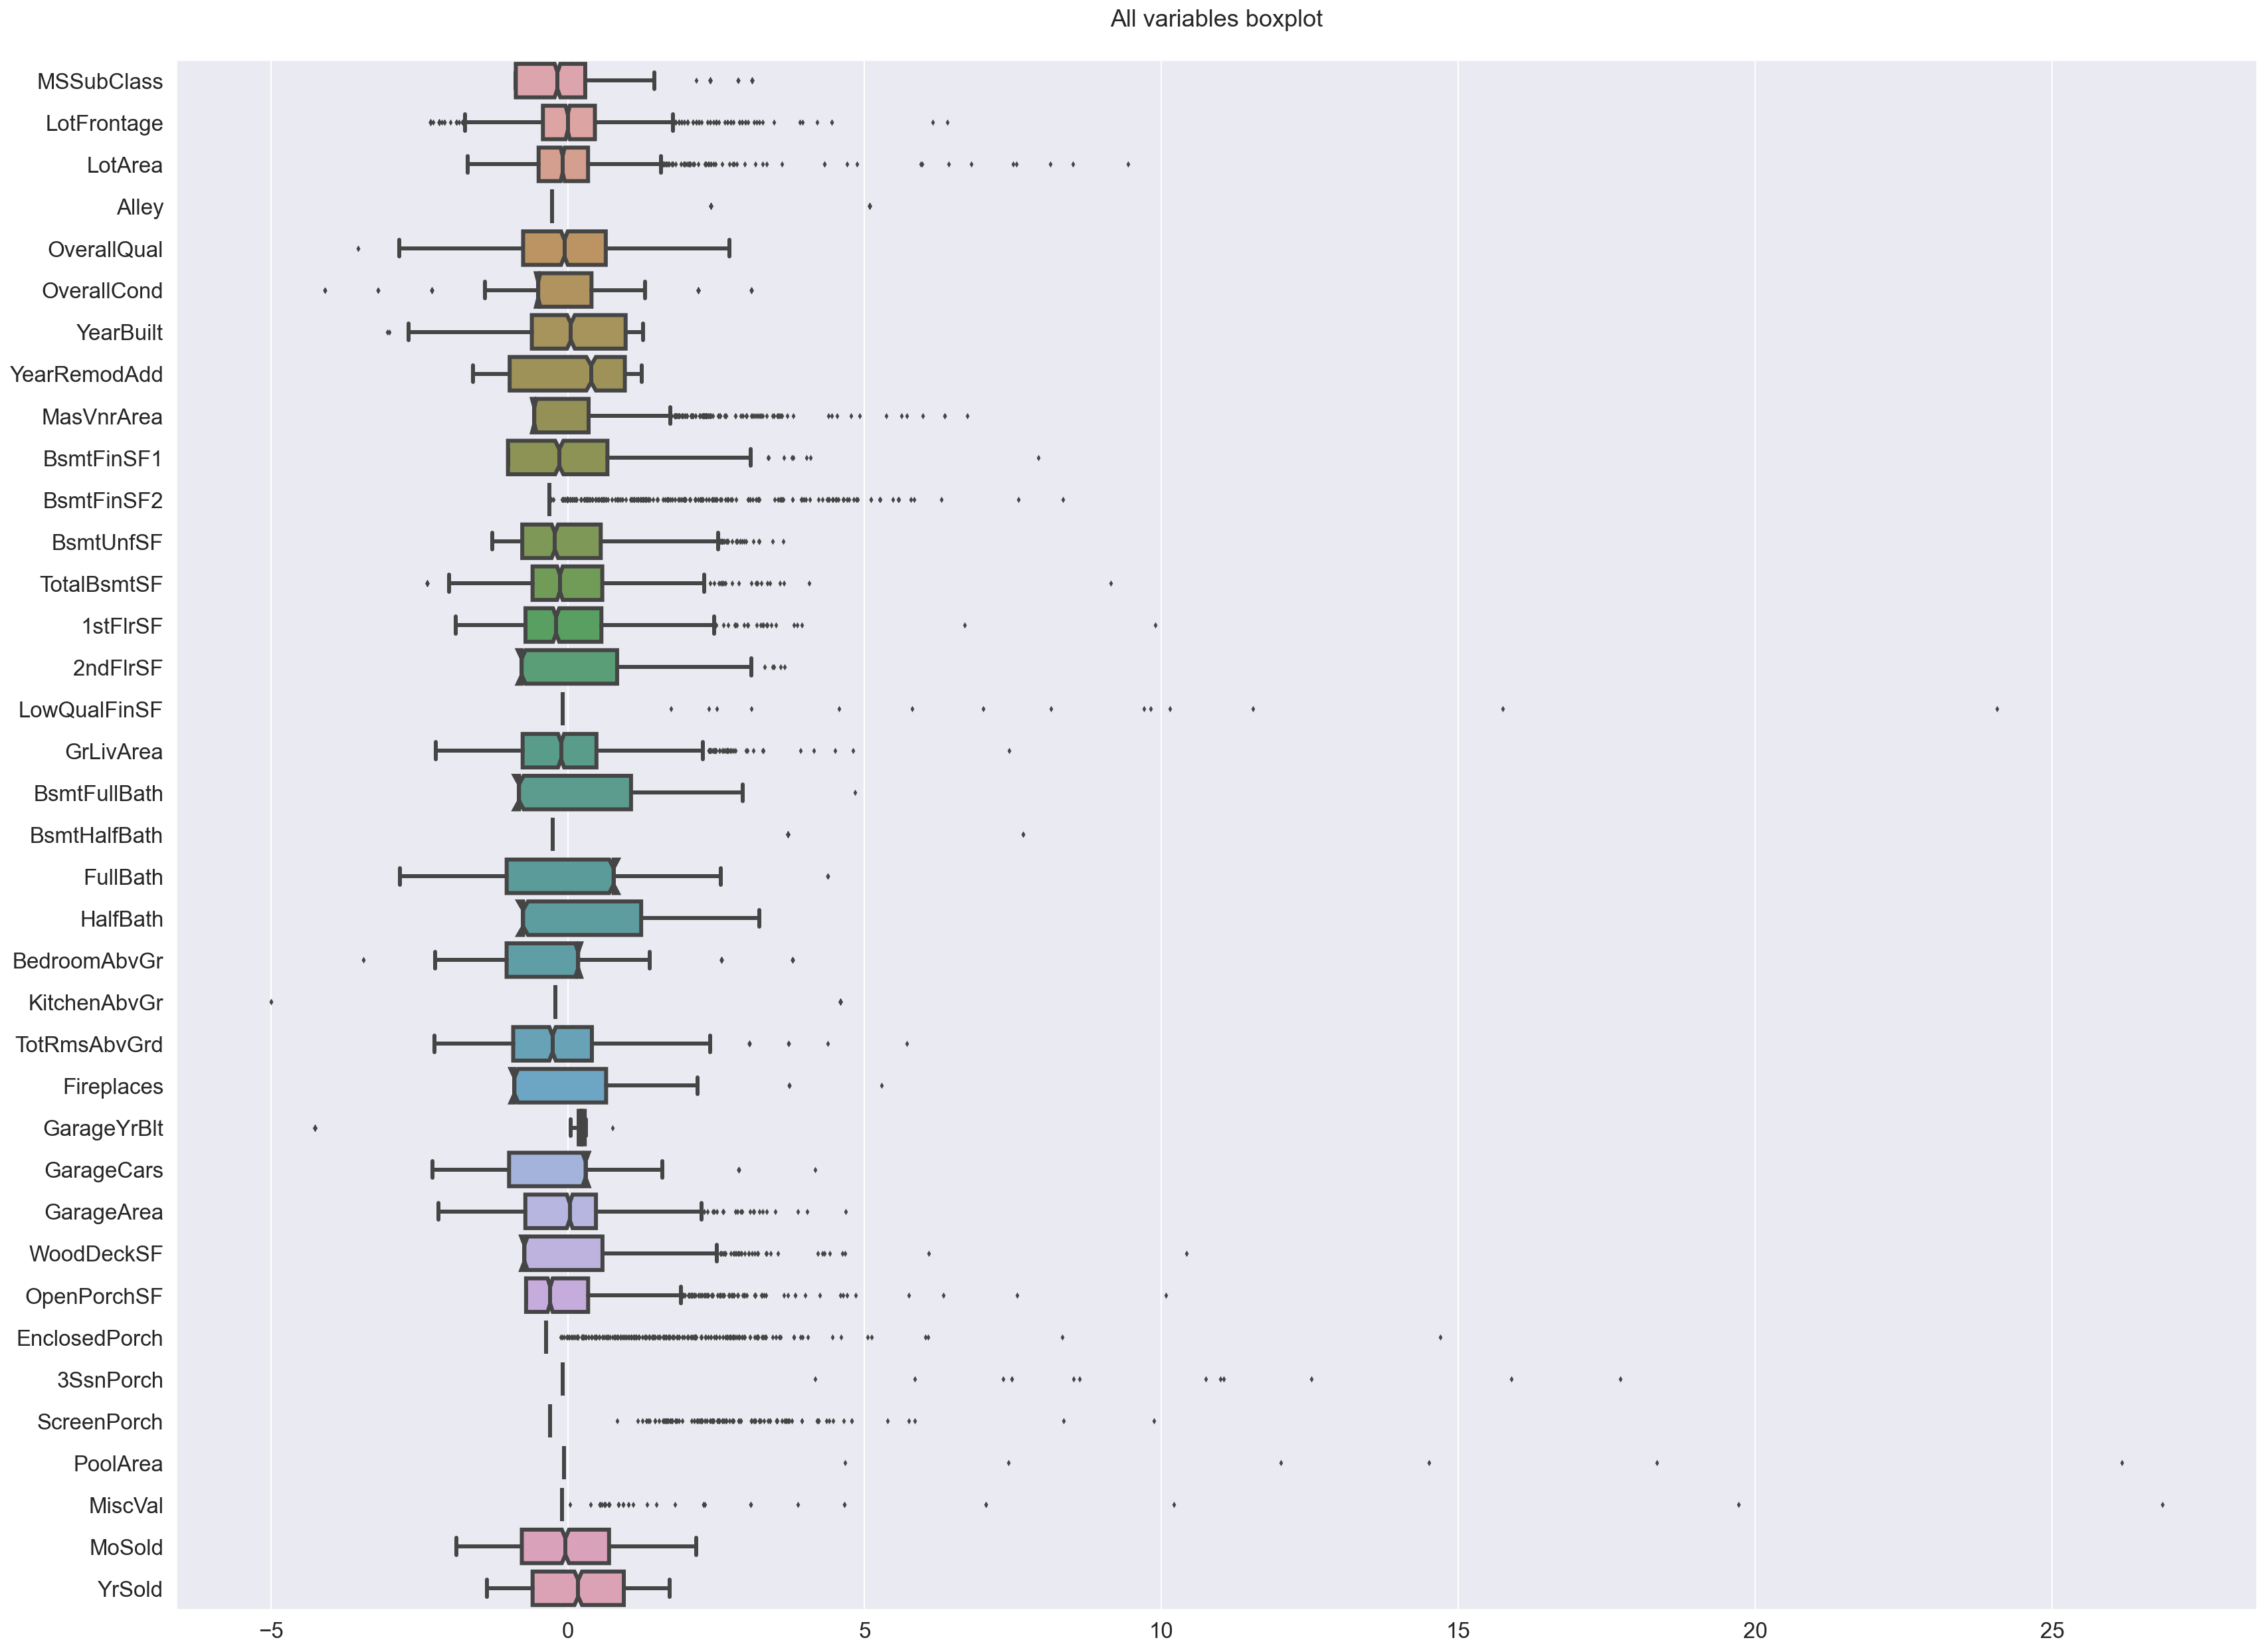

In [359]:
def var_standardized(var):
    var_stand = (var-var.mean())/var.std()
    return var_stand

test_stand = var_standardized(test55)
fig,ax = plt.subplots(figsize=(25,20))

sns.boxplot(data=test_stand, orient='h', fliersize=2, linewidth=3, notch=True,
                 saturation=0.5, ax=ax)

ax.set_title('All variables boxplot\n')
plt.show()

- After detecting outliers in the dataset, we tried to remove the outlier but, the RMSE score getting higher.

#### A: Univariate Analysis

- **Continuous variables**

- We use histograms and boxplots for continuous features

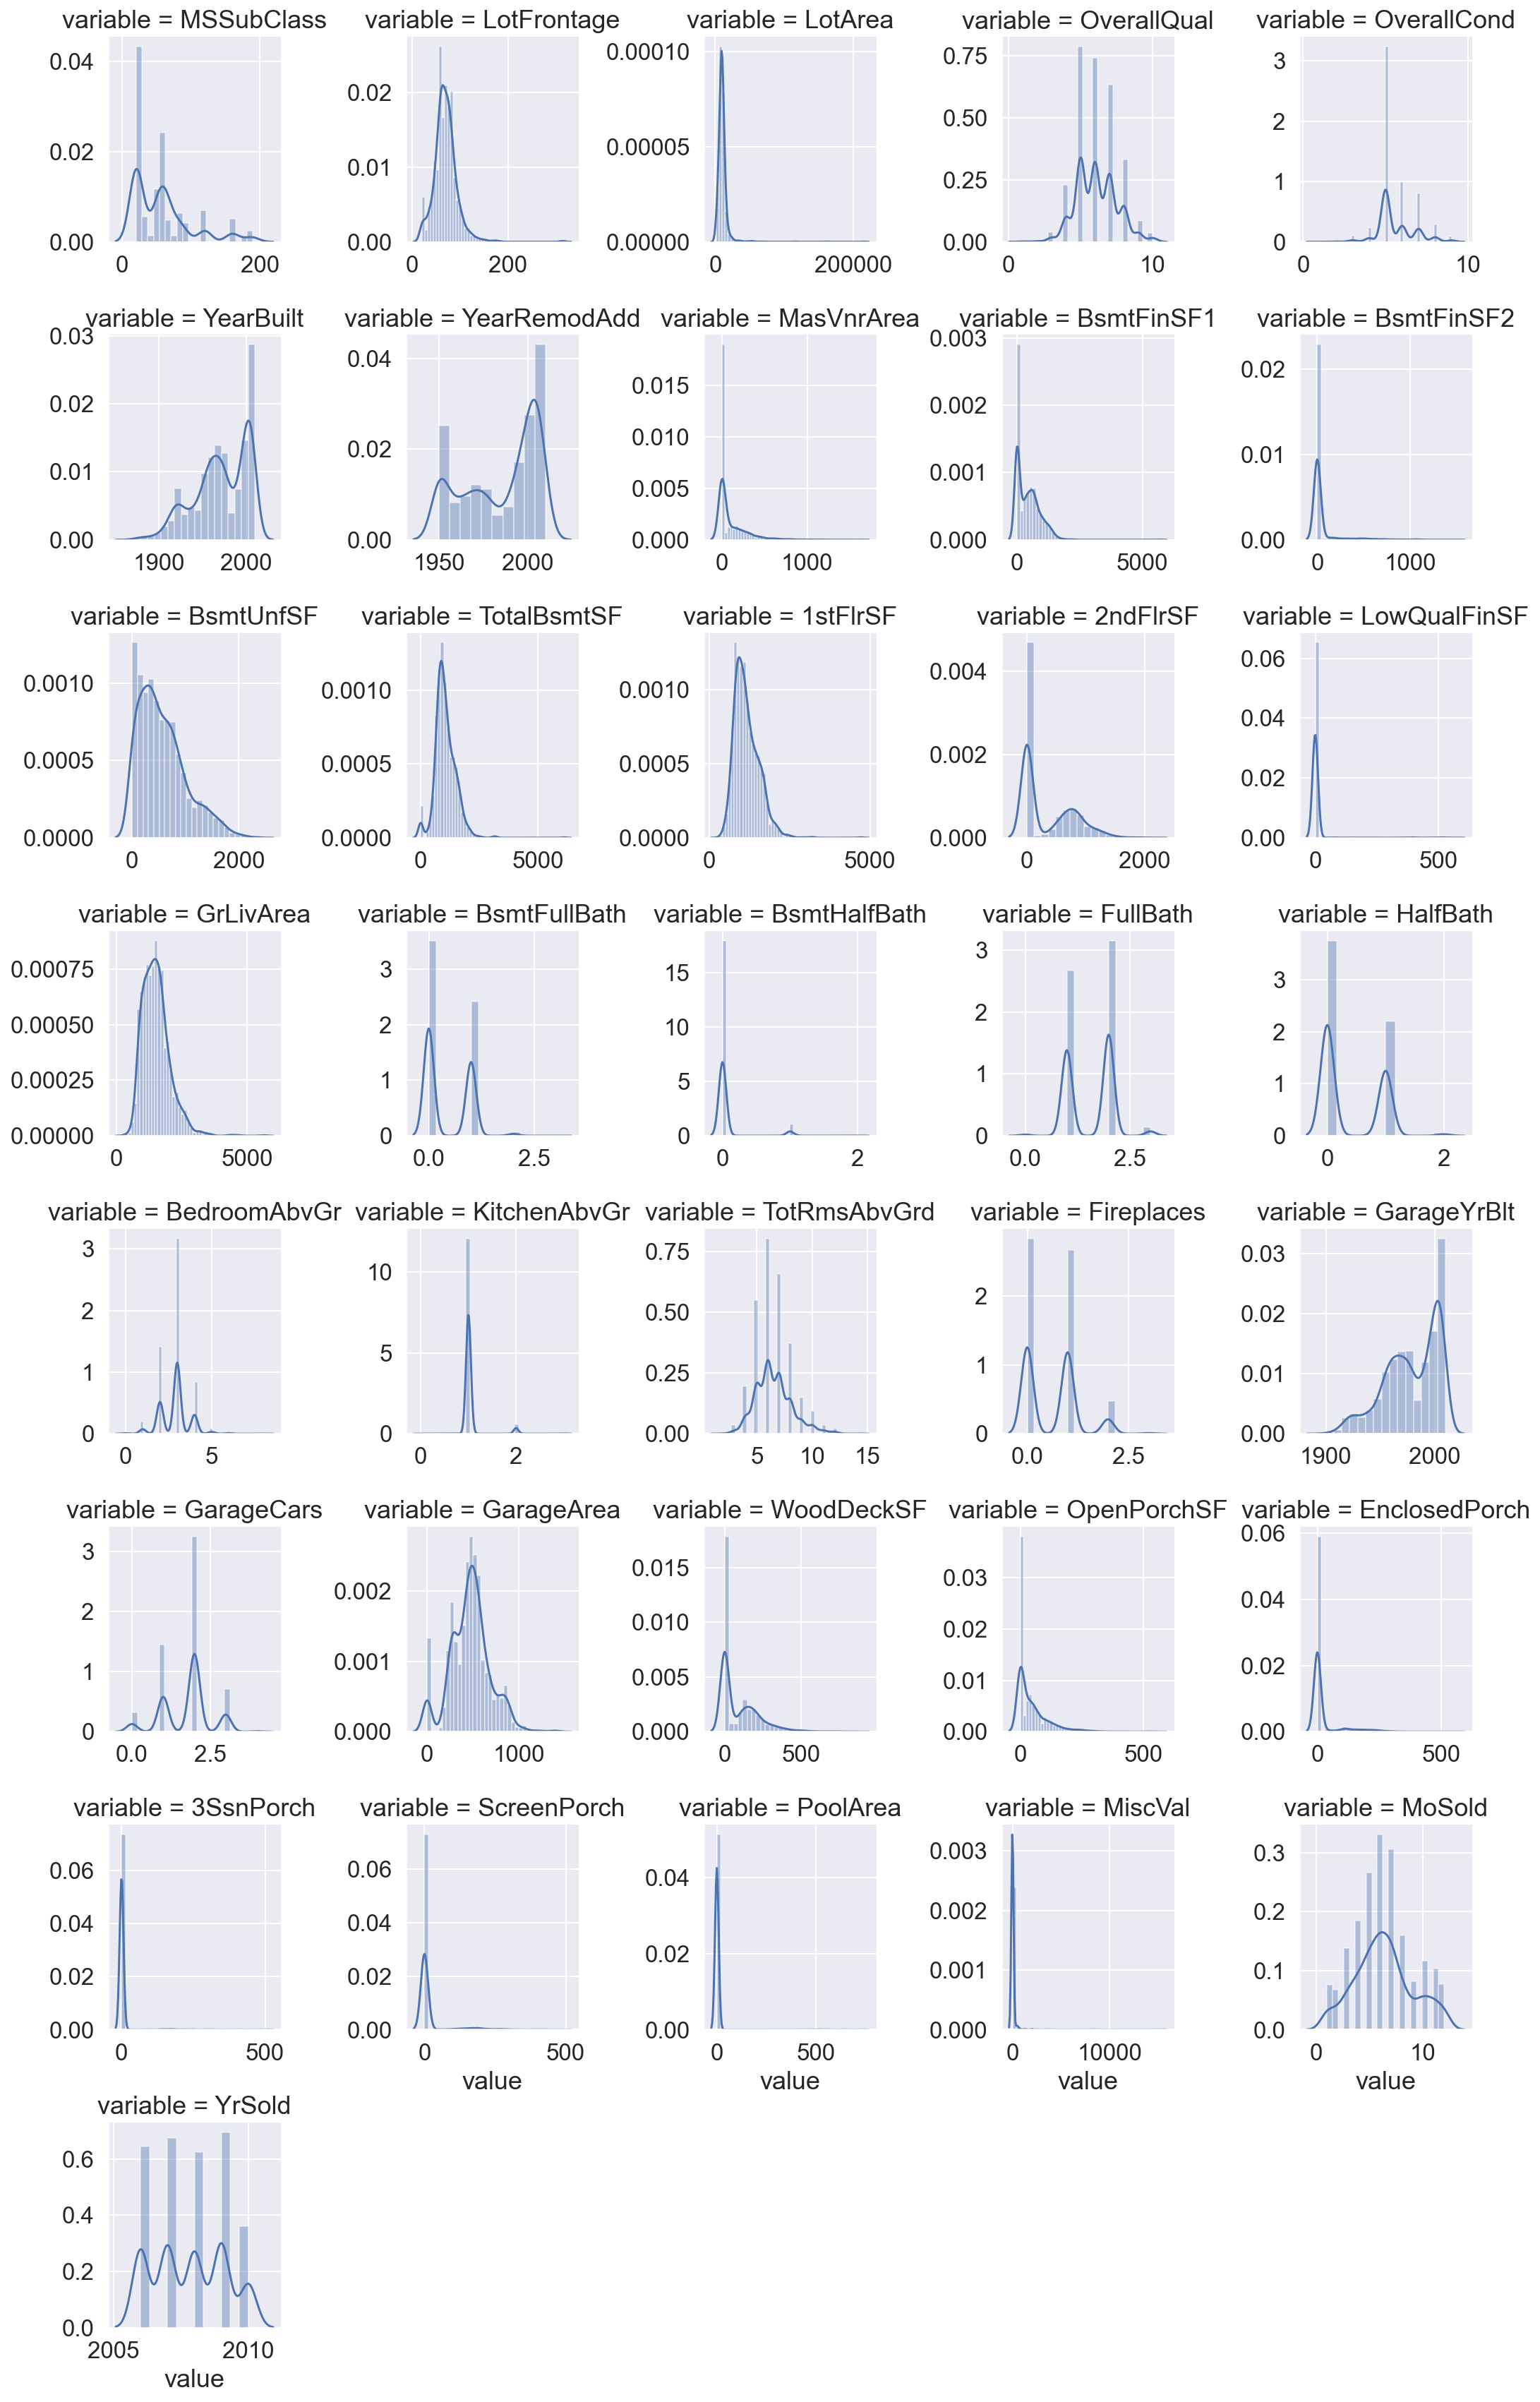

In [18]:
vn = pd.melt(train, value_vars=num_var)
fig = sns.FacetGrid(vn, col="variable",  col_wrap=5, sharex=False, sharey=False) # we using FacetGrid 
fig = fig.map(sns.distplot, "value")
plt.show()


- The above plot shows us distrbution of each feature

#### B: Bi-Variate Analysis

**Continuous and Continuous**
- We built scatter plots to see how two continuous variables interact with each other.

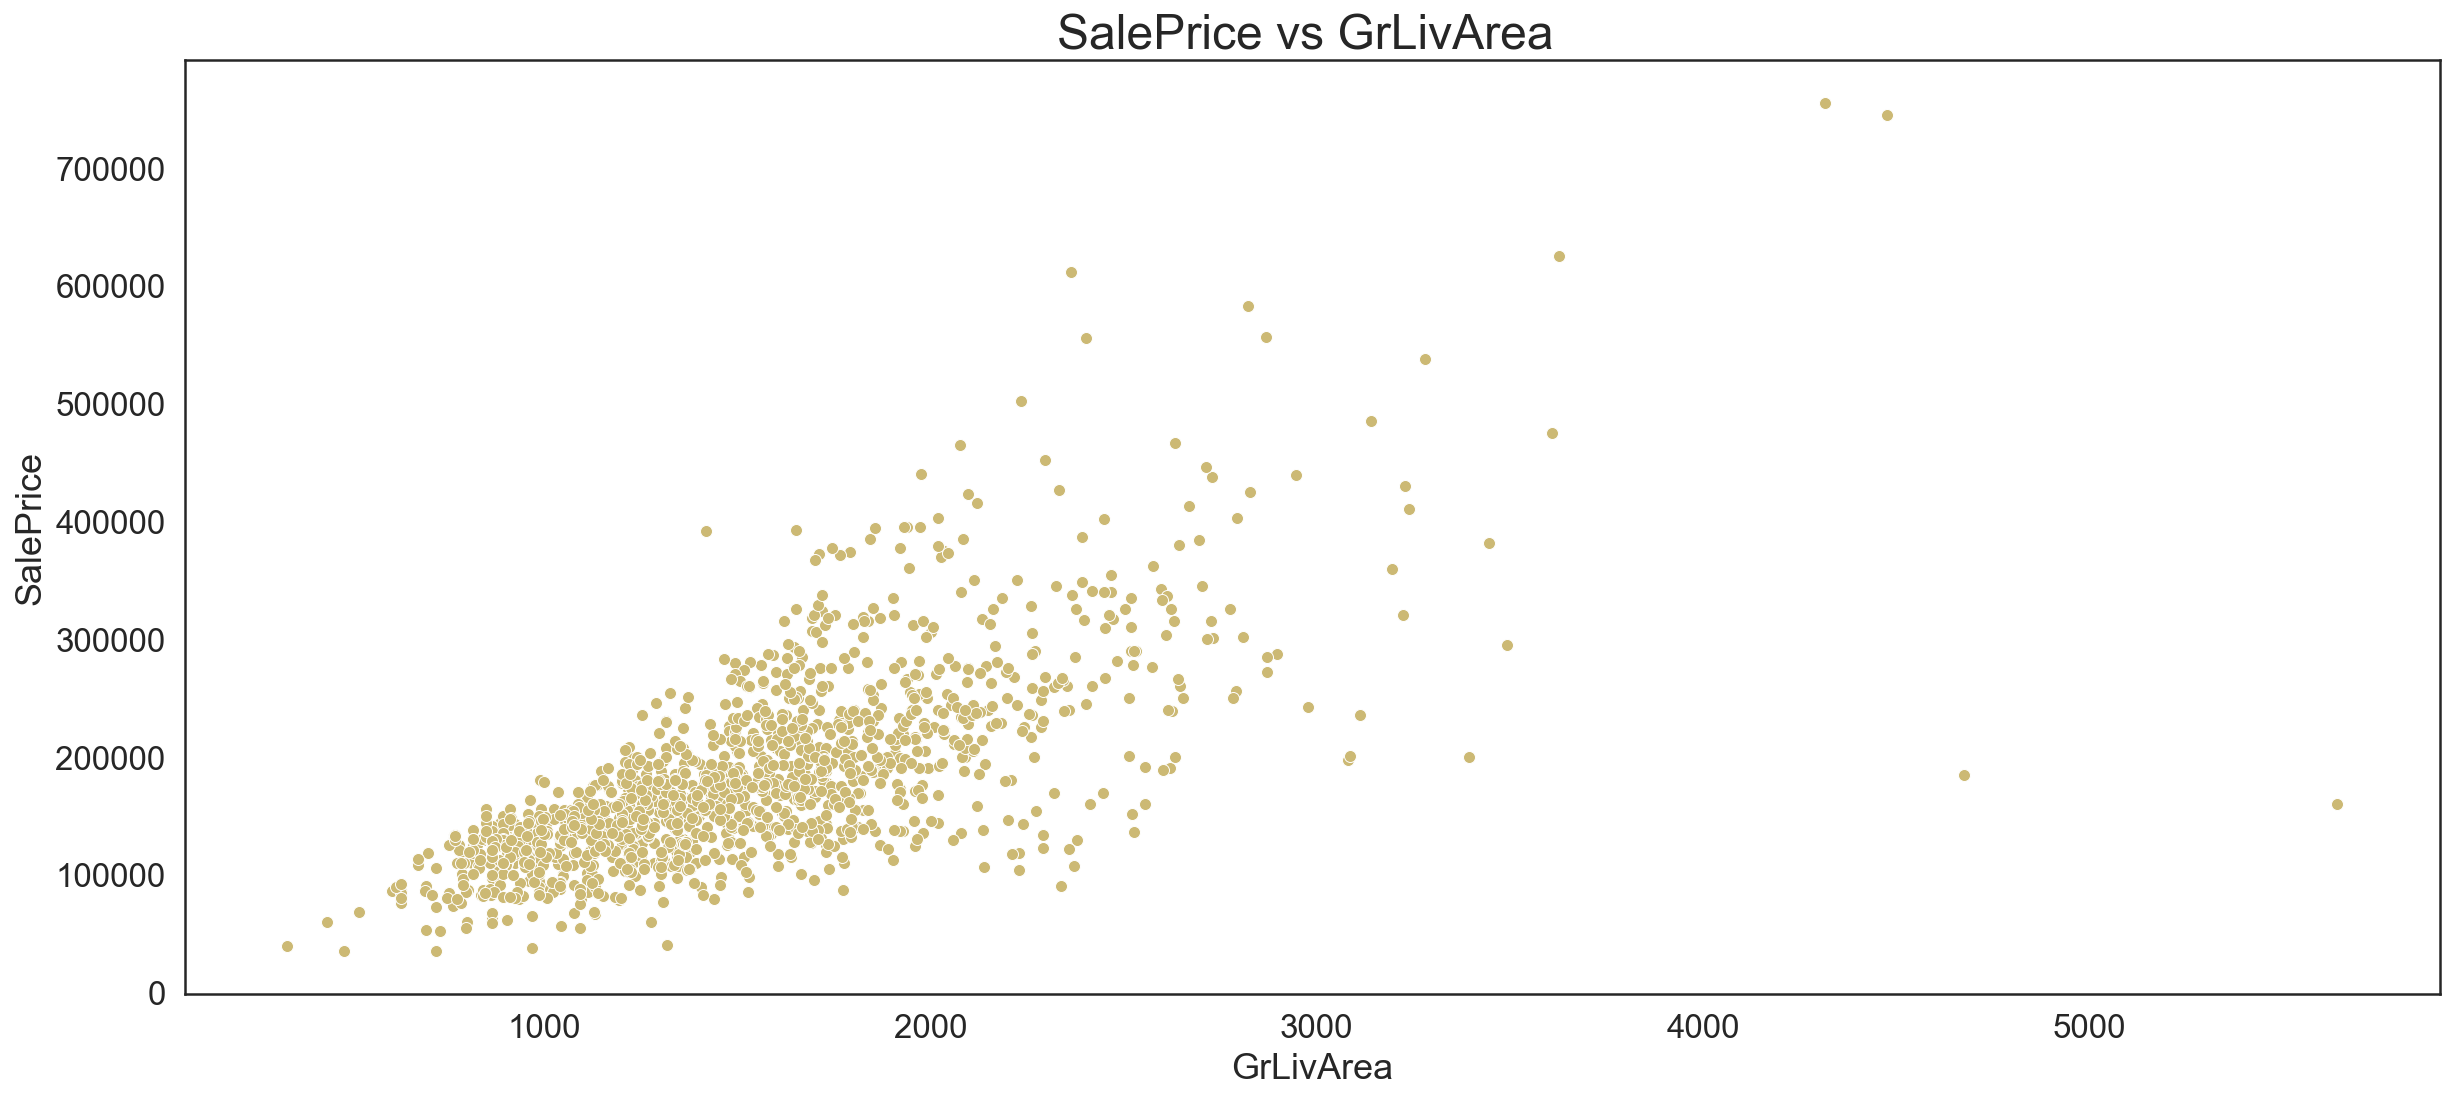

In [576]:
plt.figure(figsize=(18,8));
sns.scatterplot(data=train, x='GrLivArea', y='SalePrice' , color='y')
plt.title('SalePrice vs GrLivArea ', fontsize=24)
plt.show()

- The scatter plot shows a strongly positive relation between Sale Price and Groud Living Area, the bigger the area the higher the price 

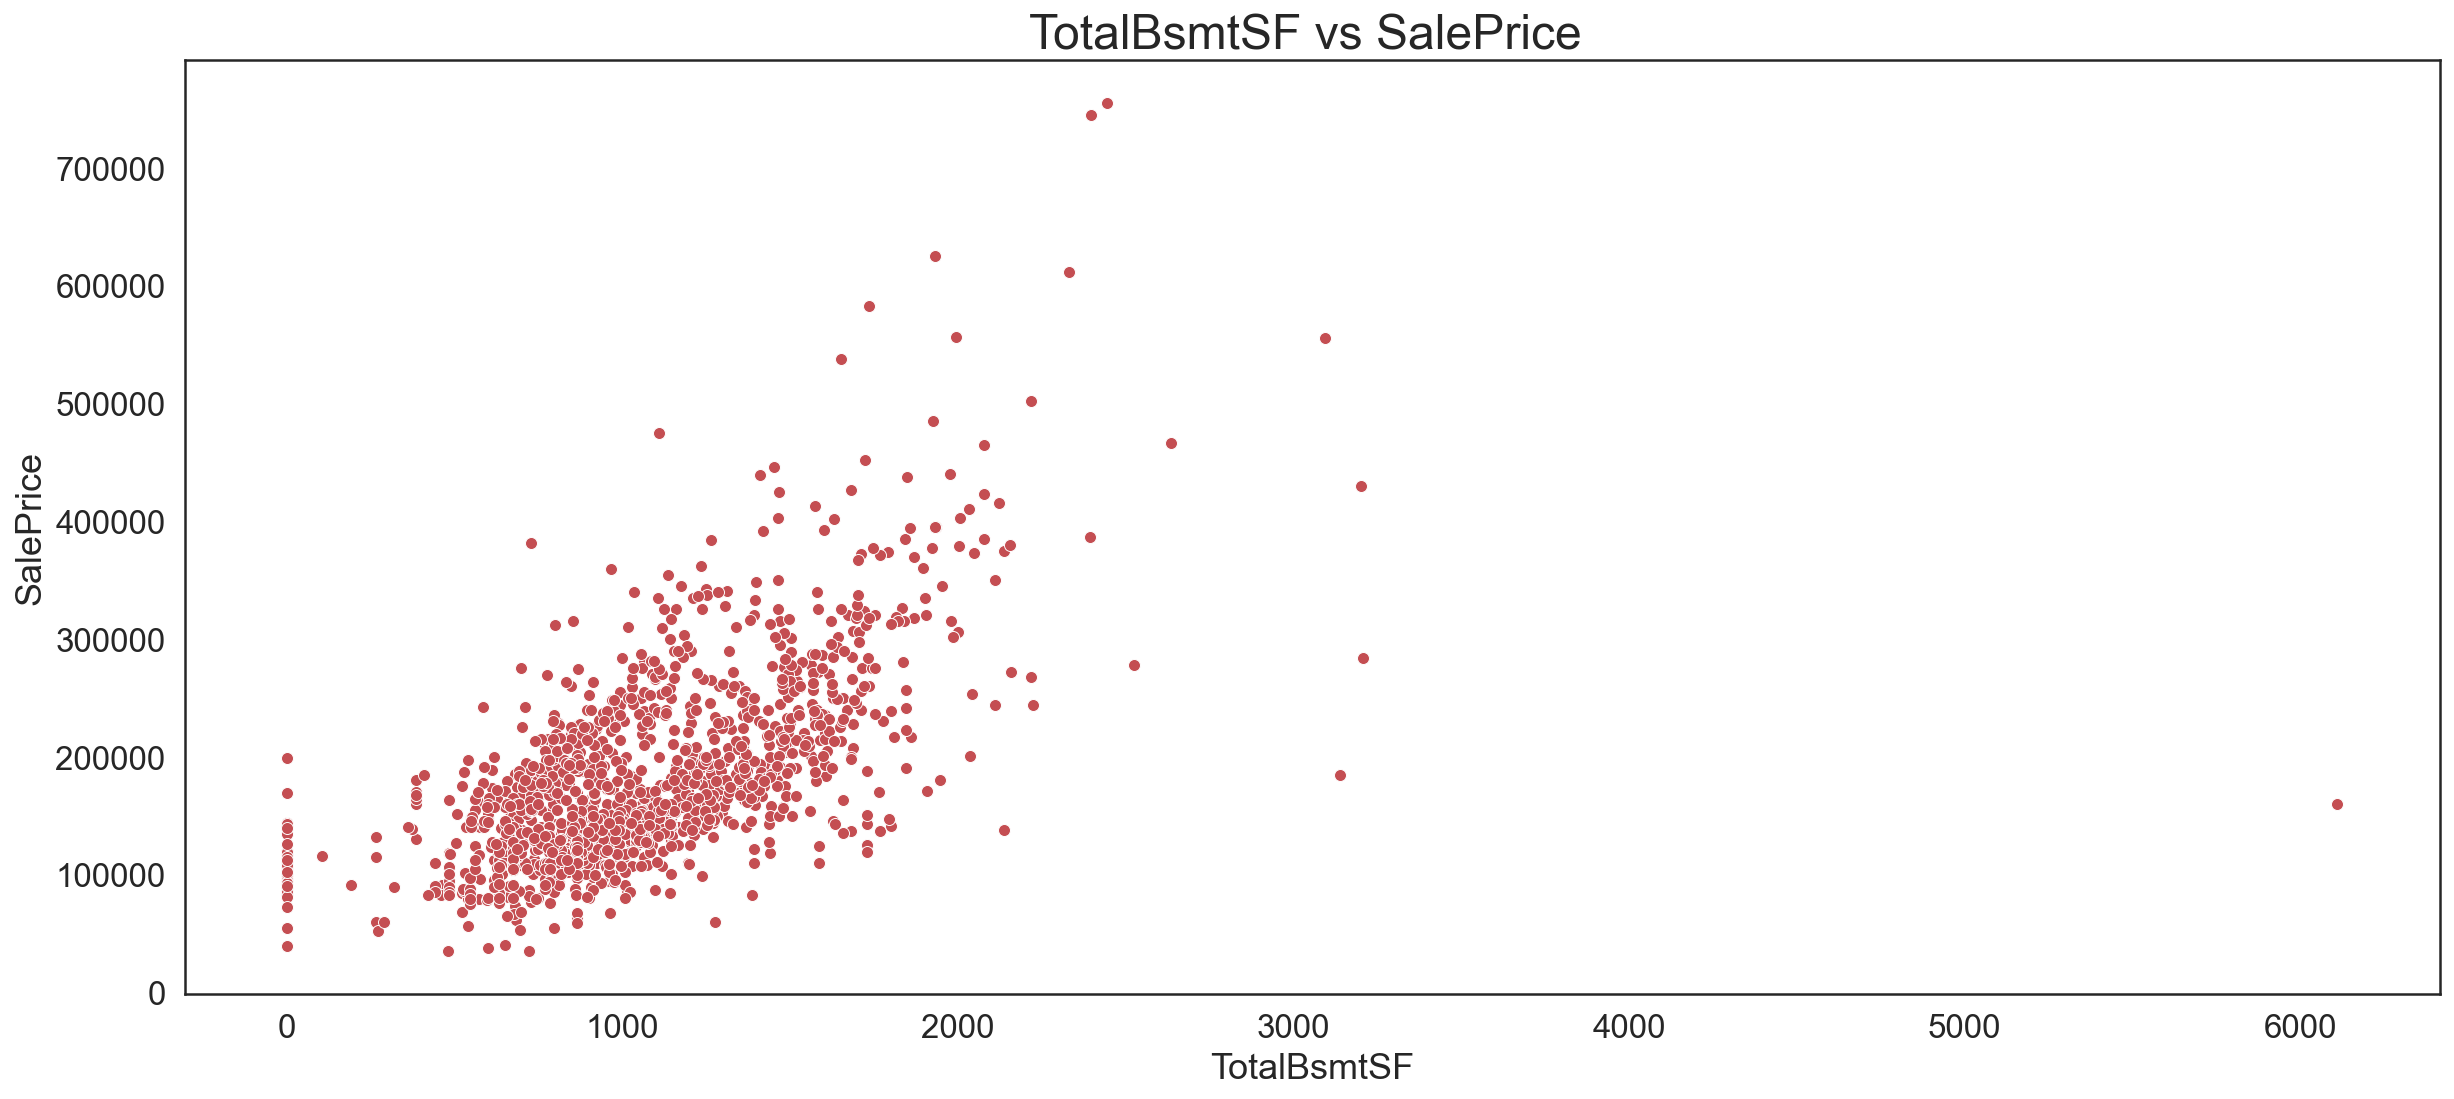

In [578]:
plt.figure(figsize=(18,8));
# OverallQual , GarageArea ,GrLivArea , TotalBsmtSF , YearBuilt , Fireplaces , FullBath ,MasVnrArea , YearRemodAdd , OpenPorchSF , BsmtFinSF1 , WoodDeckSF , LotFrontage
sns.scatterplot(data=train, y='SalePrice', x='TotalBsmtSF', color='r')
plt.title('TotalBsmtSF vs SalePrice ', fontsize=24)     
plt.show()

- The scatter plot shows moderate positive relation between Sale Price and total basement, the bigger the total area of basement the higher the price 

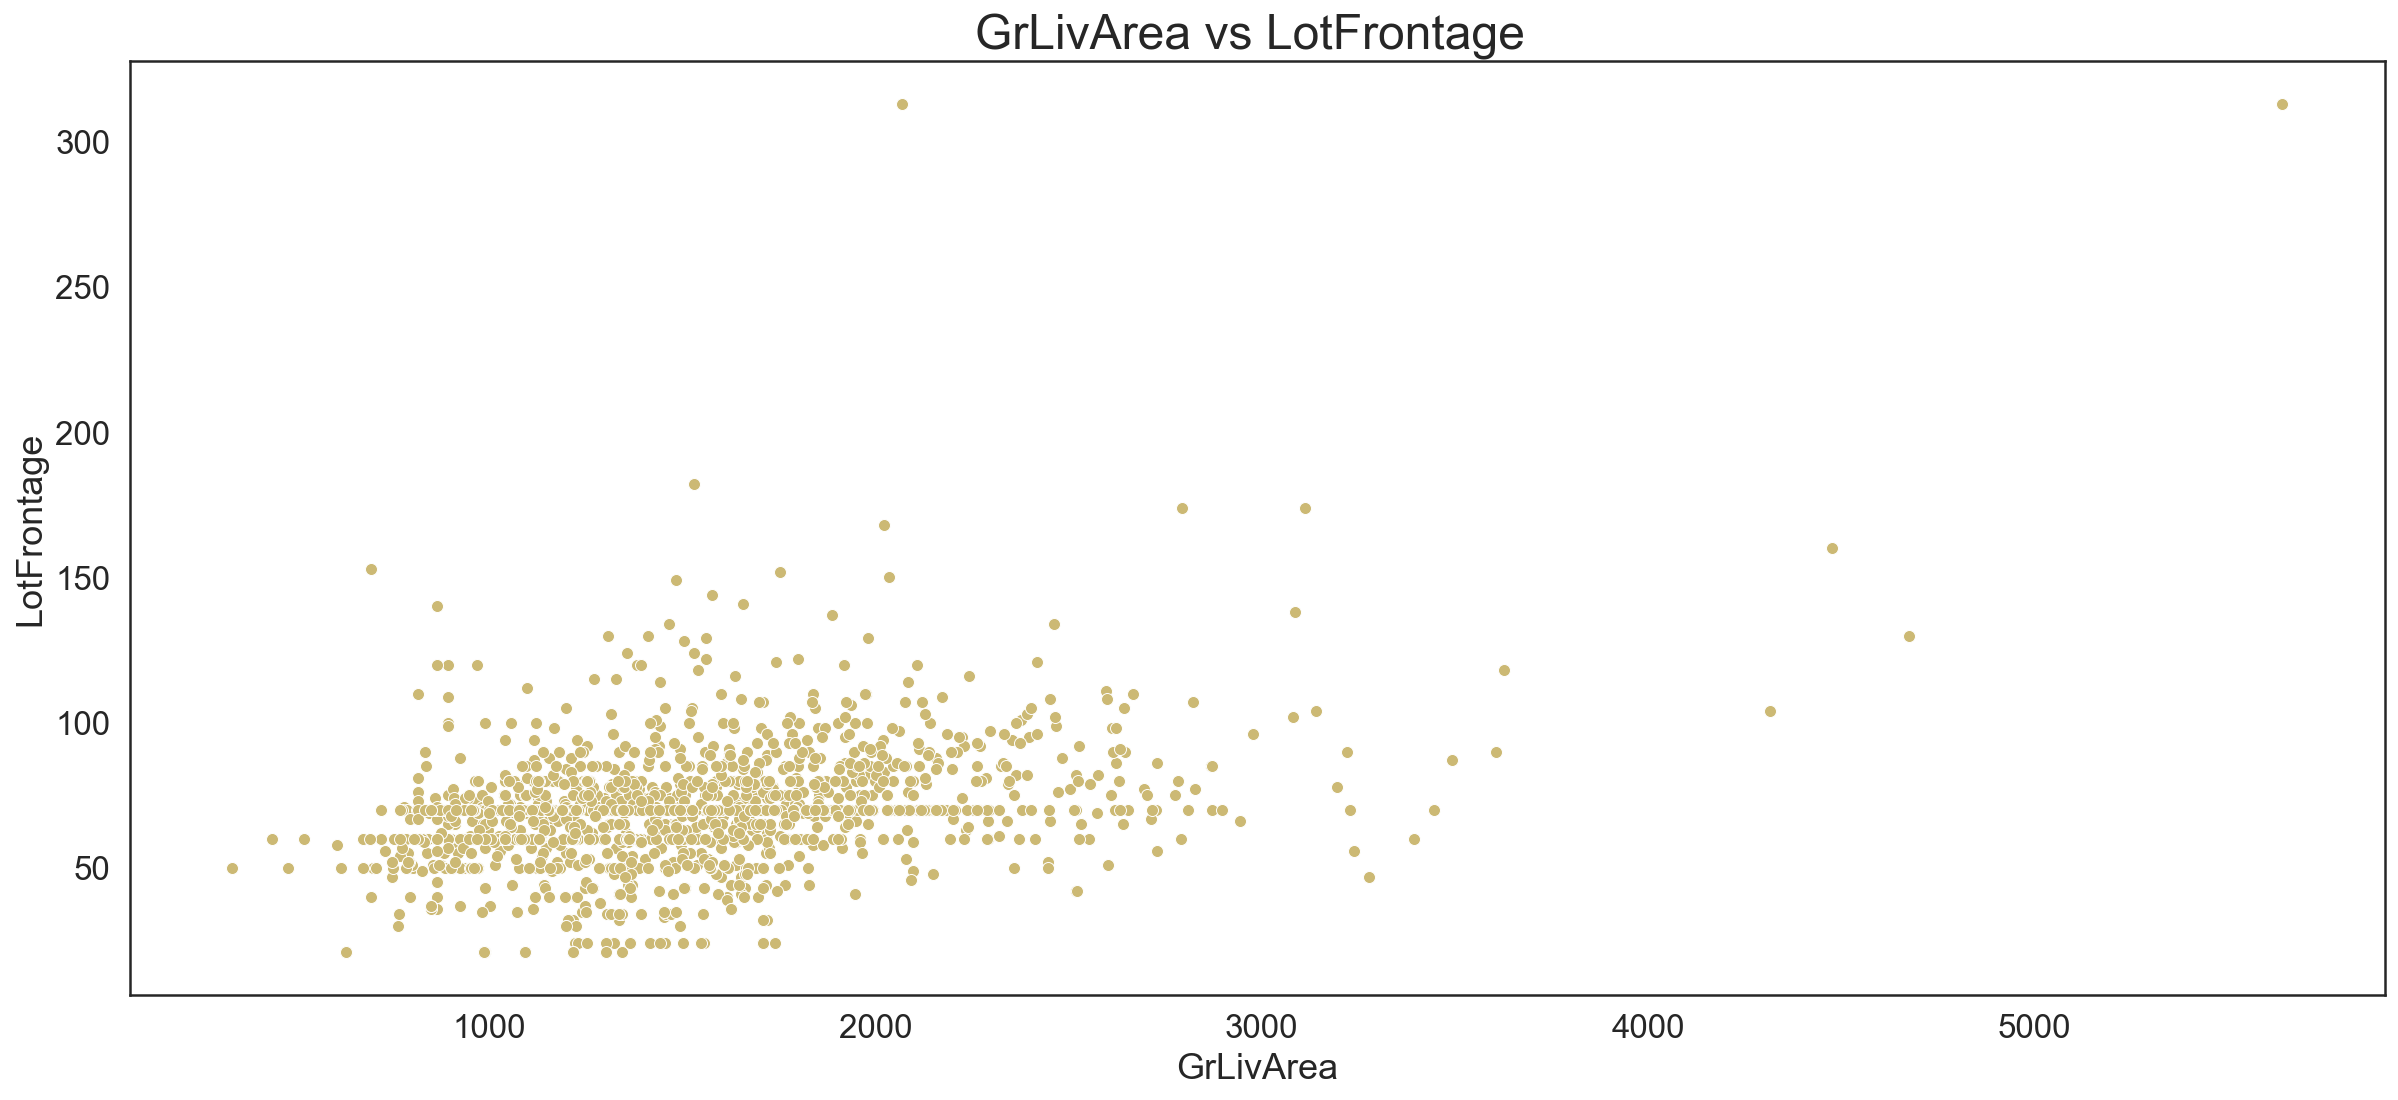

In [580]:
plt.figure(figsize=(18,8));
sns.scatterplot(data=train, x='GrLivArea', y='LotFrontage' , color='y')
plt.title('GrLivArea vs LotFrontage ', fontsize=24)
plt.show()

- The scatter shows us there is a no relationship between GrLivArea and LotFrontage .

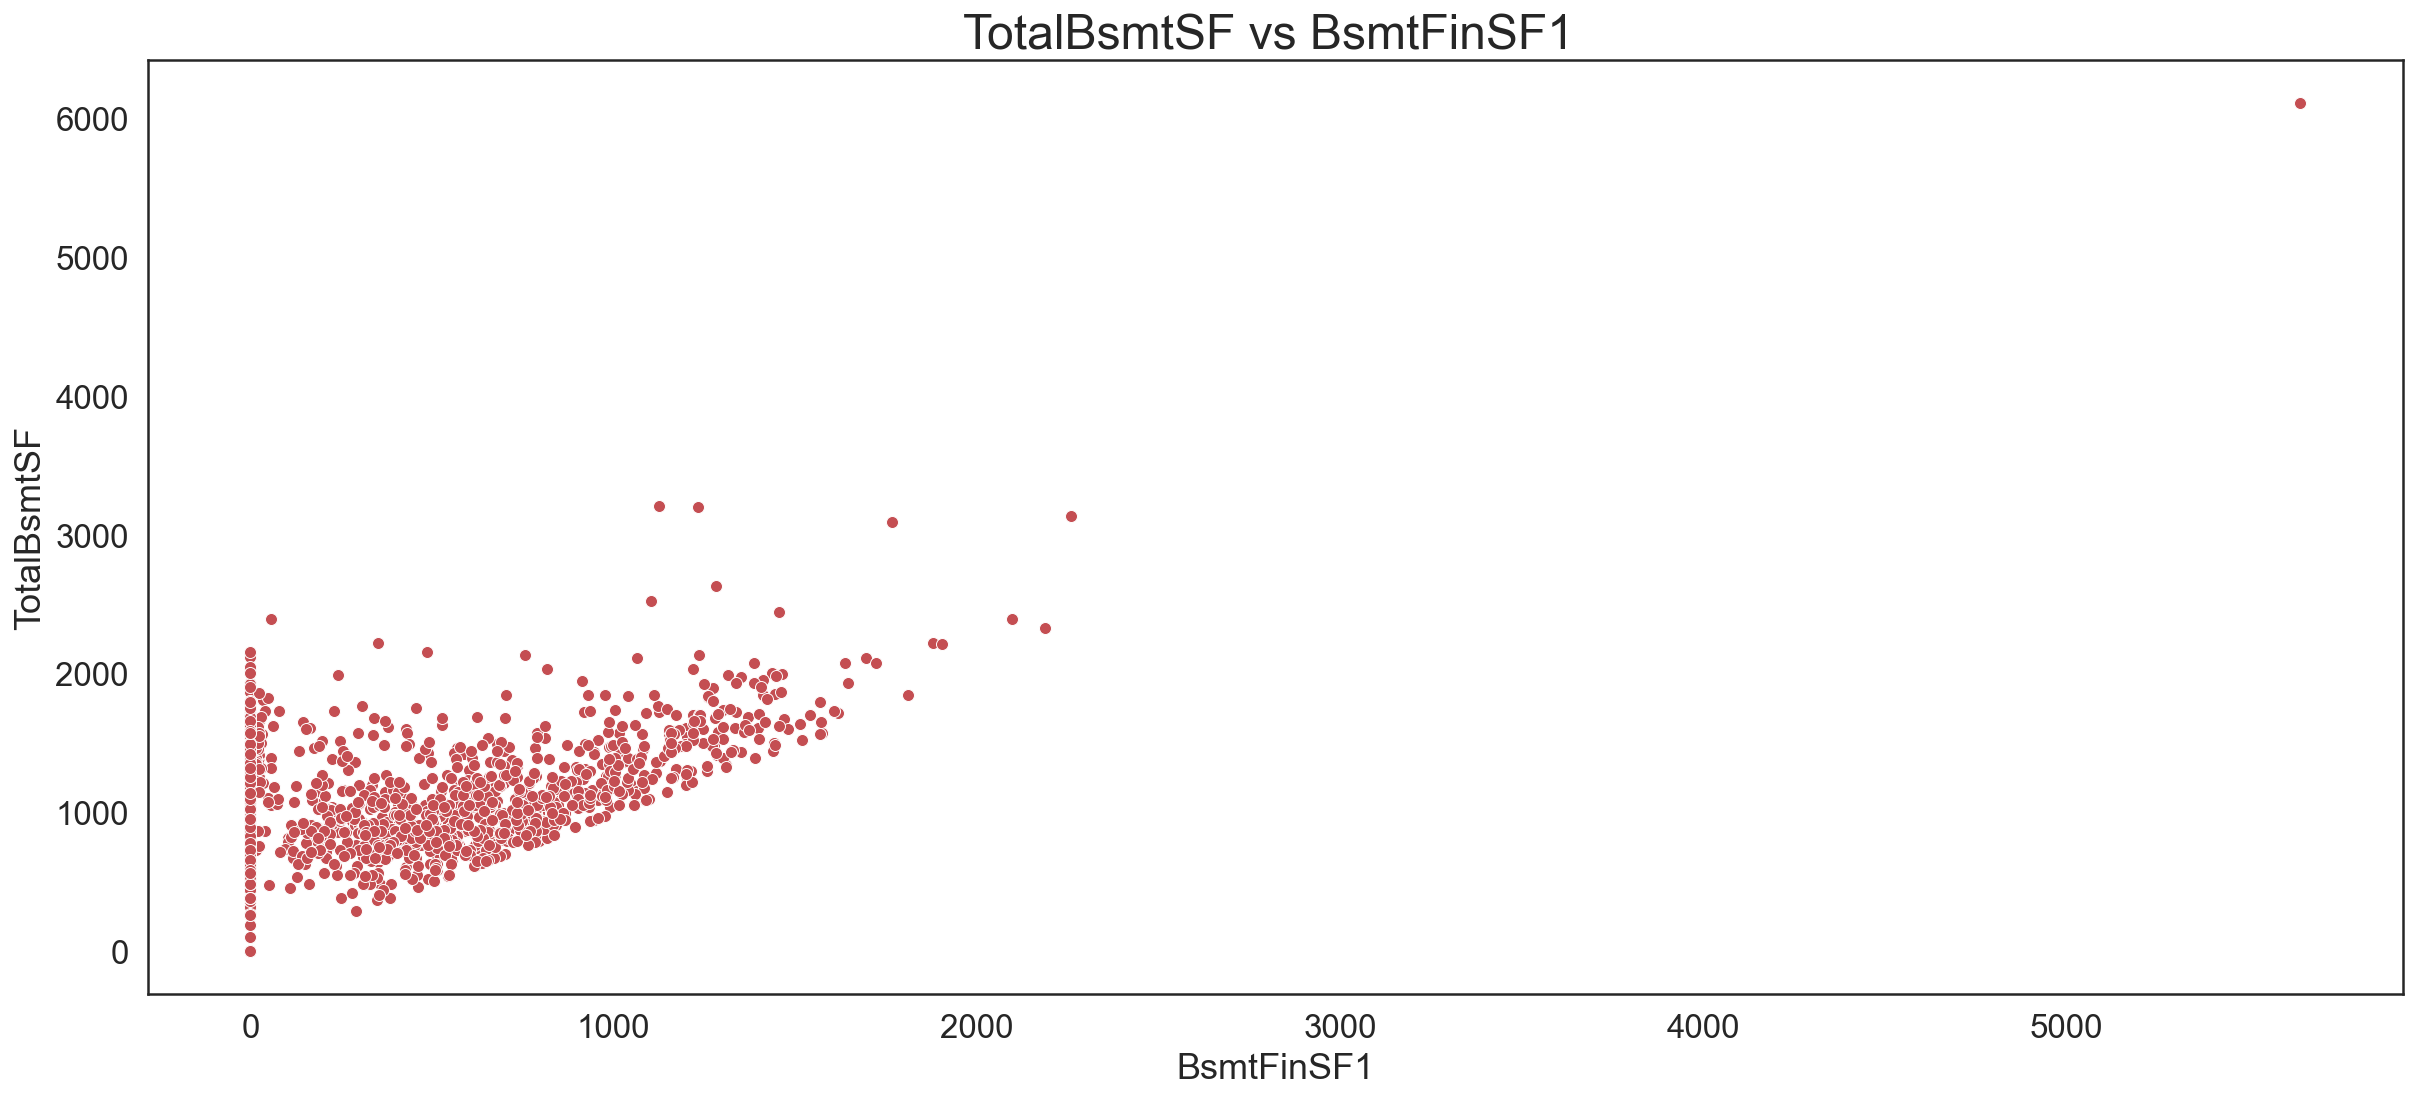

In [581]:
plt.figure(figsize=(18,8));
sns.scatterplot(data=train, y='TotalBsmtSF', x='BsmtFinSF1' ,  color='r')
plt.title('TotalBsmtSF vs BsmtFinSF1 ', fontsize=24)
plt.show()

- The scatter shows us there is a weak relationship between TotalBsmtSF and  BsmtFinSF1.

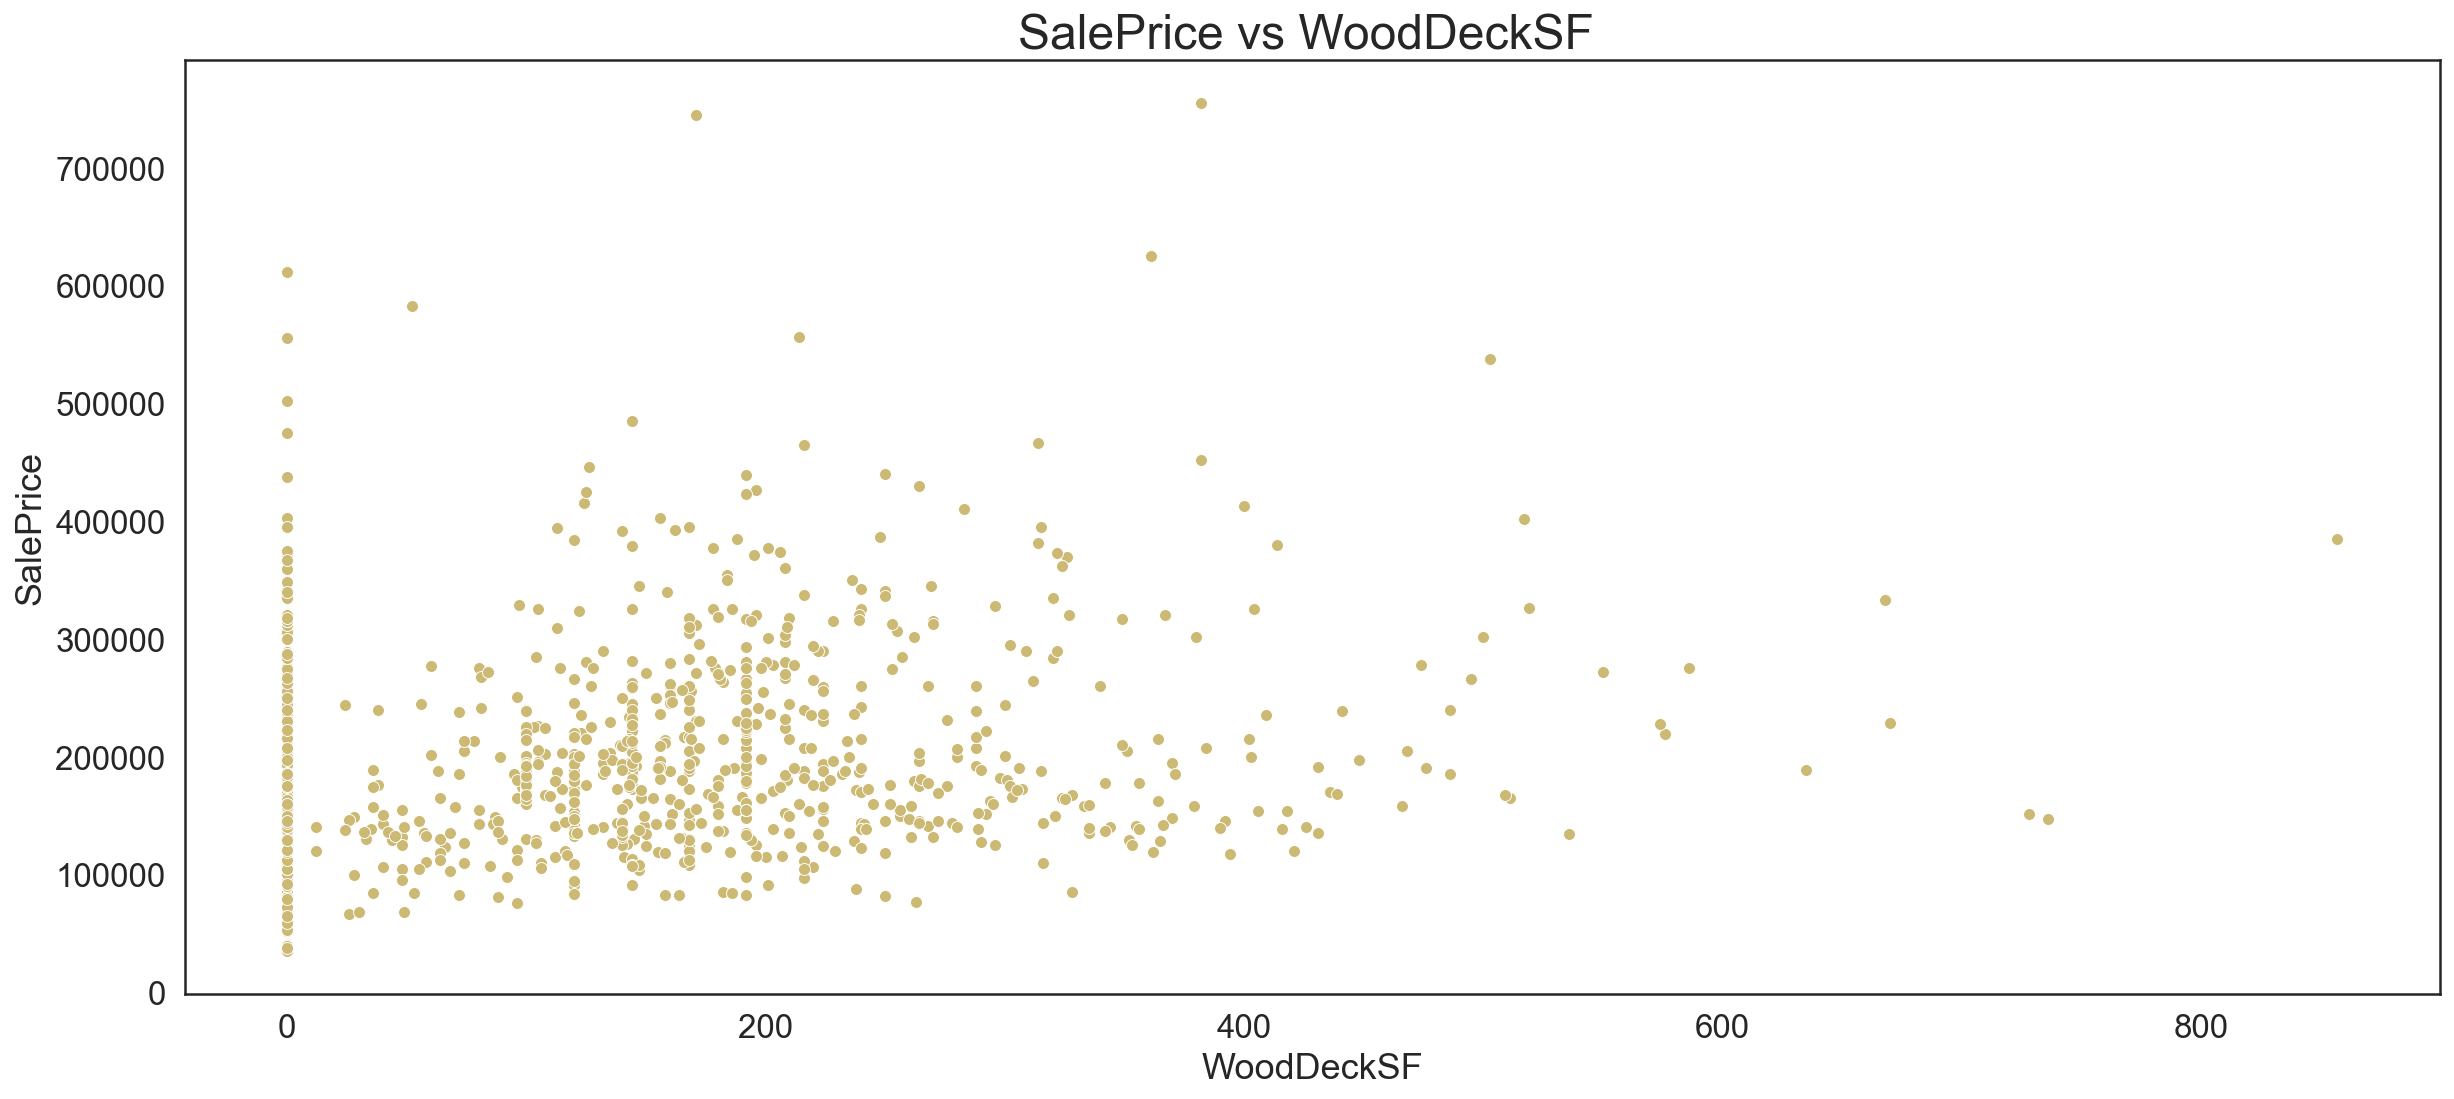

In [582]:
plt.figure(figsize=(18,8));
sns.scatterplot(data=train, y='SalePrice', x='WoodDeckSF' , color='y')
plt.title('SalePrice vs WoodDeckSF ', fontsize=24)
plt.show()

- The scatter shows us there is a no relationship between SalePrice and WoodDeckSFe .

###### Sammary 

- Based on the above visualization, we revealed some insights from it. House sale price affected by built year. location zone seems to be important as well in deciding house price. there is a high quality house, based on its foundation material, also affects pricing.  More research could be done on variables like house living area, bathroom numbers, and bedroom numbers related to  house prices to prepare a house price prediction model.

#### C: Categorical and Categorical

- A stacked column chart is a good visualization that shows how the frequencies are spread between two categorical features.

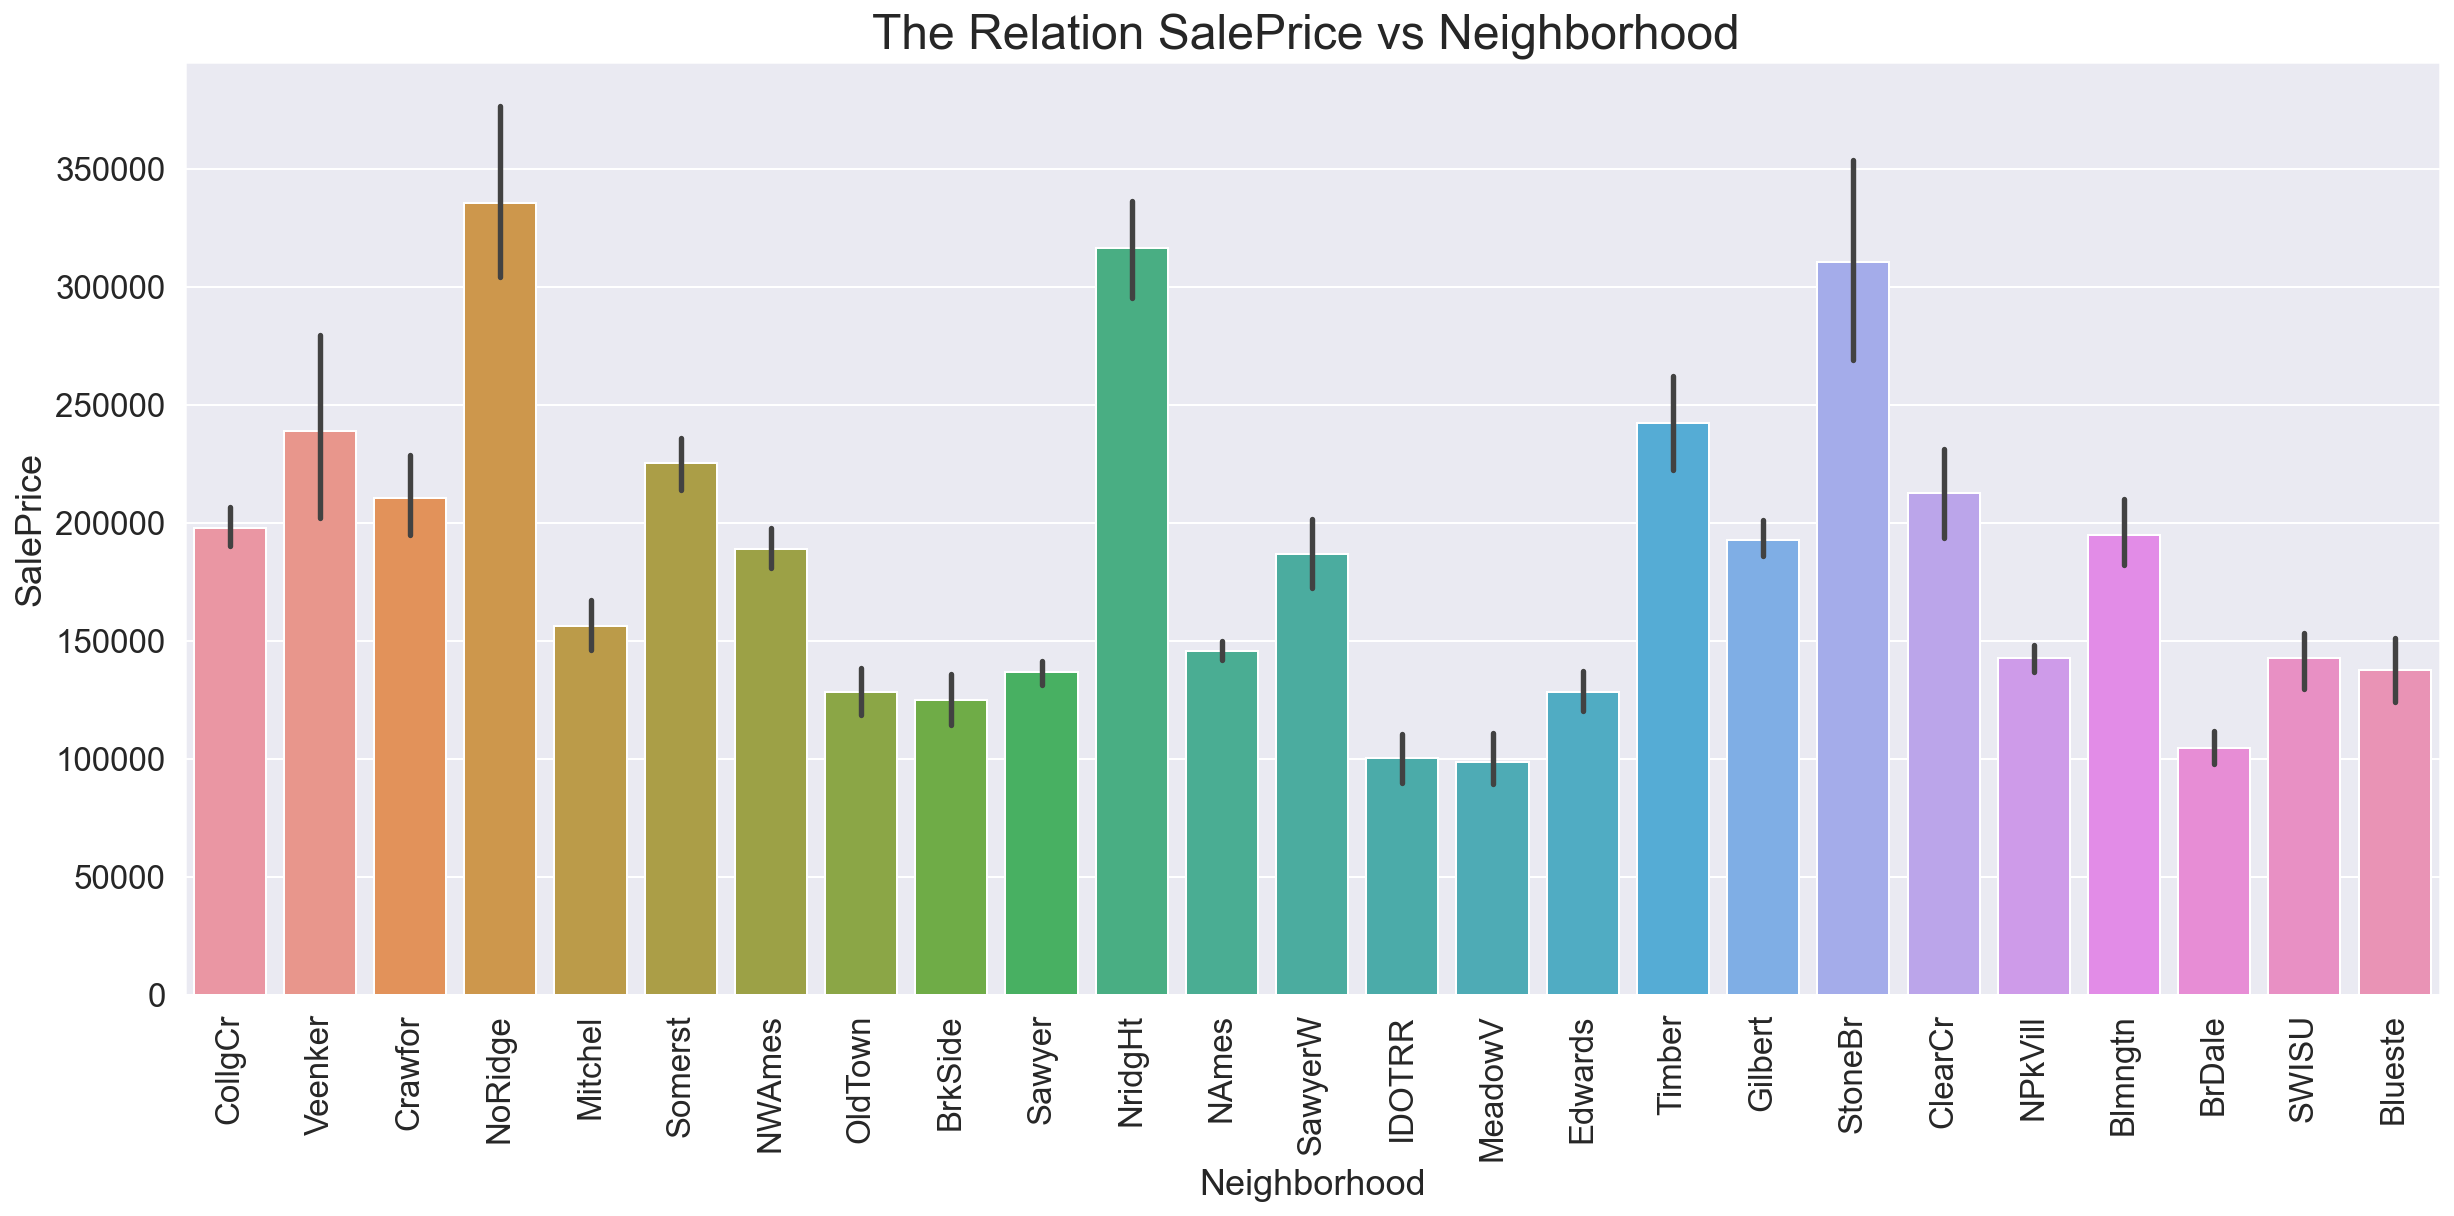

In [380]:
ax = plt.figure(figsize=(18,8));
ax=sns.barplot(data=train, y='SalePrice', x="Neighborhood" )
ax.set_xticklabels(train["Neighborhood"].unique().astype(str), rotation='vertical')#this line to control the labels in x axs
plt.title('The Relation SalePrice vs Neighborhood ', fontsize=24)
plt.show()

- this plot show us how is sale price diffrs based on the Neighborhood, the Northridge and Northridge Heights has highest sale price 

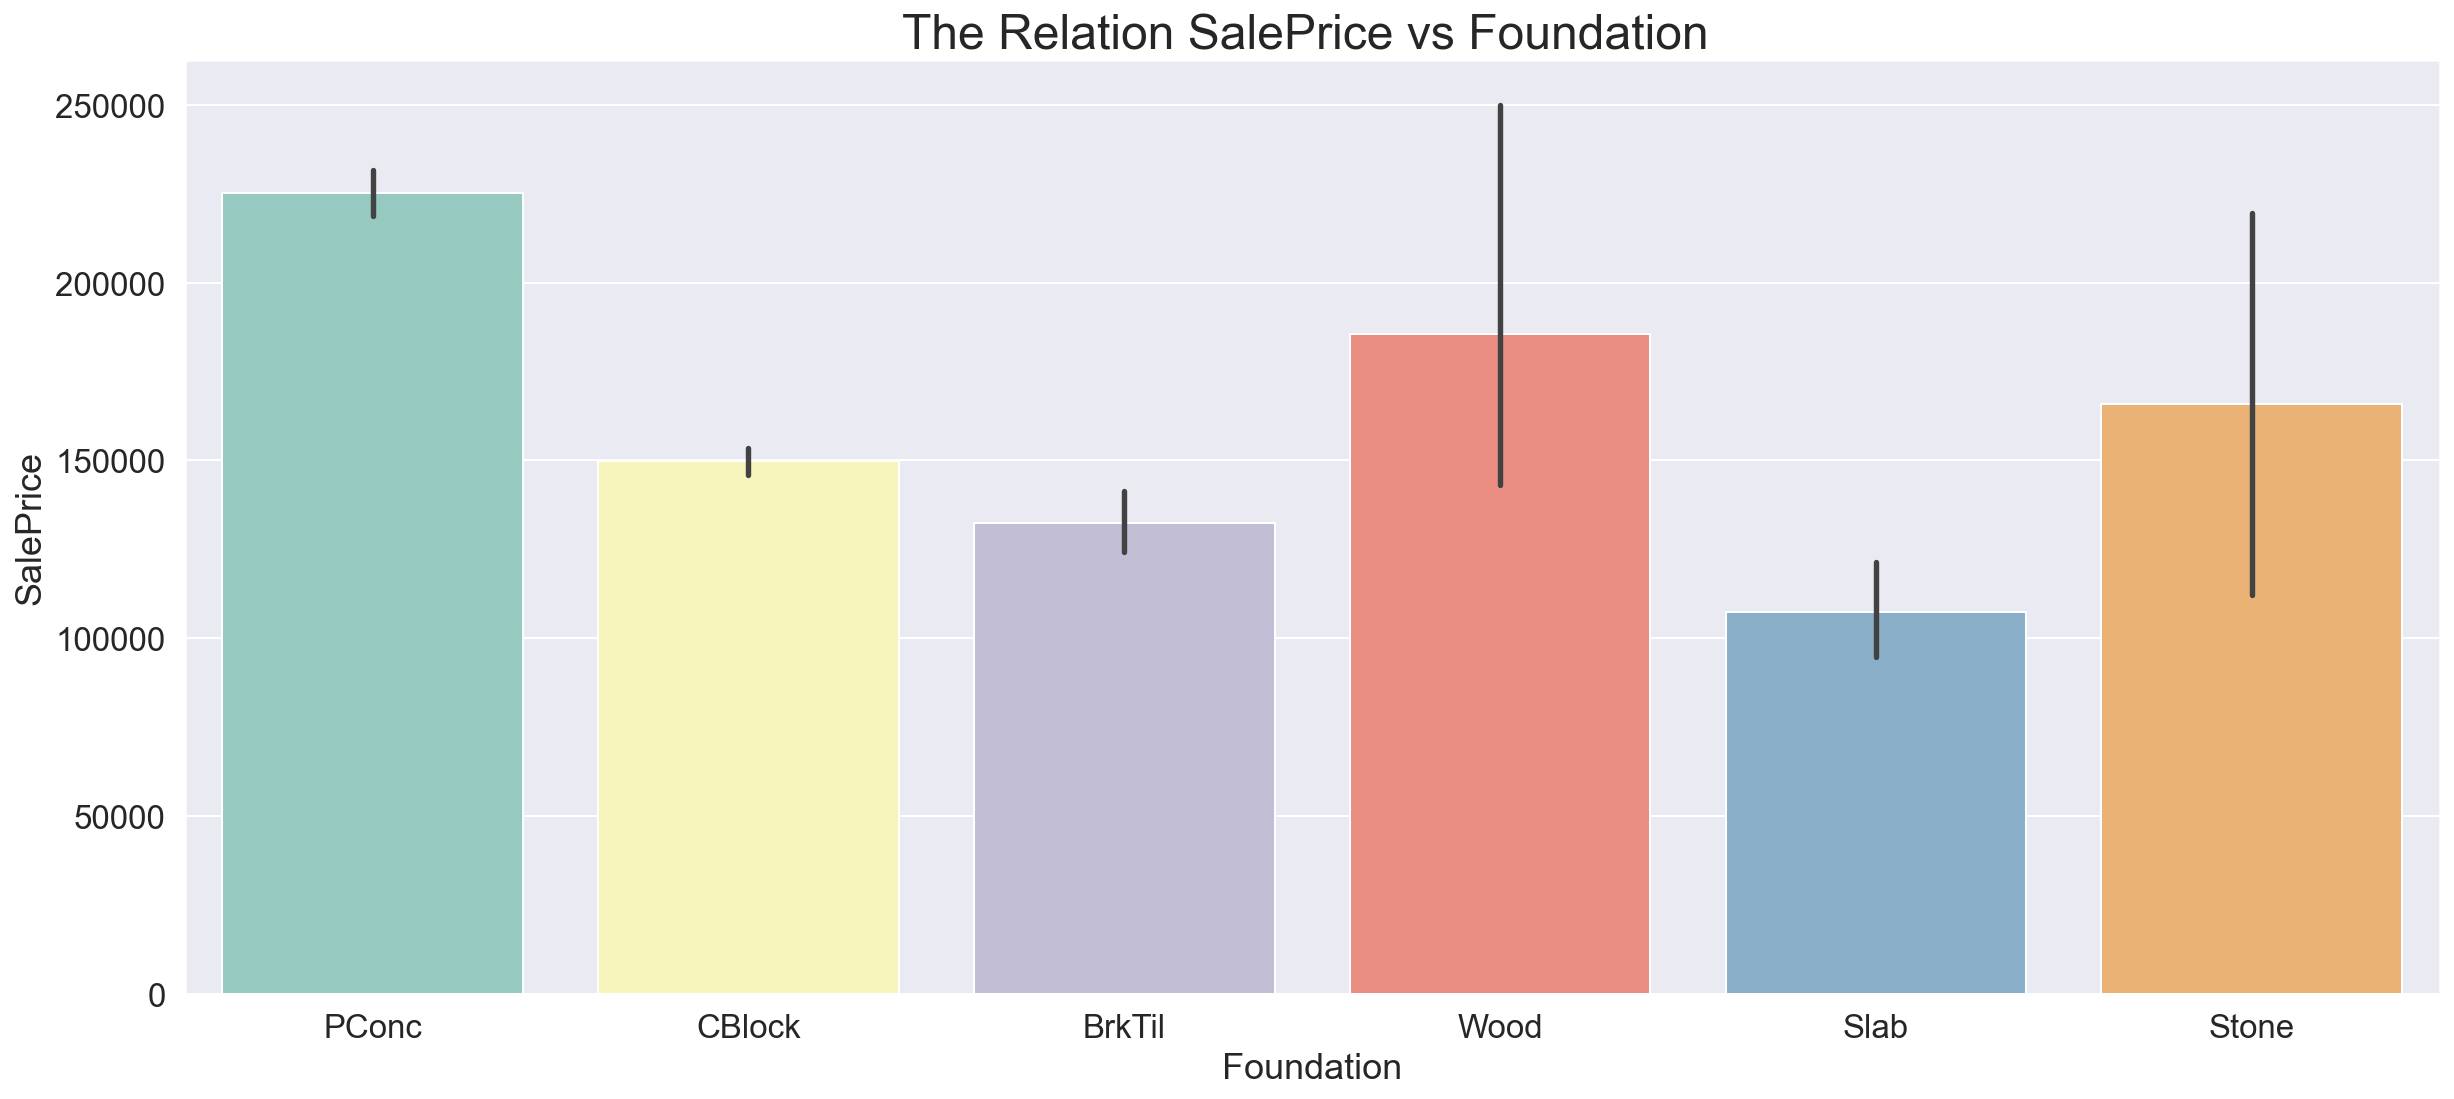

In [381]:
plt.figure(figsize=(18,8));
sns.barplot(data=train, y='SalePrice', x="Foundation" ,   palette='Set3')
plt.title('The Relation SalePrice vs Foundation ', fontsize=24)
plt.show() 

- this plot shows us how is the sale price diffres based on Foundation, Poured Contrete	 has highest price and Slab has lowes price 

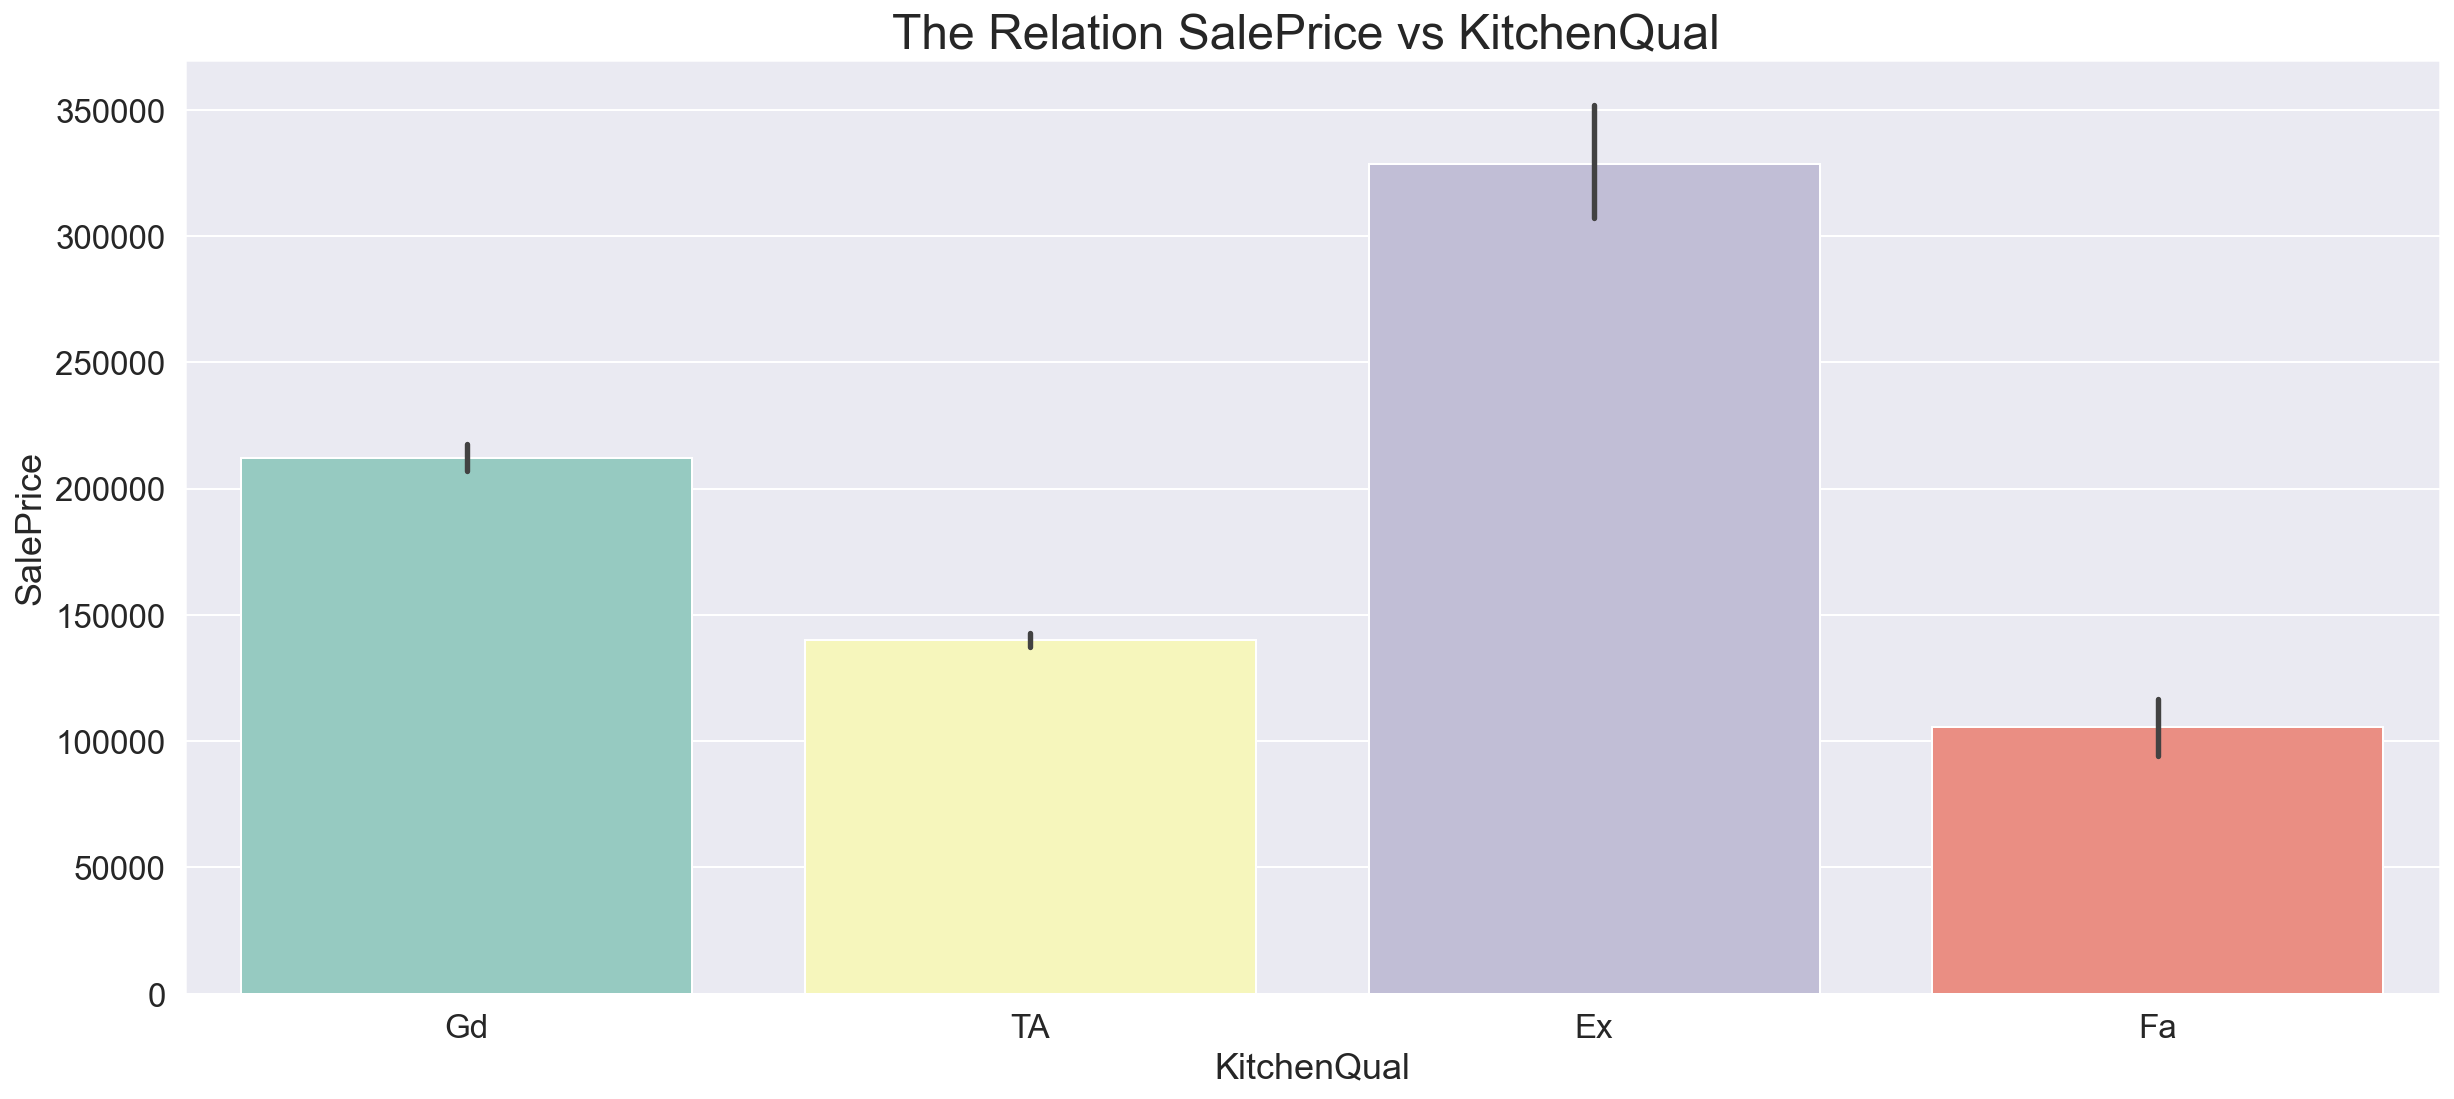

In [382]:
plt.figure(figsize=(18,8));
sns.barplot(data=train, y='SalePrice', x="KitchenQual", palette='Set3')
plt.title('The Relation SalePrice vs KitchenQual ', fontsize=24)
# sns.histplot(data=train, x='SaleCondition',hue="KitchenQual", multiple="dodge", shrink=.8 ,  )
plt.show() 

- the plot above show us is the sale price differs based on KitchenQual, if the  Kitchen was xcellent qulity has highest price and if it was Fair qulity has owes price 

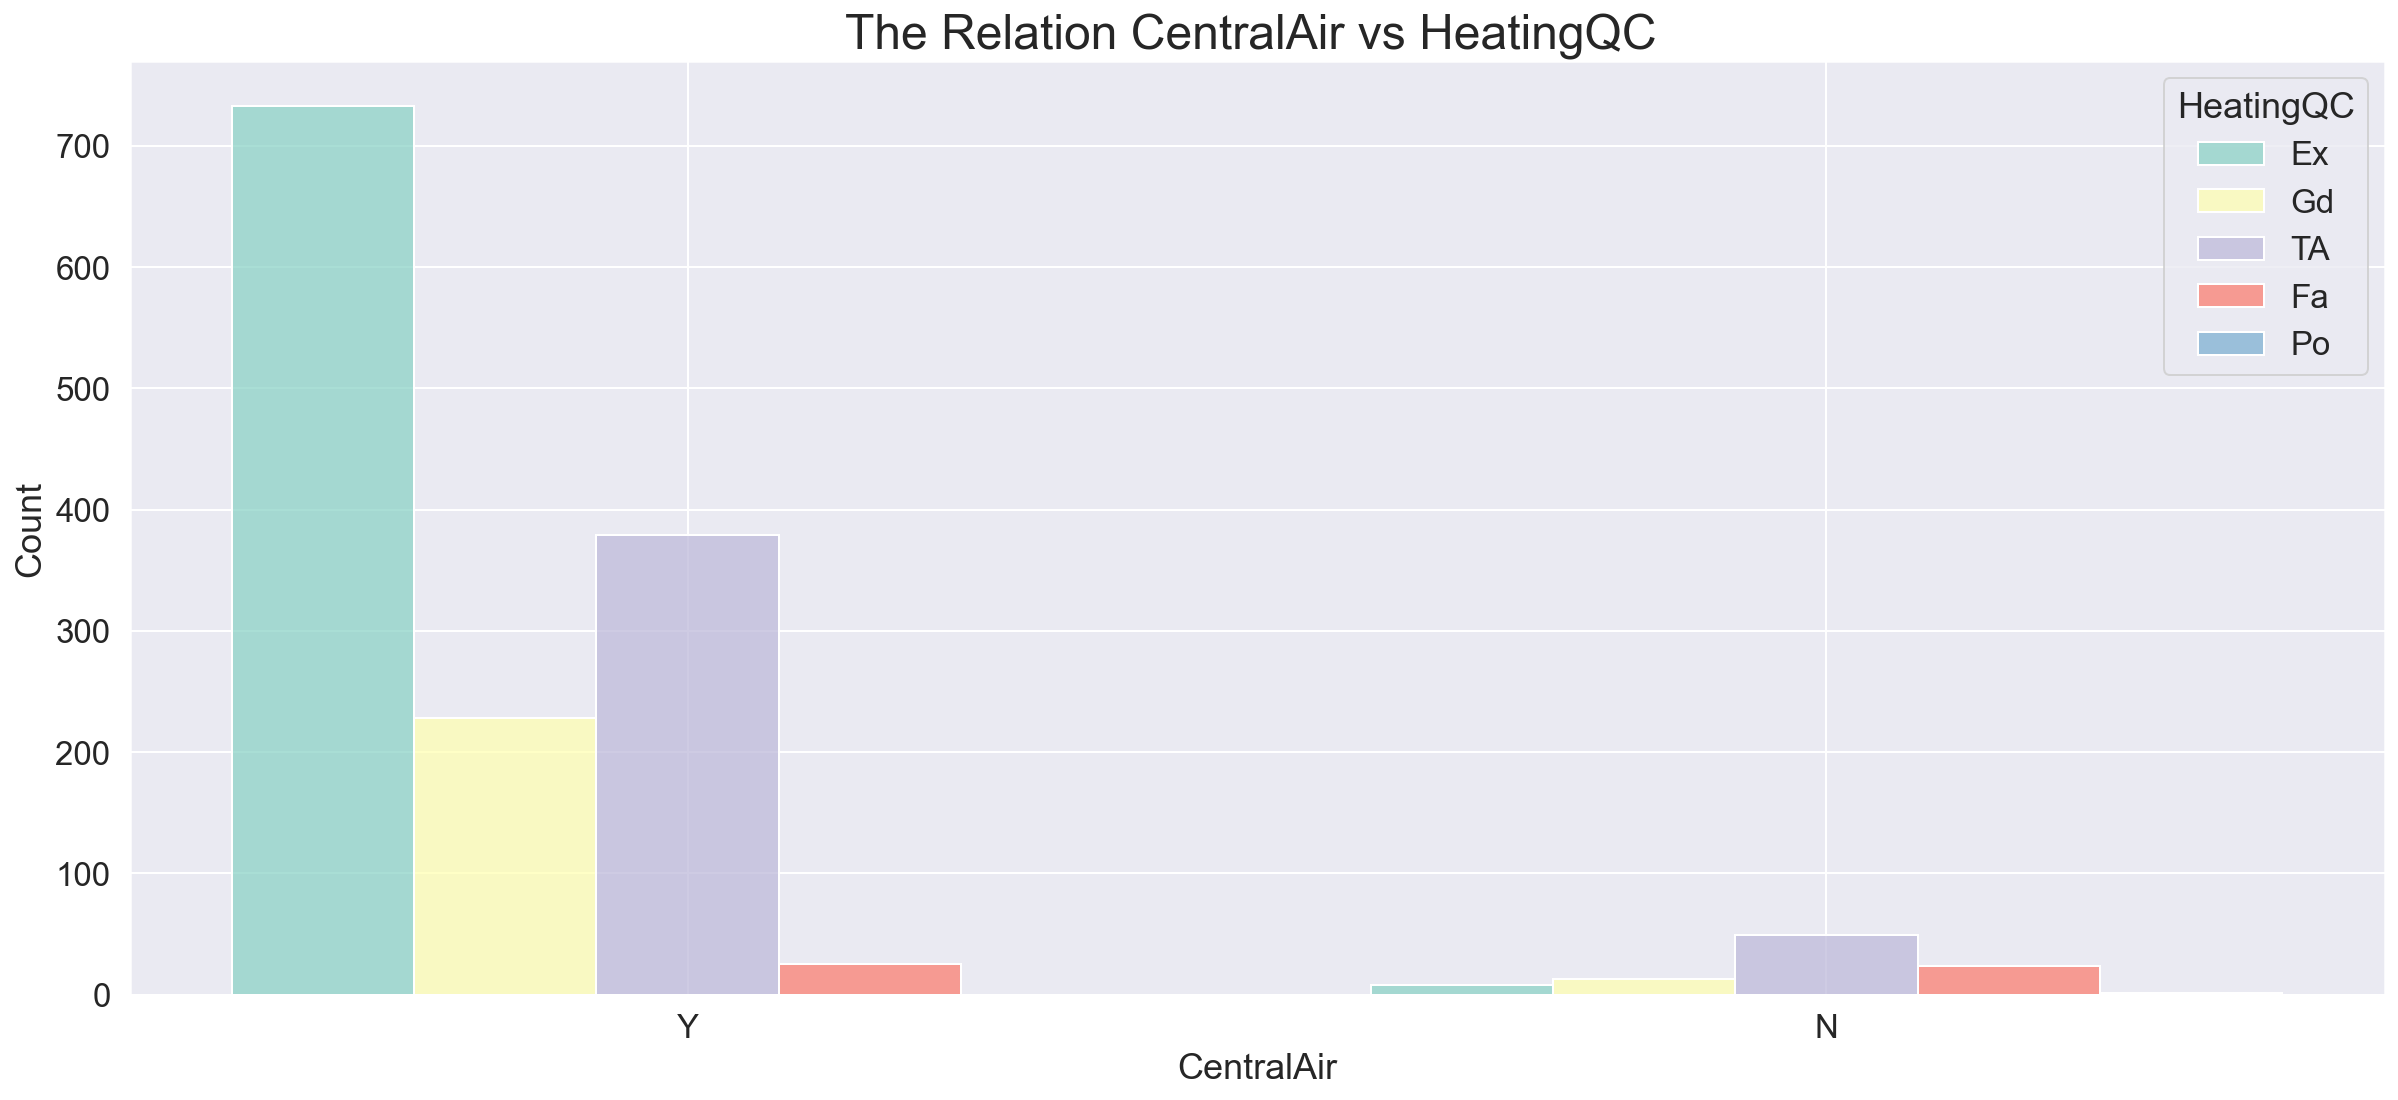

In [411]:
plt.figure(figsize=(18,8));
sns.histplot(data=train, x='CentralAir',multiple="dodge", shrink=.8  , hue='HeatingQC' ,palette='Set3')
plt.title('The Relation CentralAir vs HeatingQC ', fontsize=24)
plt.show()

 - It doesn't look like there is a relationship here between CentralAir and  HeatingQC.

#### D: Categorical and Continuous

- We built boxplots combined with swarmplots or use scatter plot with hue or use catplot from seaborn.

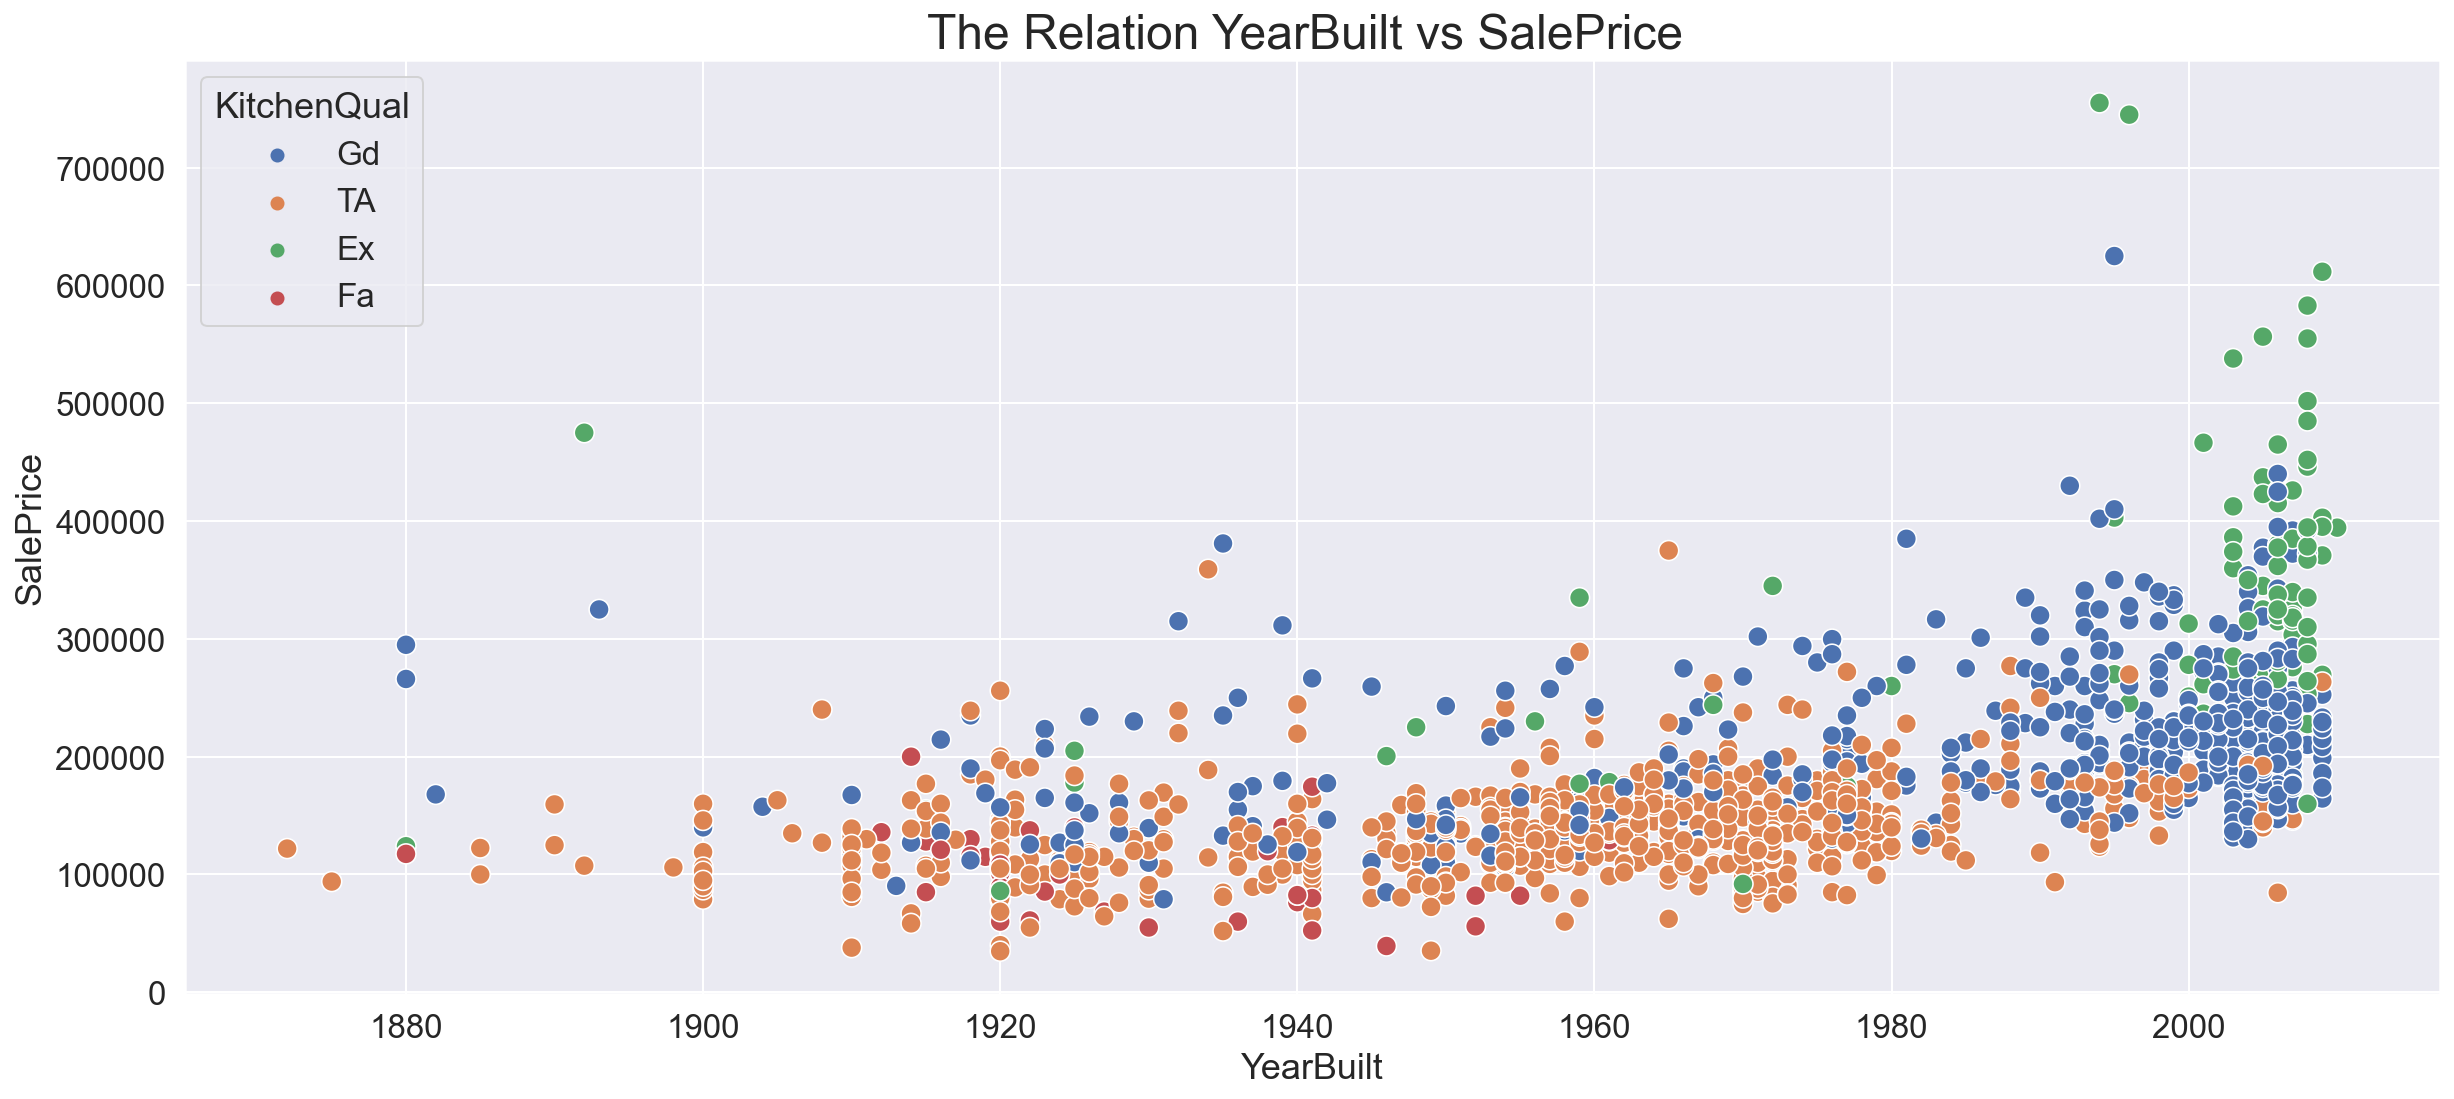

In [467]:
plt.figure(figsize=(18,8));
sns.scatterplot(data=train, y='SalePrice', x='YearBuilt',s=100,hue='KitchenQual')
plt.title('The Relation YearBuilt vs SalePrice ', fontsize=24)
plt.show()

- The scatter shows us a gap when YearBulit was in 40's , We notice that in 2000's the quality of kitchen improved.and gitting really high and most of it were Excellent and So, SalePrice of house increased.

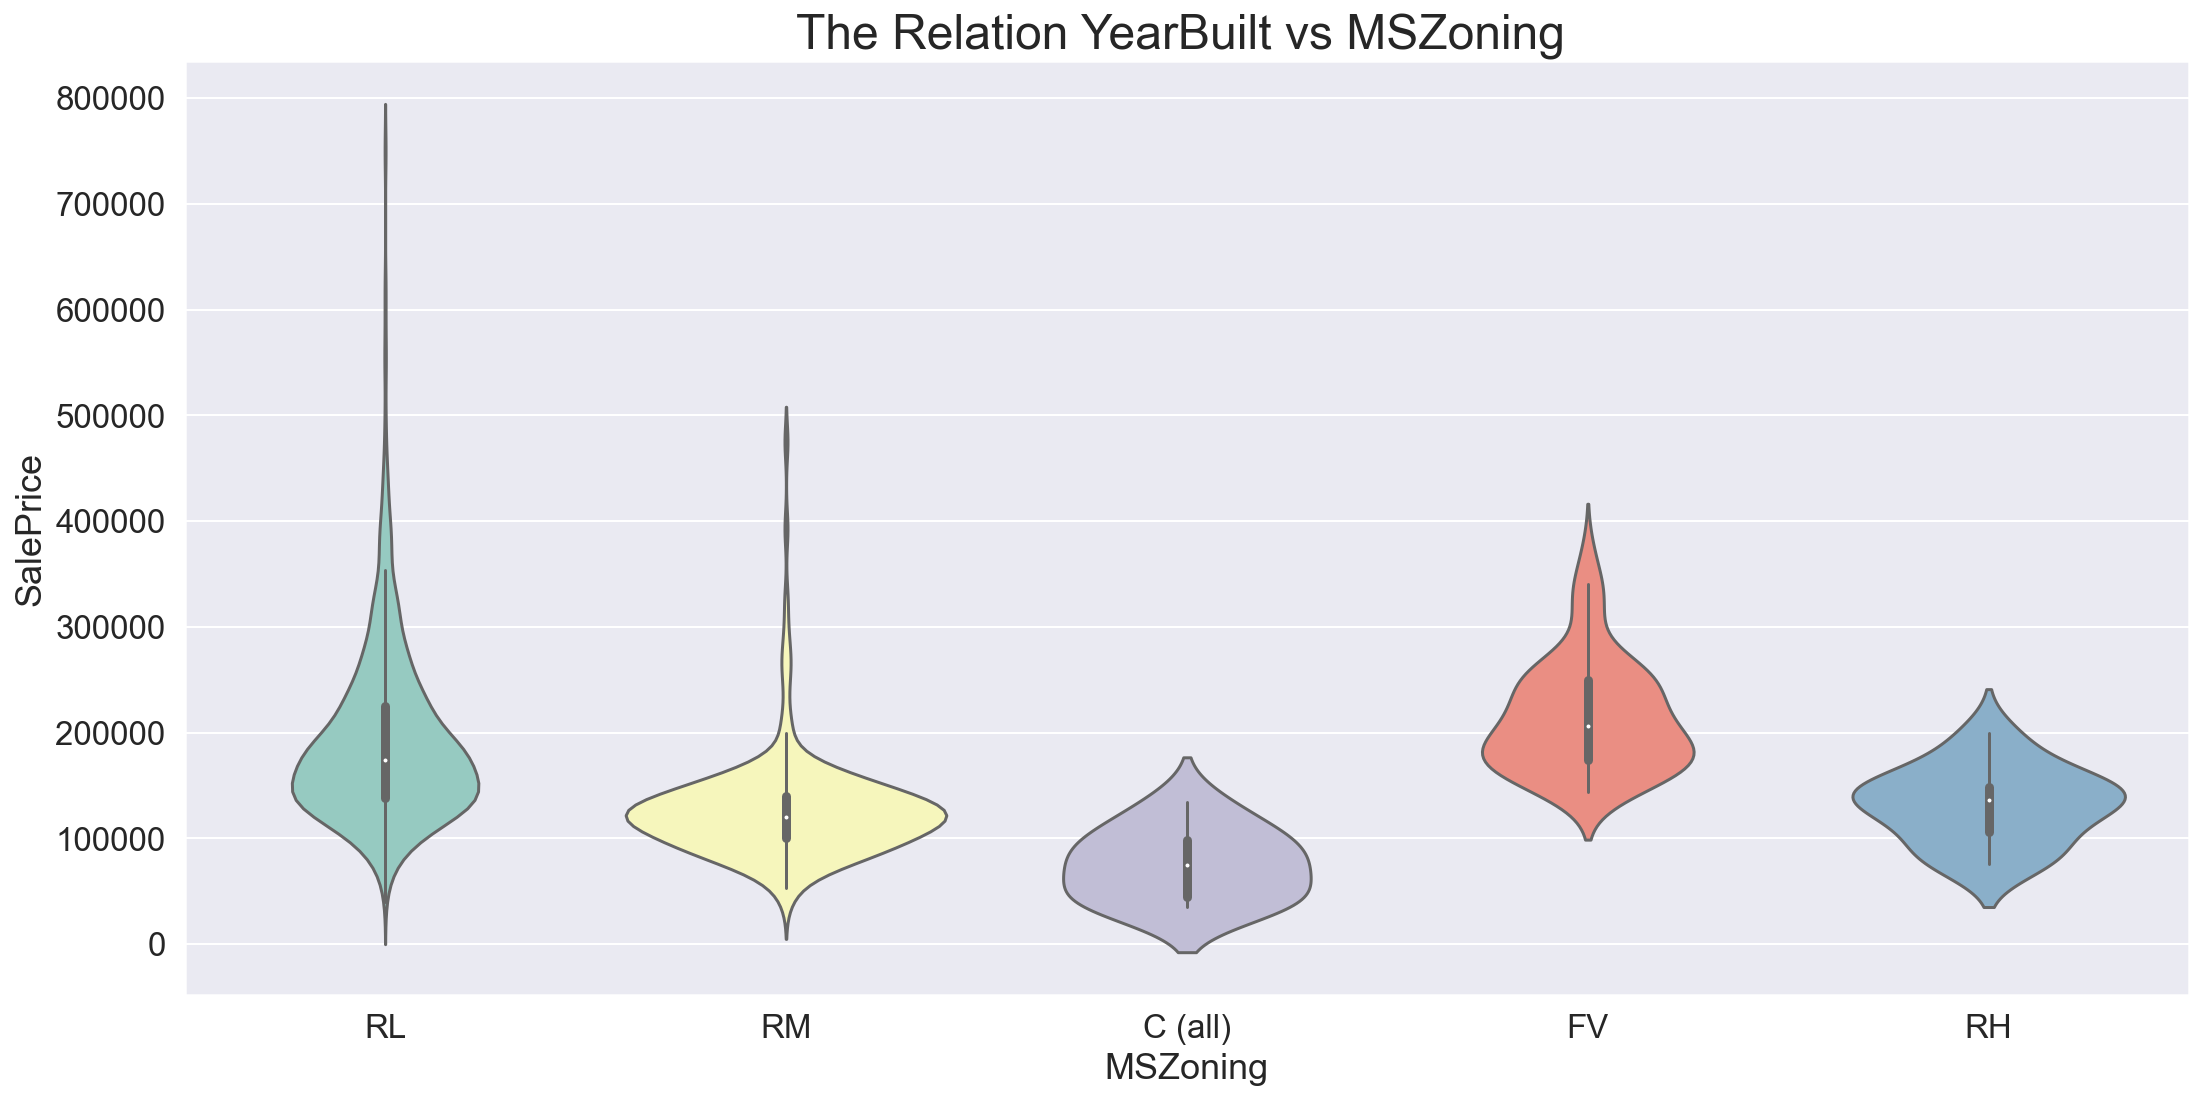

In [469]:
plt.figure(figsize=(16,8)) # optional
sns.violinplot(x="MSZoning", y="SalePrice", data=train , palette='Set3');
plt.title('The Relation YearBuilt vs MSZoning ', fontsize=24);

- The plot show us the importance of location zone to house sale price. The Floating Village Residential(FV) zone has highest sale price on the other hand the Commercial(C) zone has lowest sale price.

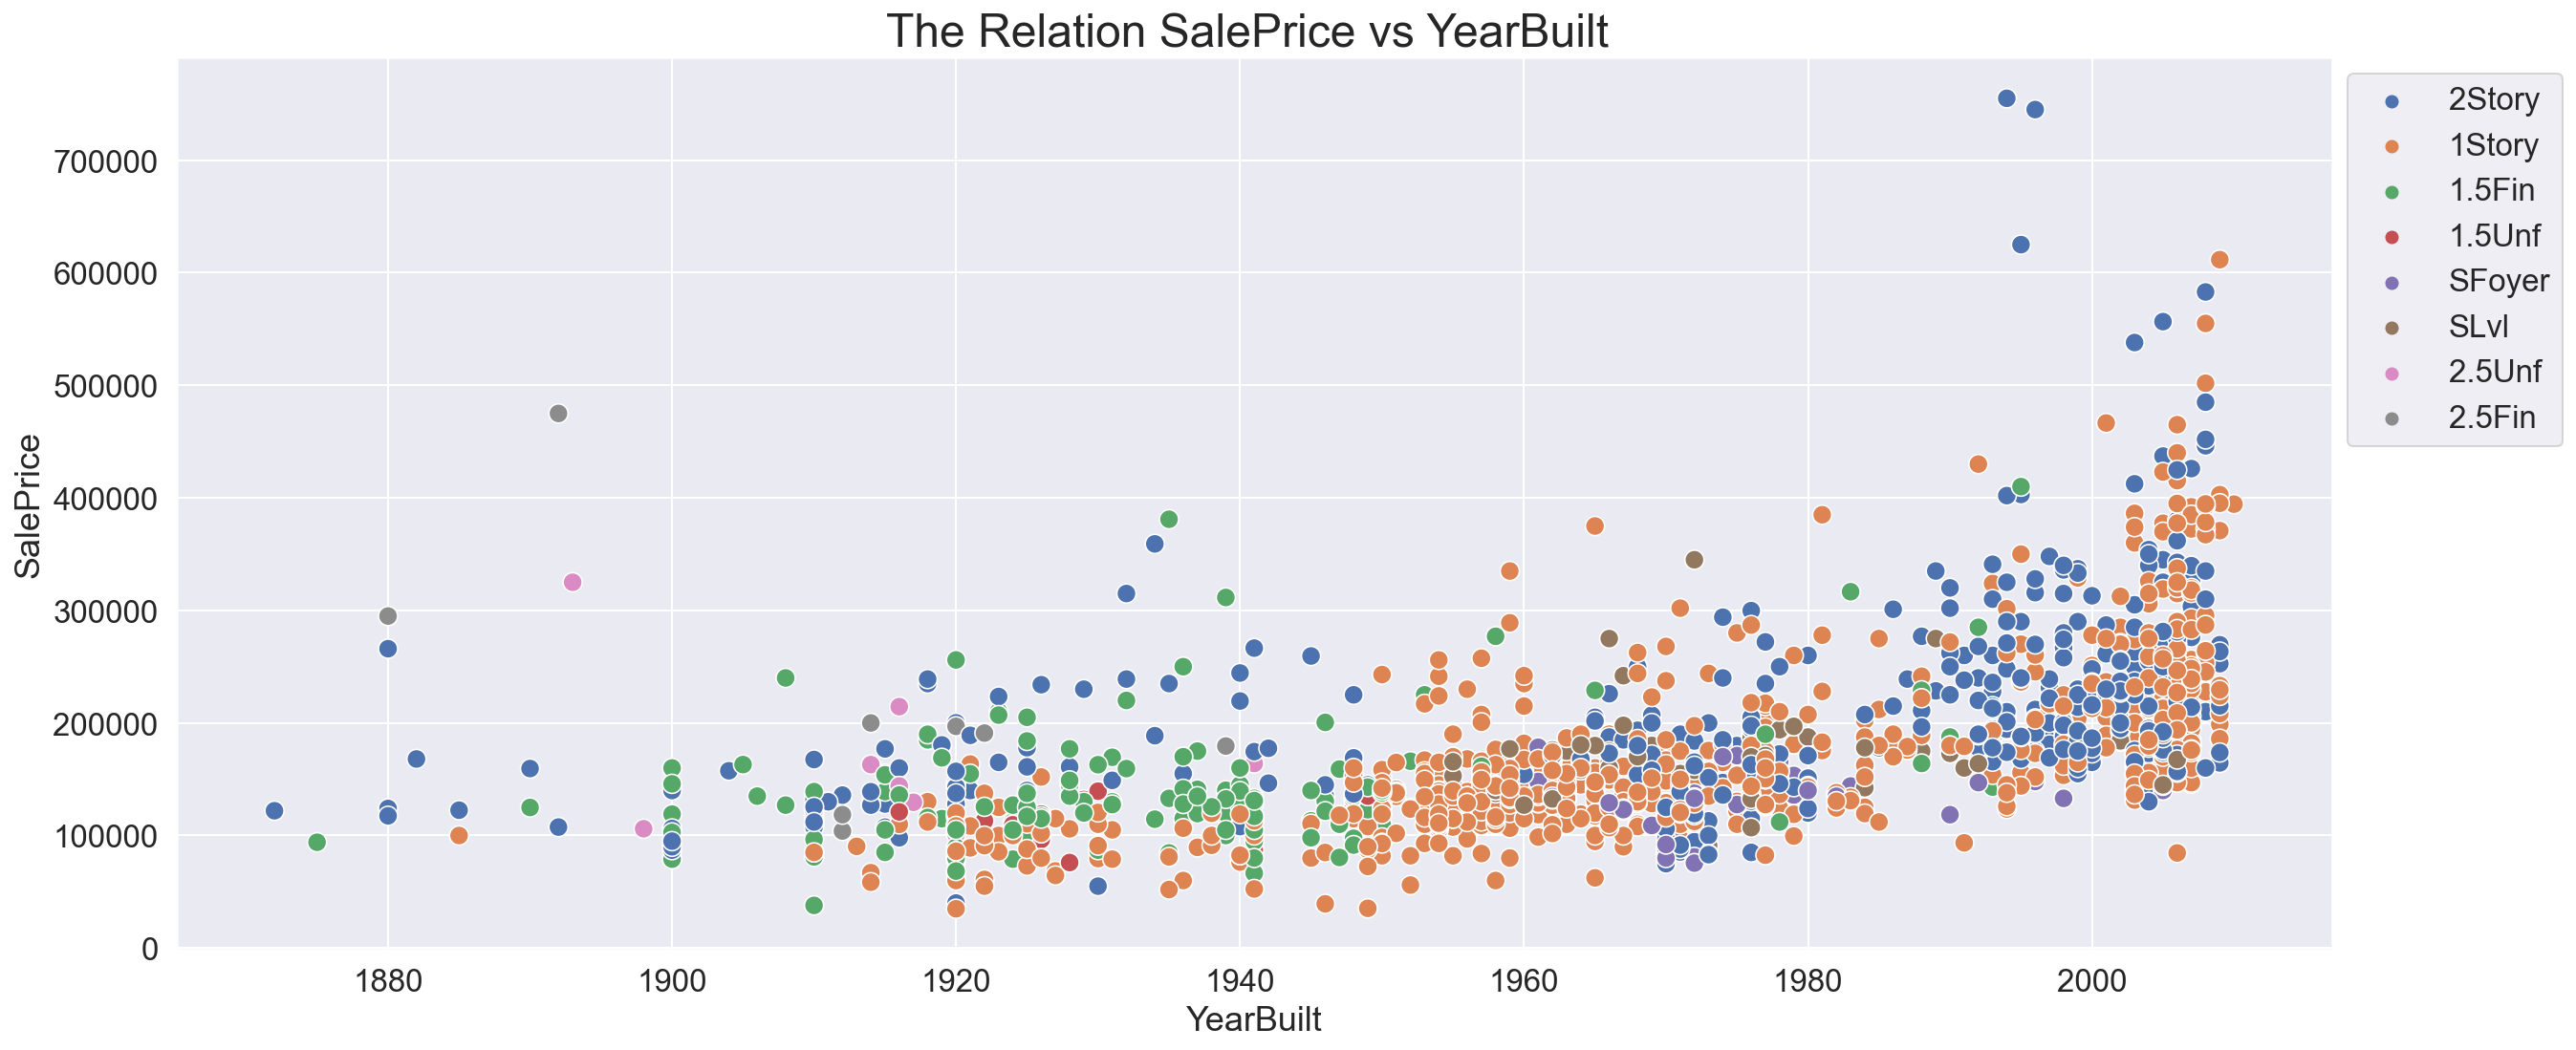

In [470]:
ax=plt.figure(figsize=(18,8))
ax=sns.scatterplot(data=train, y='SalePrice', x='YearBuilt',s=100,hue='HouseStyle' , markers =True)
ax.legend(bbox_to_anchor=(1,1),loc='upper left')#this line to change position of huebox
plt.title('The Relation SalePrice vs YearBuilt ', fontsize=24);
plt.show()

- The scatter shows us the relationship between the house sale price and house year bulit, the new houses has higher price. There is a gap in house sales when YearBulit was in 40's , At the begganing of 1950, the 1story became the popular house style.


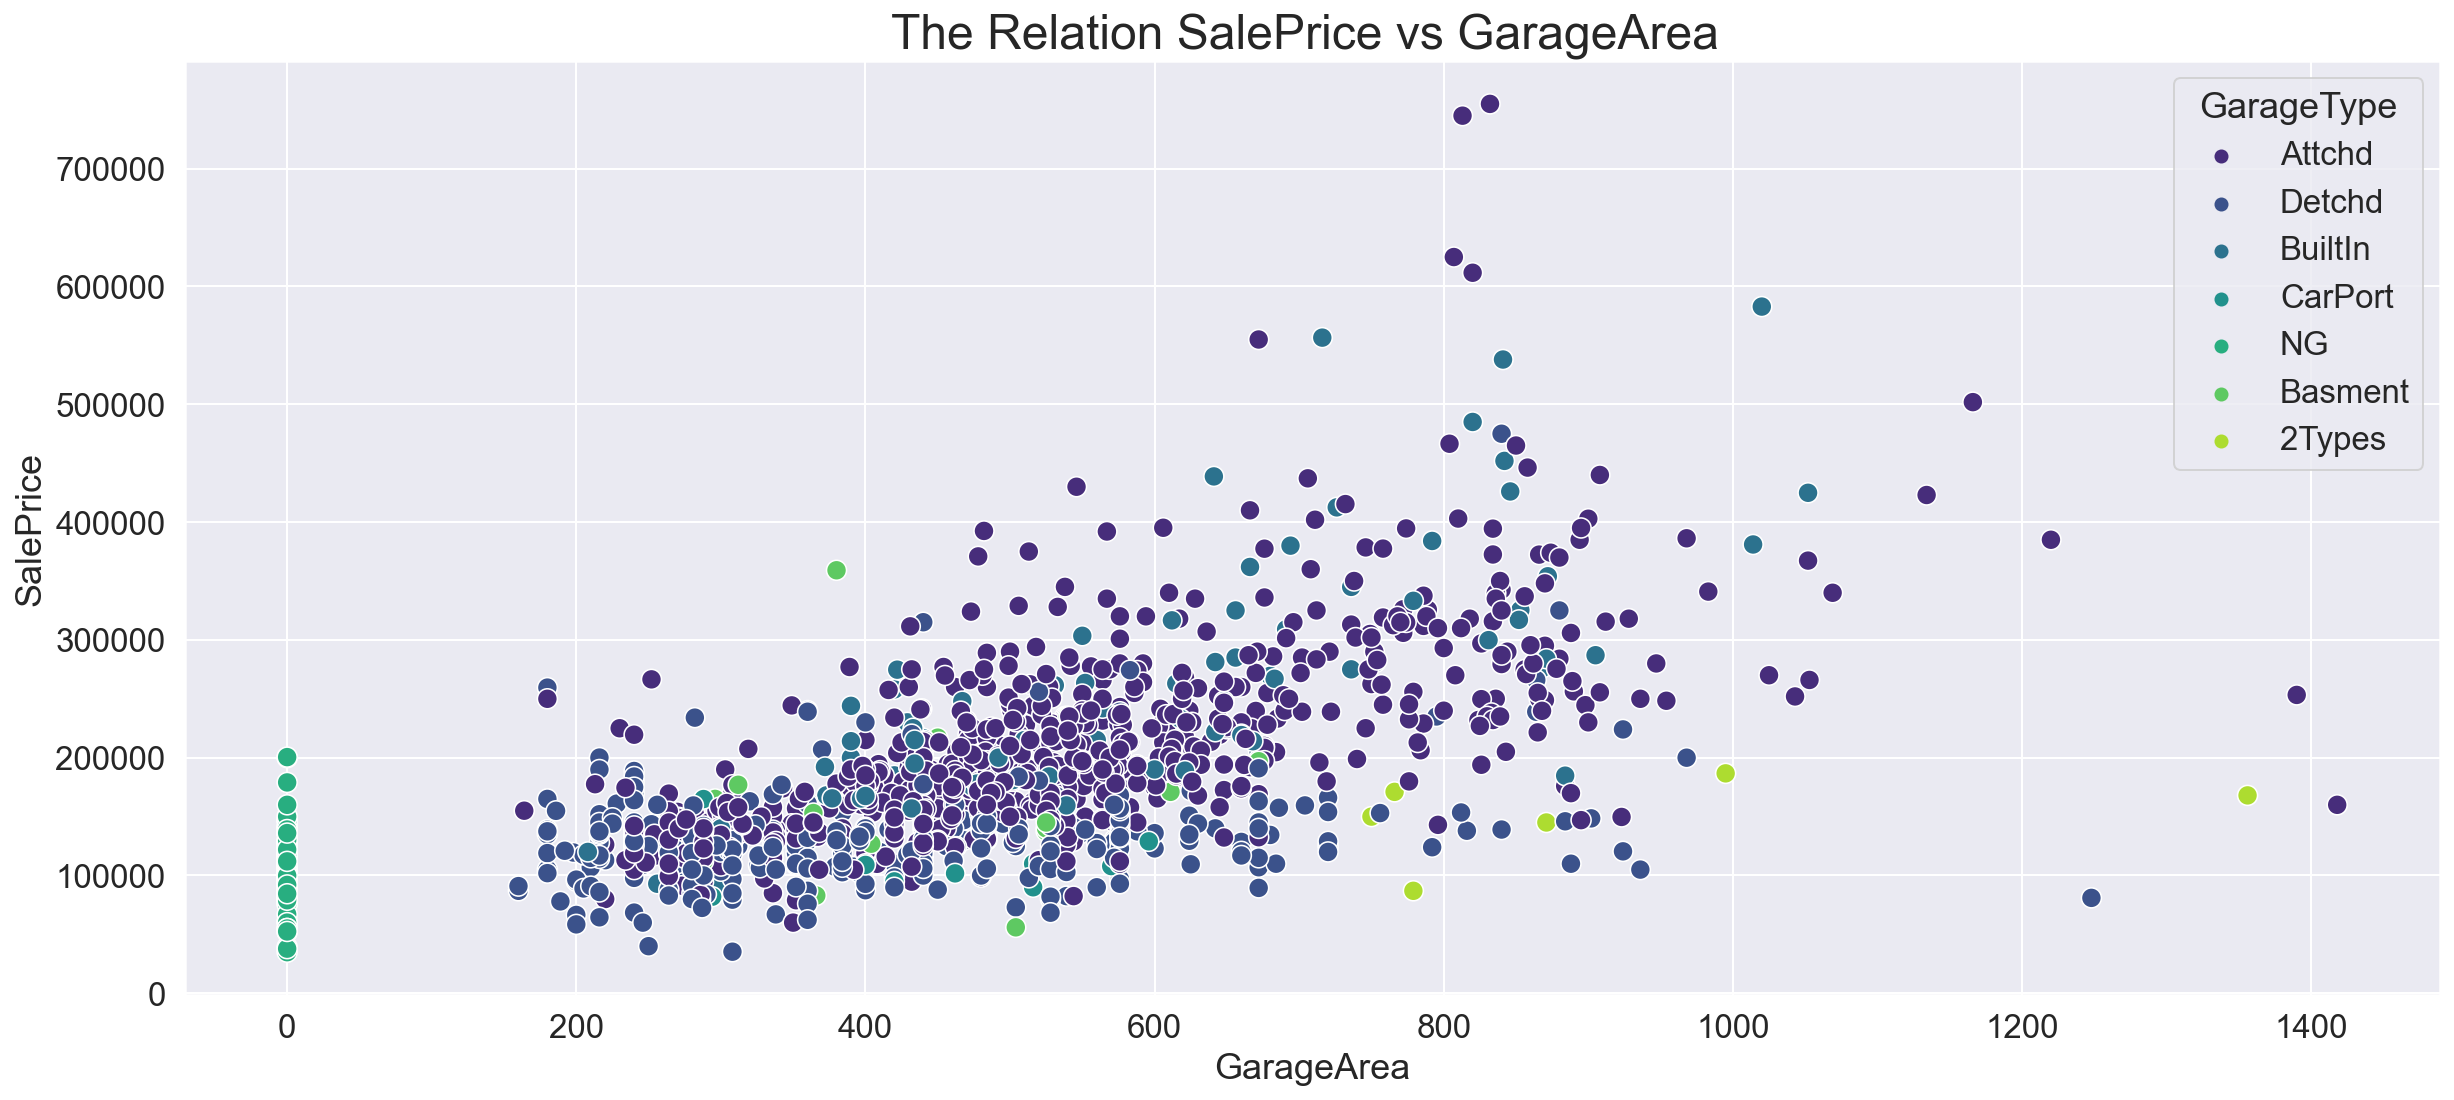

In [471]:
plt.figure(figsize=(18,8));
sns.scatterplot(data=train, y='SalePrice', x='GarageArea',s=100  , hue='GarageType' , palette='viridis')
plt.title('The Relation SalePrice vs GarageArea ', fontsize=24);
plt.show()

- The scatter shows us a strong relation between SalePrice and GarageArea, the SalePrice get higher when GarageArea between 700-900. We notice the most common type of Garage is Attched.

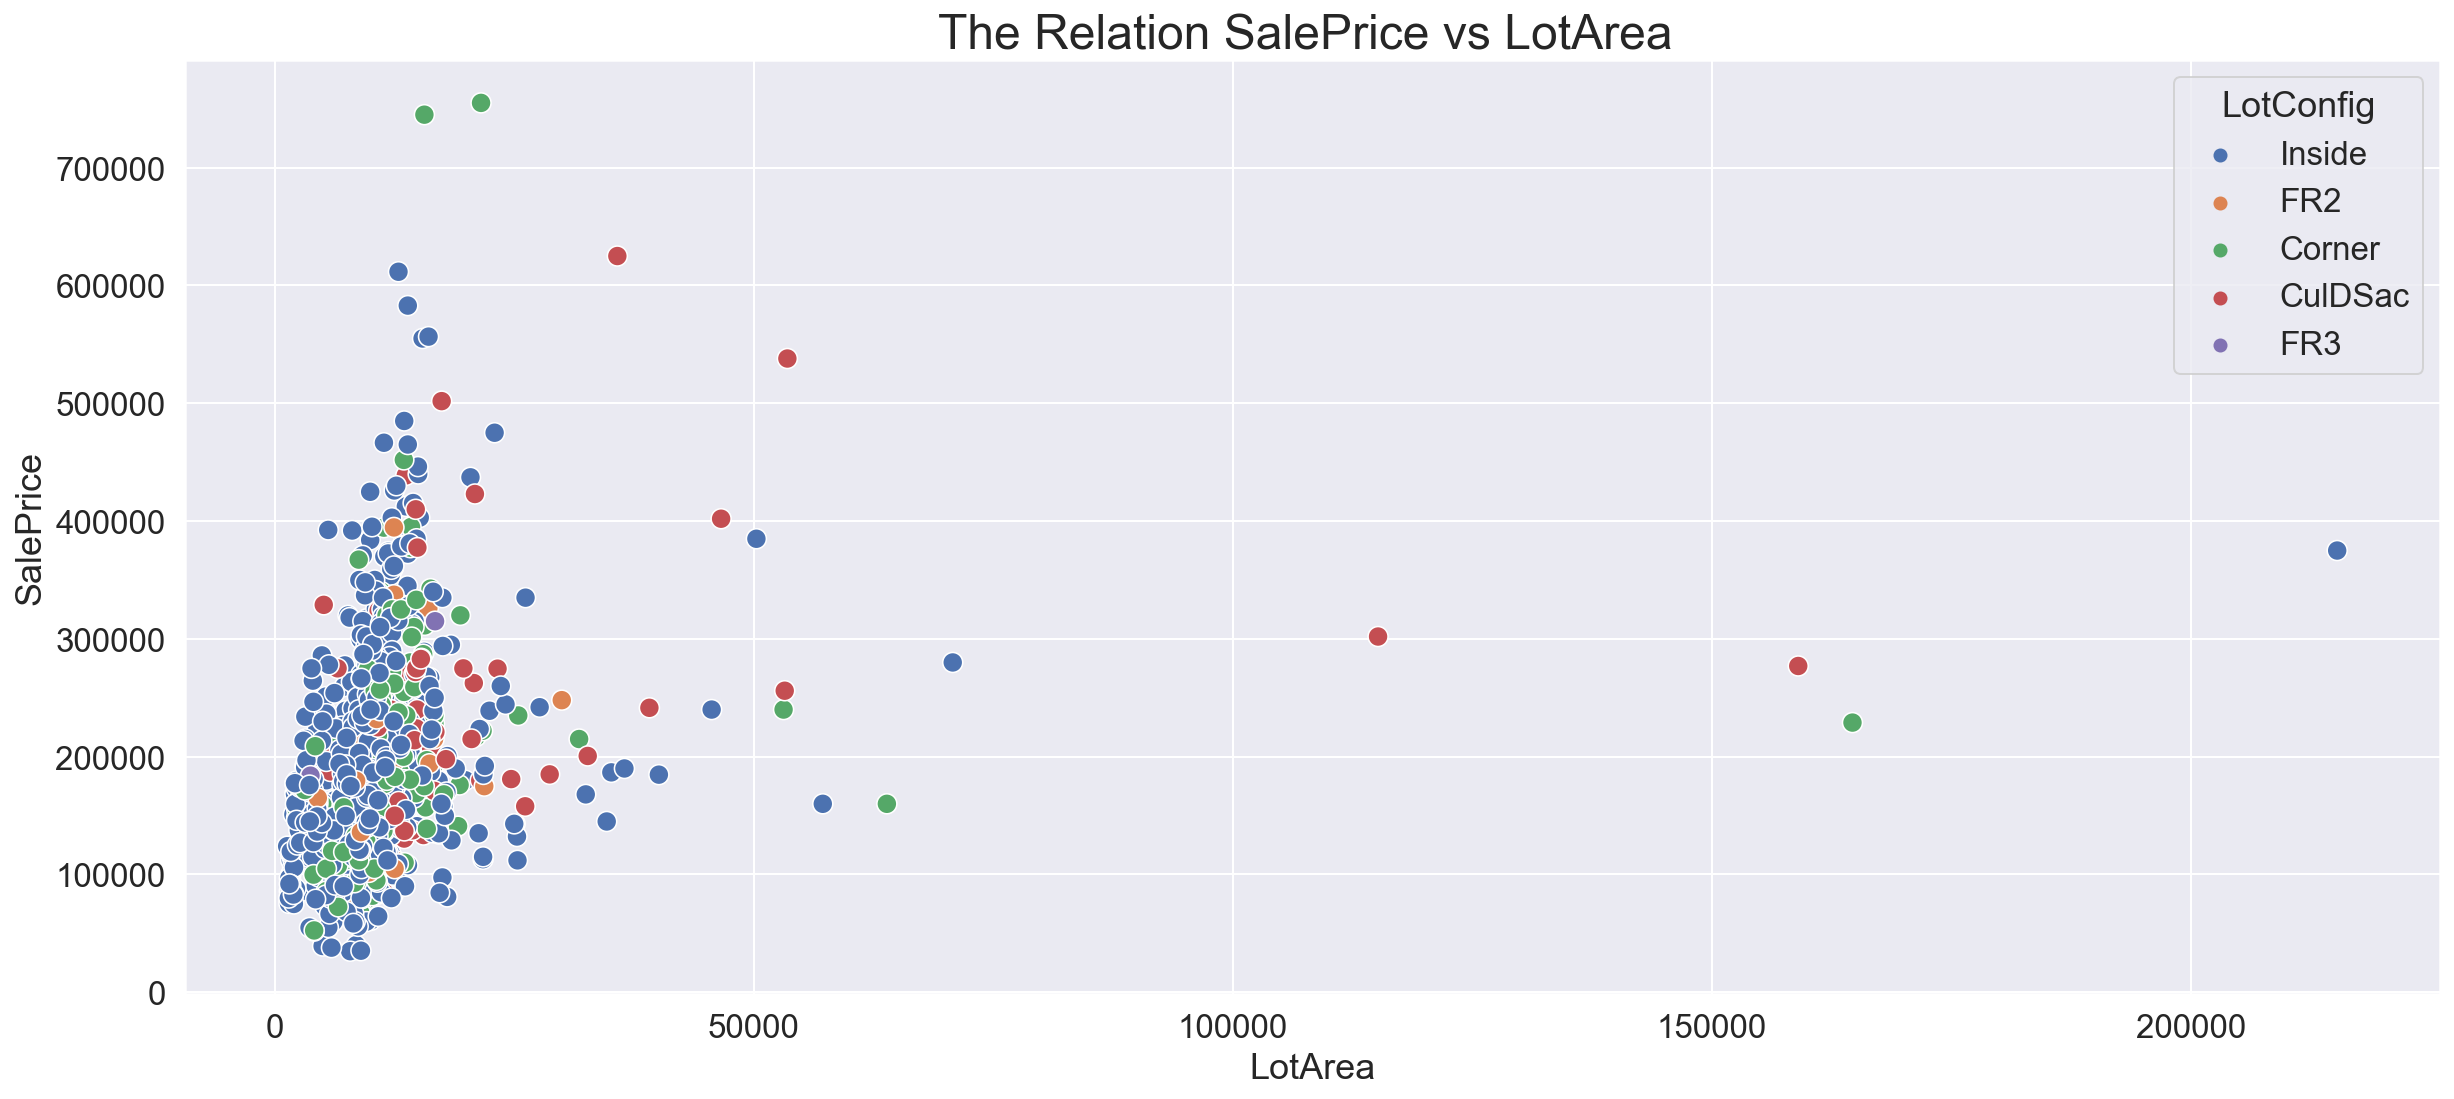

In [472]:
plt.figure(figsize=(18,8));
sns.scatterplot(data=train, y='SalePrice', x='LotArea',s=100  , hue='LotConfig')
plt.title('The Relation SalePrice vs LotArea ', fontsize=24);
plt.show()

- There is no relation between Saleprice and LotArea, but, we notice the LotArea of most houses less than 25000 square feet and most of them 'inside' lot.

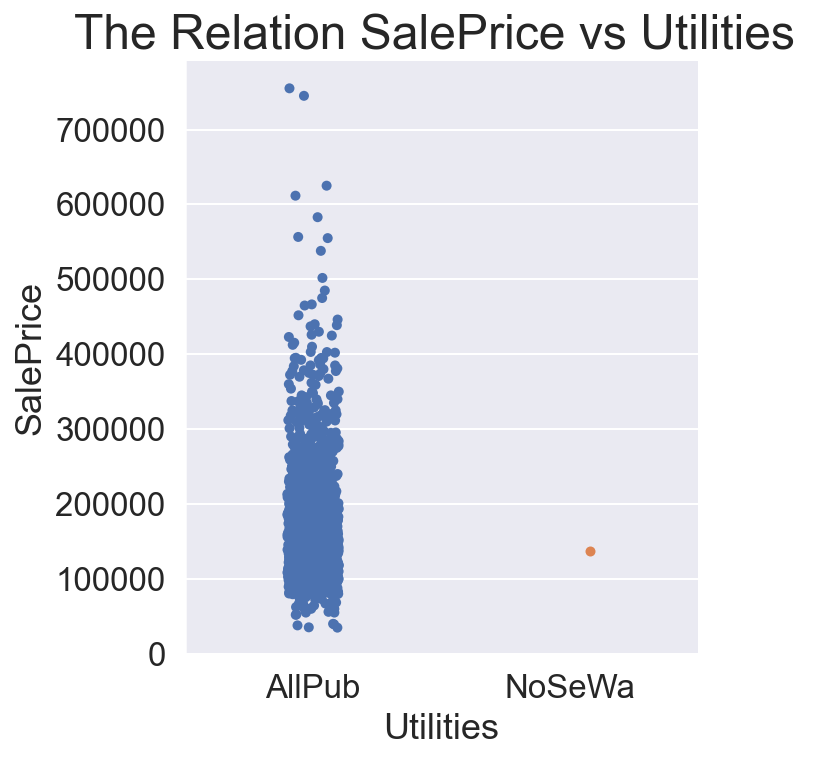

In [473]:
sns.catplot(x="Utilities", y="SalePrice", data=train)
plt.title('The Relation SalePrice vs Utilities', fontsize=24);
plt.show()

- The scatter shows us the most of houses has All public Utilities (Electricity,Gas,Water, Septic Tank)

**Sammary**

- Based on the above visualization, we revealed some insights from it. House sale price affected by built year. location zone seems to be important as well in deciding house price. There are also other features that play roles in afficting the sale price of the house like the total area of its basement, the living area, kitchen's quality, its foundation and the neighborhood of the house.


### Heatmap

<AxesSubplot:>

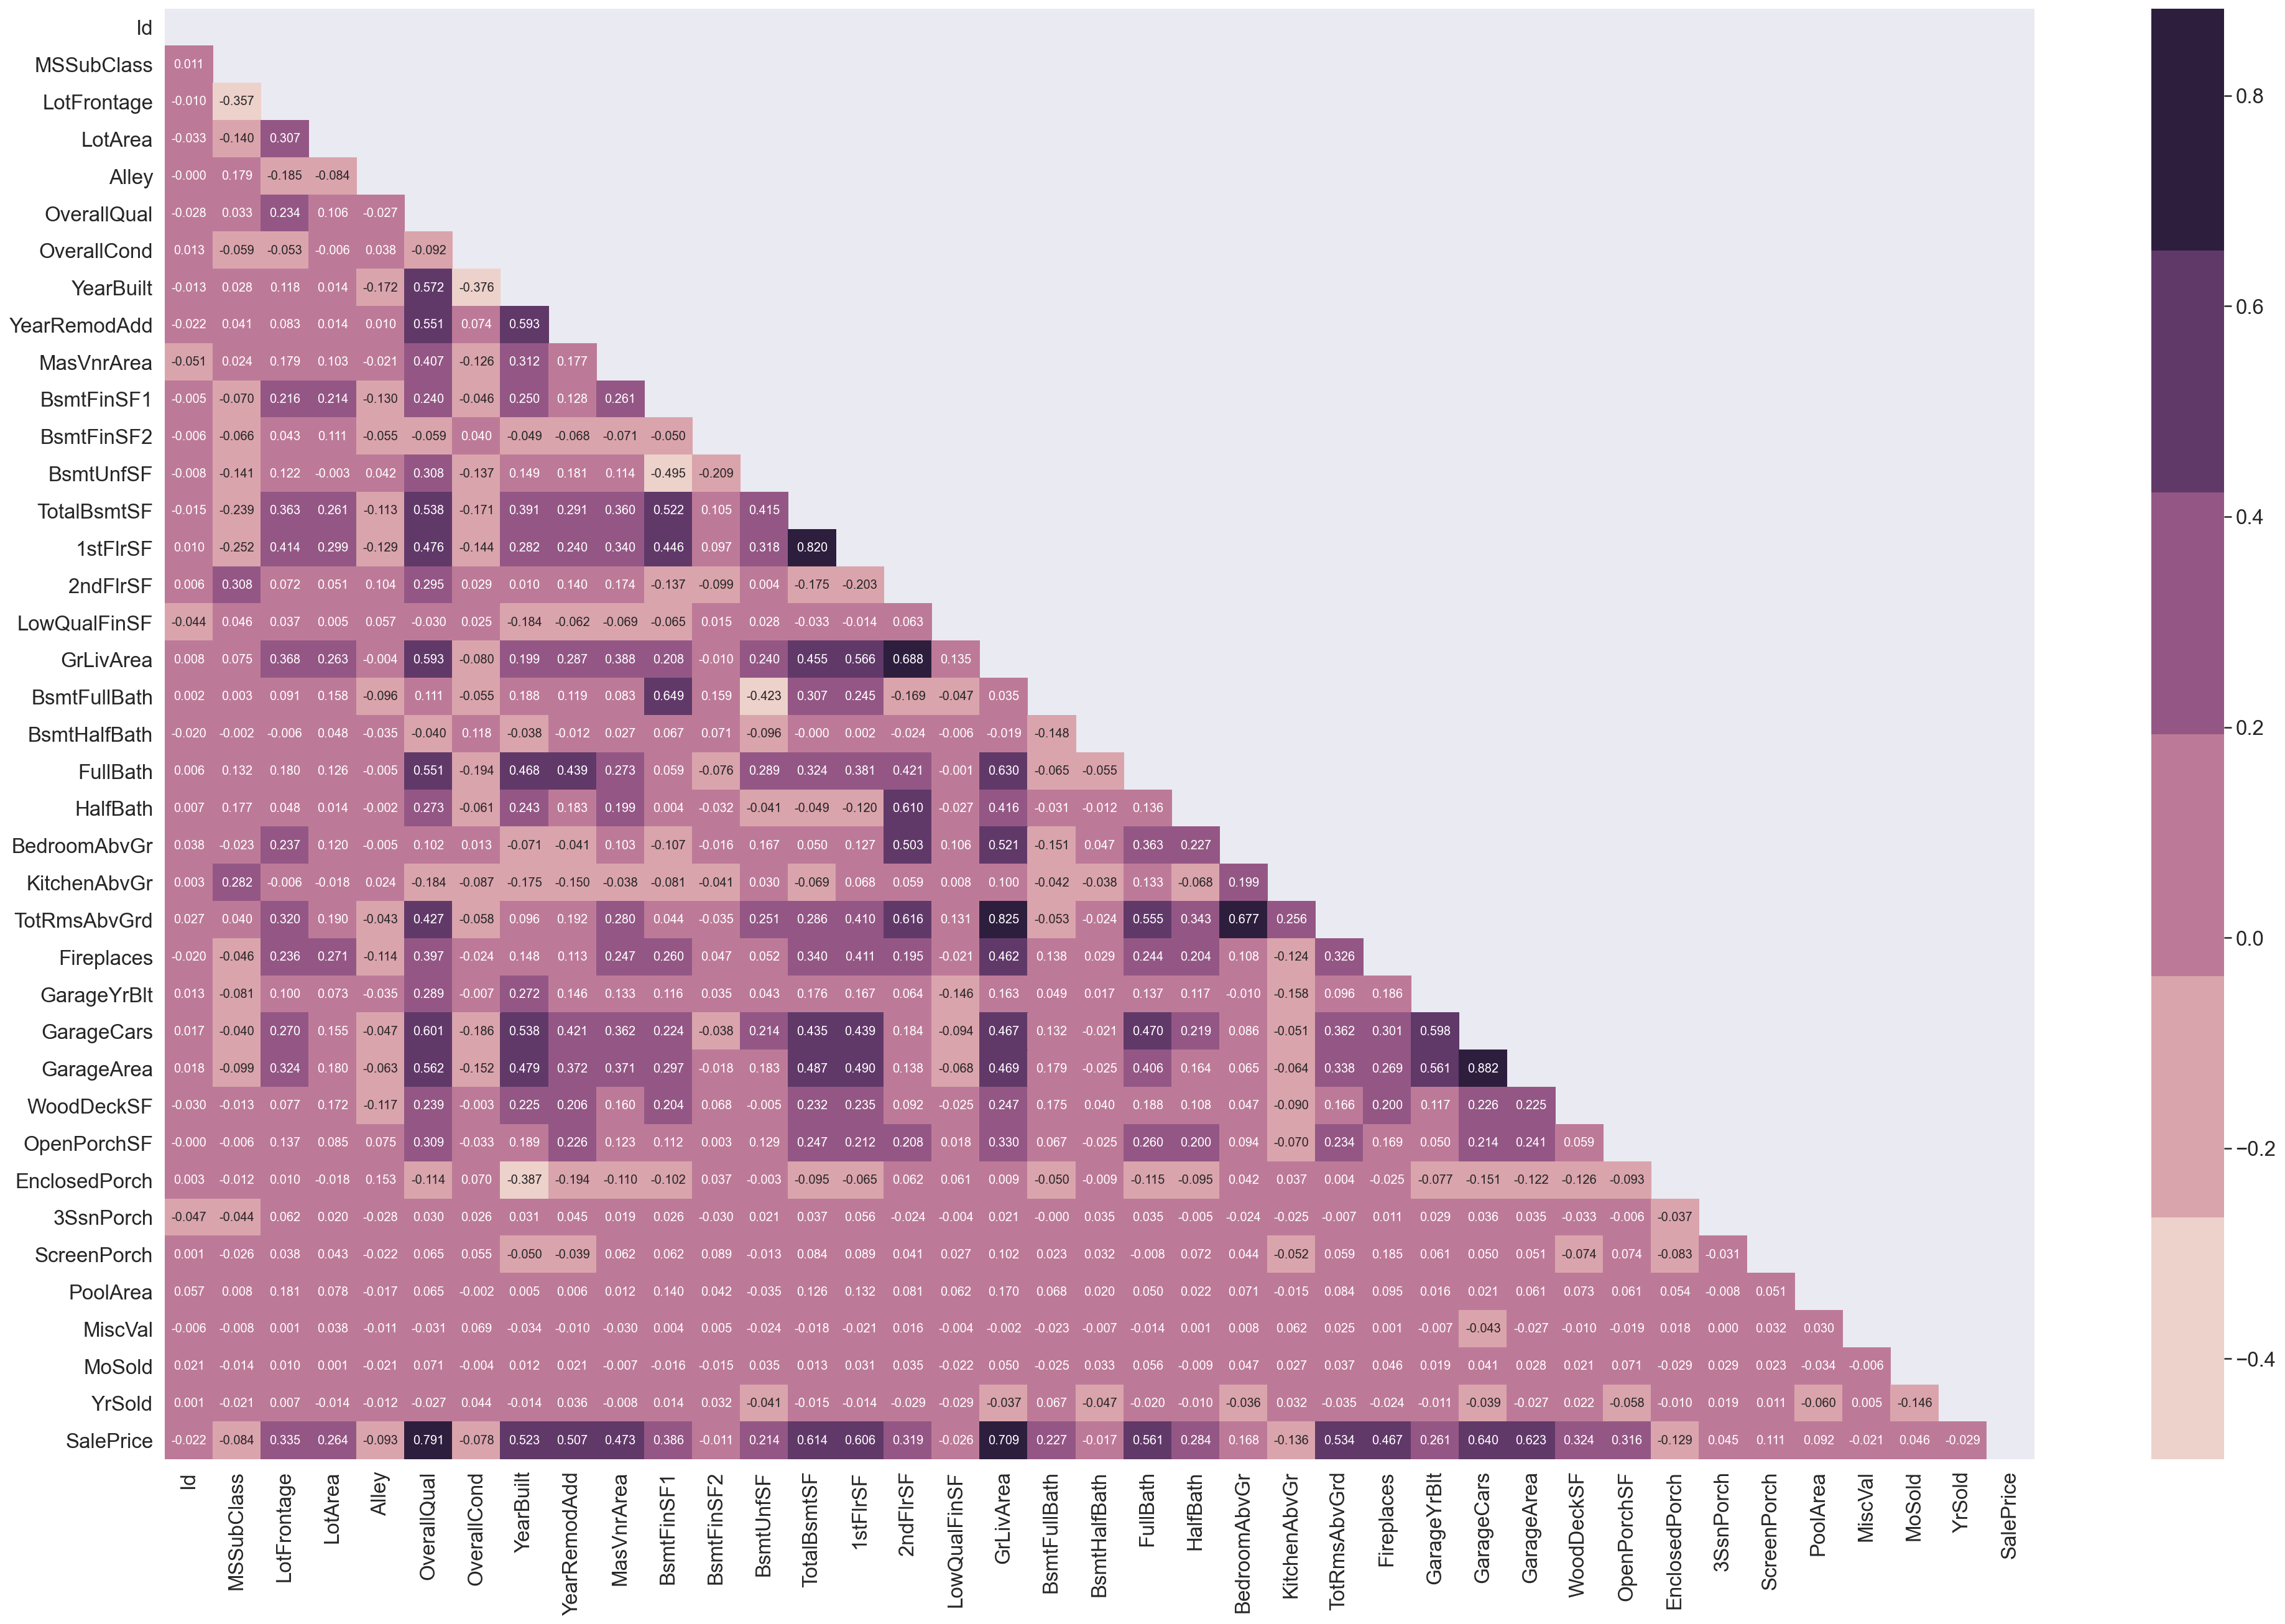

In [295]:
train_copy = train.copy()

mask = np.zeros_like(train_copy.corr(),dtype=bool)
mask[np.triu_indices_from(mask)] = True

## Heatmap visualization
plt.figure(figsize=(30,20))
sns.heatmap(train_copy.corr(),
            annot=True,
            fmt=".3f",
            annot_kws = {"size":10},
            cmap=sns.cubehelix_palette(),
            mask=mask)

### Missing Data 

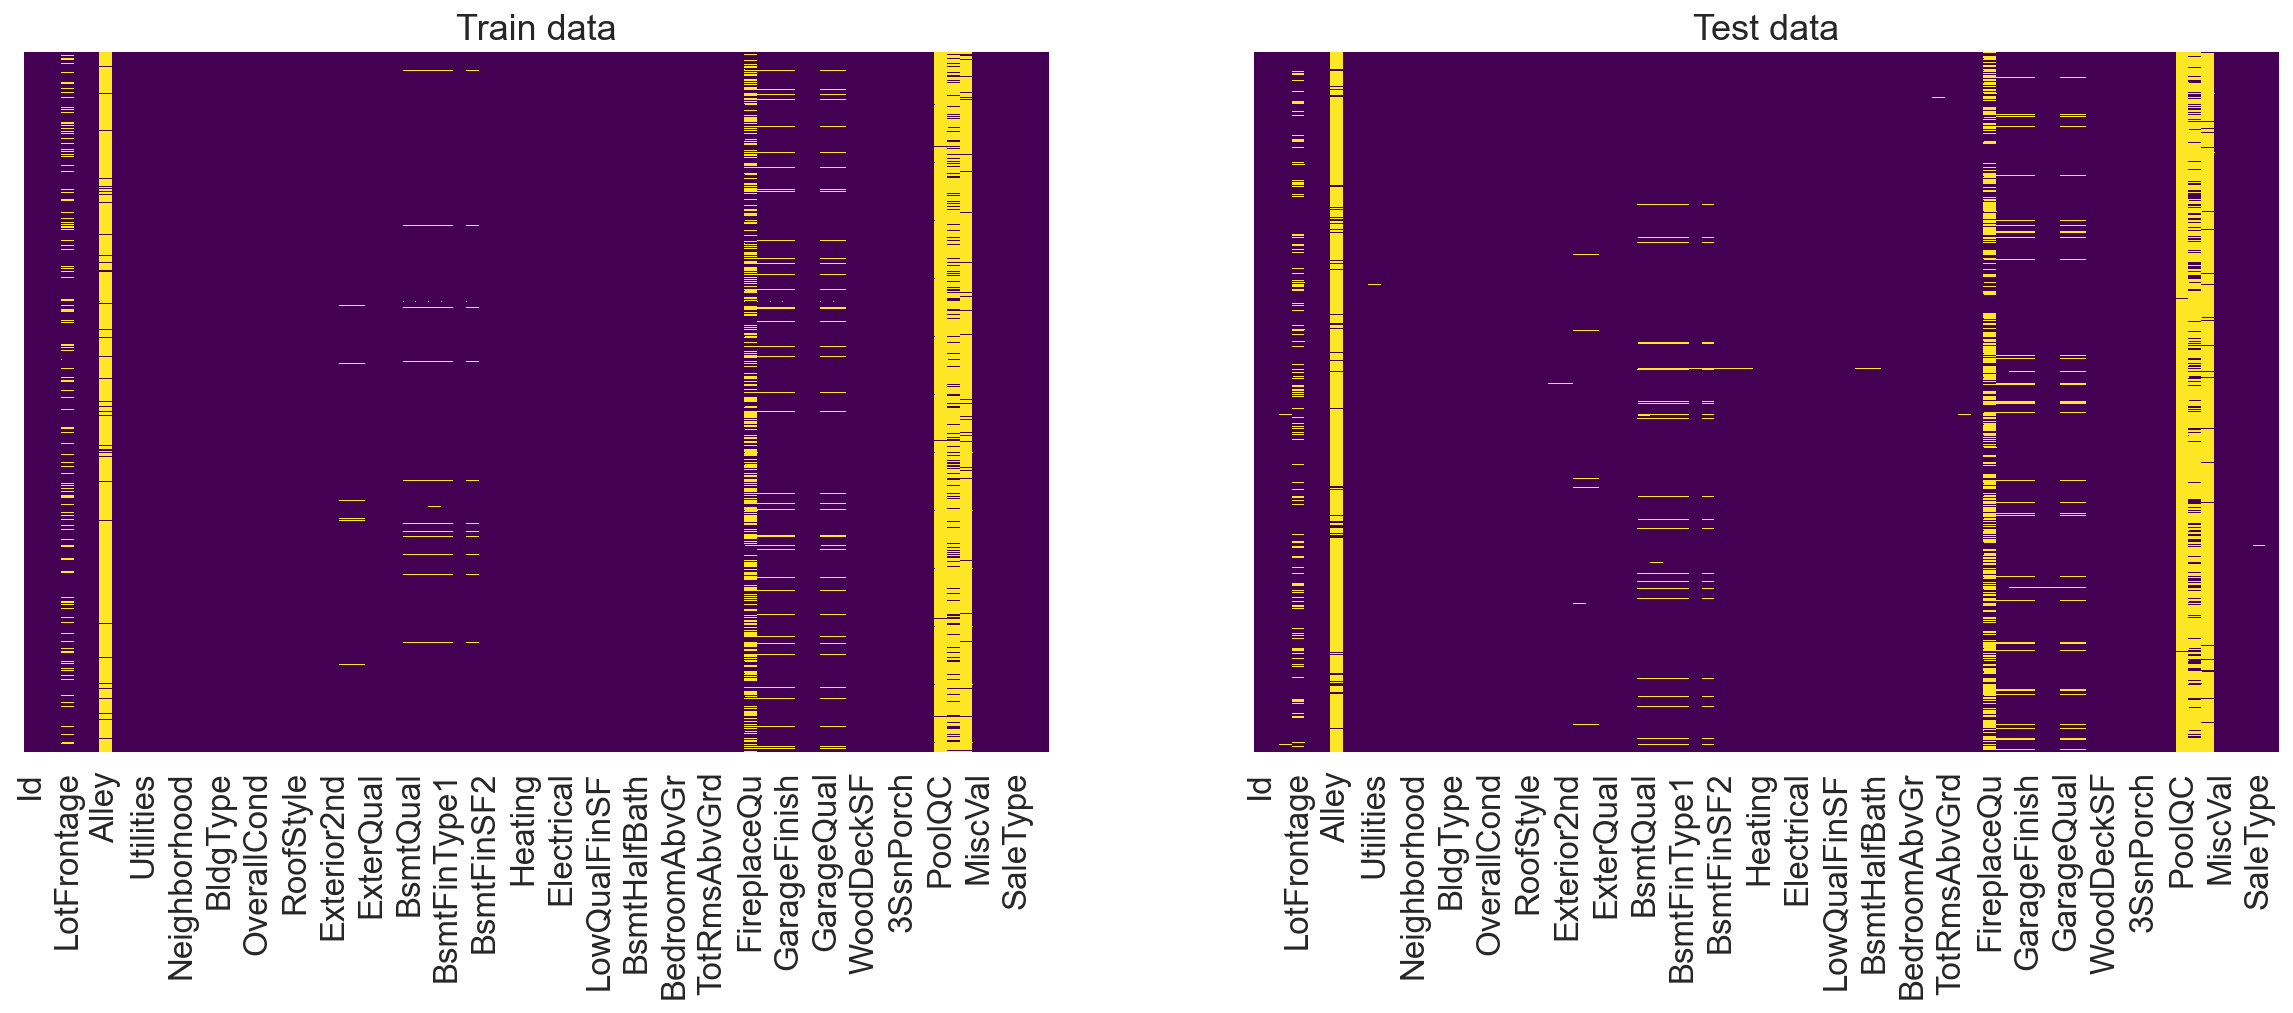

In [287]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 6))

# train data 
sns.heatmap(train.isnull(), yticklabels=False, ax = ax[0], cbar=False, cmap='viridis')
ax[0].set_title('Train data')

# test data
sns.heatmap(test.isnull(), yticklabels=False, ax = ax[1], cbar=False, cmap='viridis')
ax[1].set_title('Test data');



## Step 4: Data Preprocessing 

---

### Step A: Dealing with Missing Values: 


In [272]:
train.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

In [273]:
test.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 80, dtype: int64

In [524]:
#Dealing with Missing Values of 'Alley' Feature
#in documntaion N/A value means No alley access so, 
#it dose not mean a misiing value we replace it to 0 and "Grvl" = 1 ,  "Pave"= 2
#on train:
title_mapping = {"Grvl": 1, "Pave": 2 , np.nan: 0} 
train['Alley'] = train['Alley'].map(title_mapping)
#on test:
title_mapping = {"Grvl": 1, "Pave": 2 , np.nan: 0} 
test['Alley'] = test['Alley'].map(title_mapping)
#Dealing with Missing Values of 'LotFrontage' Feature
#on train:
train.LotFrontage.replace(np.nan , train.LotFrontage.mean() , inplace=True)
#on test:
test.LotFrontage.replace(np.nan , test.LotFrontage.mean() , inplace=True)
#Dealing with Missing Values of 'MasVnrType' Feature
#on train:
train.MasVnrType.replace(np.nan , 'None'  , inplace=True)# None it's a value in MasVnrType we set type of Veneer is not provided
#on test:
test.MasVnrType.replace(np.nan , 'None'  , inplace=True)# highest value 
#Dealing with Missing Values of 'MasVnrArea' Feature
#on train:
train.MasVnrArea.replace(np.nan , 0.0  , inplace=True)
#on test:
test.MasVnrArea.replace(np.nan , 0.0  , inplace=True)
#Dealing with Missing Values of 'BsmtQual' Feature
#on train:
train.BsmtQual.replace(np.nan , 'NB'  , inplace=True)#NB = NO Basement 
#on test:
test.BsmtQual.replace(np.nan , 'NB'  , inplace=True)#NB = NO Basement 
#Dealing with Missing Values of 'BsmtCond' Feature
#on train:
train.BsmtCond.replace(np.nan , 'NB'  , inplace=True) #NB = NO Basement 
#on test:
test.BsmtCond.replace(np.nan , 'NB'  , inplace=True) #NB = NO Basement 
#Dealing with Missing Values of 'BsmtExposure' Feature
#on train:
train.BsmtExposure.replace(np.nan , 'NB'  , inplace=True) #NB = NO Basement 
#on test:
test.BsmtExposure.replace(np.nan , 'NB'  , inplace=True) #NB = NO Basement 
#Dealing with Missing Values of 'BsmtFinType1' Feature
#on train:
train.BsmtFinType1.replace(np.nan , 'NB'  , inplace=True) #NB = NO Basement 
#on test:
test.BsmtFinType1.replace(np.nan , 'NB'  , inplace=True) #NB = NO Basement 
#Dealing with Missing Values of 'BsmtFinType2' Feature
#on train:
train.BsmtFinType2.replace(np.nan , 'NB'  , inplace=True) #NB = NO Basement 
#on test:
test.BsmtFinType2.replace(np.nan , 'NB'  , inplace=True) #NB = NO Basement   
#Dealing with Missing Values of 'Electrical' Feature
#on train:
train.Electrical.replace(np.nan , 'SBrkr'  , inplace=True) #the highest value
#on test:
test.Electrical.replace(np.nan , 'SBrkr'  , inplace=True) 
#Dealing with Missing Values of 'FireplaceQu' Feature
#on train:
train.FireplaceQu.replace(np.nan , 'NF'  , inplace=True)   #NF No Fireplace
#on test:
test.FireplaceQu.replace(np.nan , 'NF'  , inplace=True)   #NF No Fireplace
#Dealing with Missing Values of 'GarageType' Feature
#on train:
train.GarageType.replace(np.nan , 'NG'  , inplace=True) #NG No Garage
#on test:
test.GarageType.replace(np.nan , 'NG'  , inplace=True) #NG No Garage
#Dealing with Missing Values of 'GarageYrBlt' Feature
#since the house has graage type = NG (means No Garage) we set GarageYrBlt to 0
#on train:
for i , item in train.GarageType.iteritems() :
    if item  == 'NG':#NG No Garage  
         train.GarageYrBlt.iloc[i]=0
        
#on test:
for i , item in test.GarageType.iteritems():
    if item  == 'NG':#NG No Garage  
         test.GarageYrBlt.iloc[i] = 0
    else:
        test.GarageYrBlt.replace(np.nan ,  test.GarageYrBlt.mean() , inplace=True)     
        
        
#Dealing with Missing Values of 'GarageFinish' Feature
#on train:
train.GarageFinish.replace(np.nan , 'NG'  , inplace=True) #NG No Garage
#on test:
test.GarageFinish.replace(np.nan , 'NG'  , inplace=True) #NG No Garage
#Dealing with Missing Values of 'GarageQual' Feature
#on train:
train.GarageQual.replace(np.nan , 'NG'  , inplace=True) #NG No Garage
#on test:
test.GarageQual.replace(np.nan , 'NG', inplace=True) #NG No Garage
#Dealing with Missing Values of 'GarageCond' Feature
#on train:
train.GarageCond.replace(np.nan , 'NG'  , inplace=True) #NG No Garage
#on test:
test.GarageCond.replace(np.nan , 'NG'  , inplace=True) #NG No Garage
#Dealing with Missing Values of 'PoolQC' Feature
#on train:
train.PoolQC.replace(np.nan , 'NP'  , inplace=True) #NP = No Pool
#on test:
test.PoolQC.replace(np.nan , 'NP'  , inplace=True) #NP = No Pool
#Dealing with Missing Values of 'Fence' Feature
#on train:
train.Fence.replace(np.nan , 'NF'  , inplace=True) #NF = No Fence
#on test:
test.Fence.replace(np.nan , 'NF'  , inplace=True) #NF = No Fence
#Dealing with Missing Values of 'MiscFeature' Feature
#on train:
train.MiscFeature.replace(np.nan , 'None'  , inplace=True) 
#on test:
test.MiscFeature.replace(np.nan , 'None'  , inplace=True) 
#Dealing with Missing Values of 'MSZoning' Feature
#just on test:
test.MSZoning.replace(np.nan , 'RL'  , inplace=True) #the highest value 
#Dealing with Missing Values of 'Utilities' Feature
#just on test:
test.Utilities.replace(np.nan , test.Utilities.mode()[0]  , inplace=True) 
#Dealing with Missing Values of 'Exterior1st , Exterior2nd' Features
#just on test:
test.Exterior1st.replace(np.nan , test.Utilities.mode()[0]  , inplace=True) 
test.Exterior2nd.replace(np.nan , test.Exterior2nd.mode()[0]  , inplace=True) 
#Dealing with Missing Values of 'BsmtFinSF1 , BsmtFinType2' Features
#just on test in "BsmtFinSF1" :
for i , item in test.BsmtFinType1.iteritems() :
    if item  == 'NB':#NB = NO Basement  
        if test.BsmtFinSF1.iloc[i]==np.nan:
             test.BsmtFinSF1.iloc[i]= 0
        else:
             test.BsmtFinSF1.iloc[i]=test.BsmtFinSF1.mean() 
        
#just on test in "BsmtFinSF2" :
for i , item in test.BsmtFinType2.iteritems() :
    if item  == 'NB':#NB = NO Basement  
        if test.BsmtFinSF2.iloc[i]==np.nan:
             test.BsmtFinSF2.iloc[i]= 0
        else:
             test.BsmtFinSF2.iloc[i]=test.BsmtFinSF2.mean() 


In [525]:

#Dealing with Missing Values of Features in test data:
#just on test:
test.BsmtUnfSF.replace(np.nan , test.BsmtUnfSF.mean() , inplace=True) 
# test.BsmtUnfSF.replace(np.nan , test.TotalBsmtSF.mean() , inplace=True) 
test.BsmtFullBath.replace(np.nan , test.BsmtFullBath.mean() , inplace=True)  # check if there is a basement to enhance our model 
test.TotalBsmtSF.replace(np.nan , test.TotalBsmtSF.mean() , inplace=True) # check if there is a basement to enhance our model 
test.BsmtHalfBath.replace(np.nan , 0 , inplace=True) # we set nan values to 0 beacuse there is no basement 
test.KitchenQual.replace(np.nan , test.KitchenQual.mode()[0]  , inplace=True)
test.Functional.replace(np.nan , test.Functional.mode()[0]  , inplace=True) 
test.GarageCars.replace(np.nan , test.GarageCars.mean()  , inplace=True) 
test.GarageArea.replace(np.nan , test.GarageArea.mean()  , inplace=True) 
test.Functional.replace(np.nan , test.Functional.mode()[0]  , inplace=True) 
test.SaleType.replace(np.nan , test.SaleType.mode()[0]  , inplace=True) 

In [526]:
train.isna().sum().sum()

0

In [527]:
test.isna().sum().sum()

0

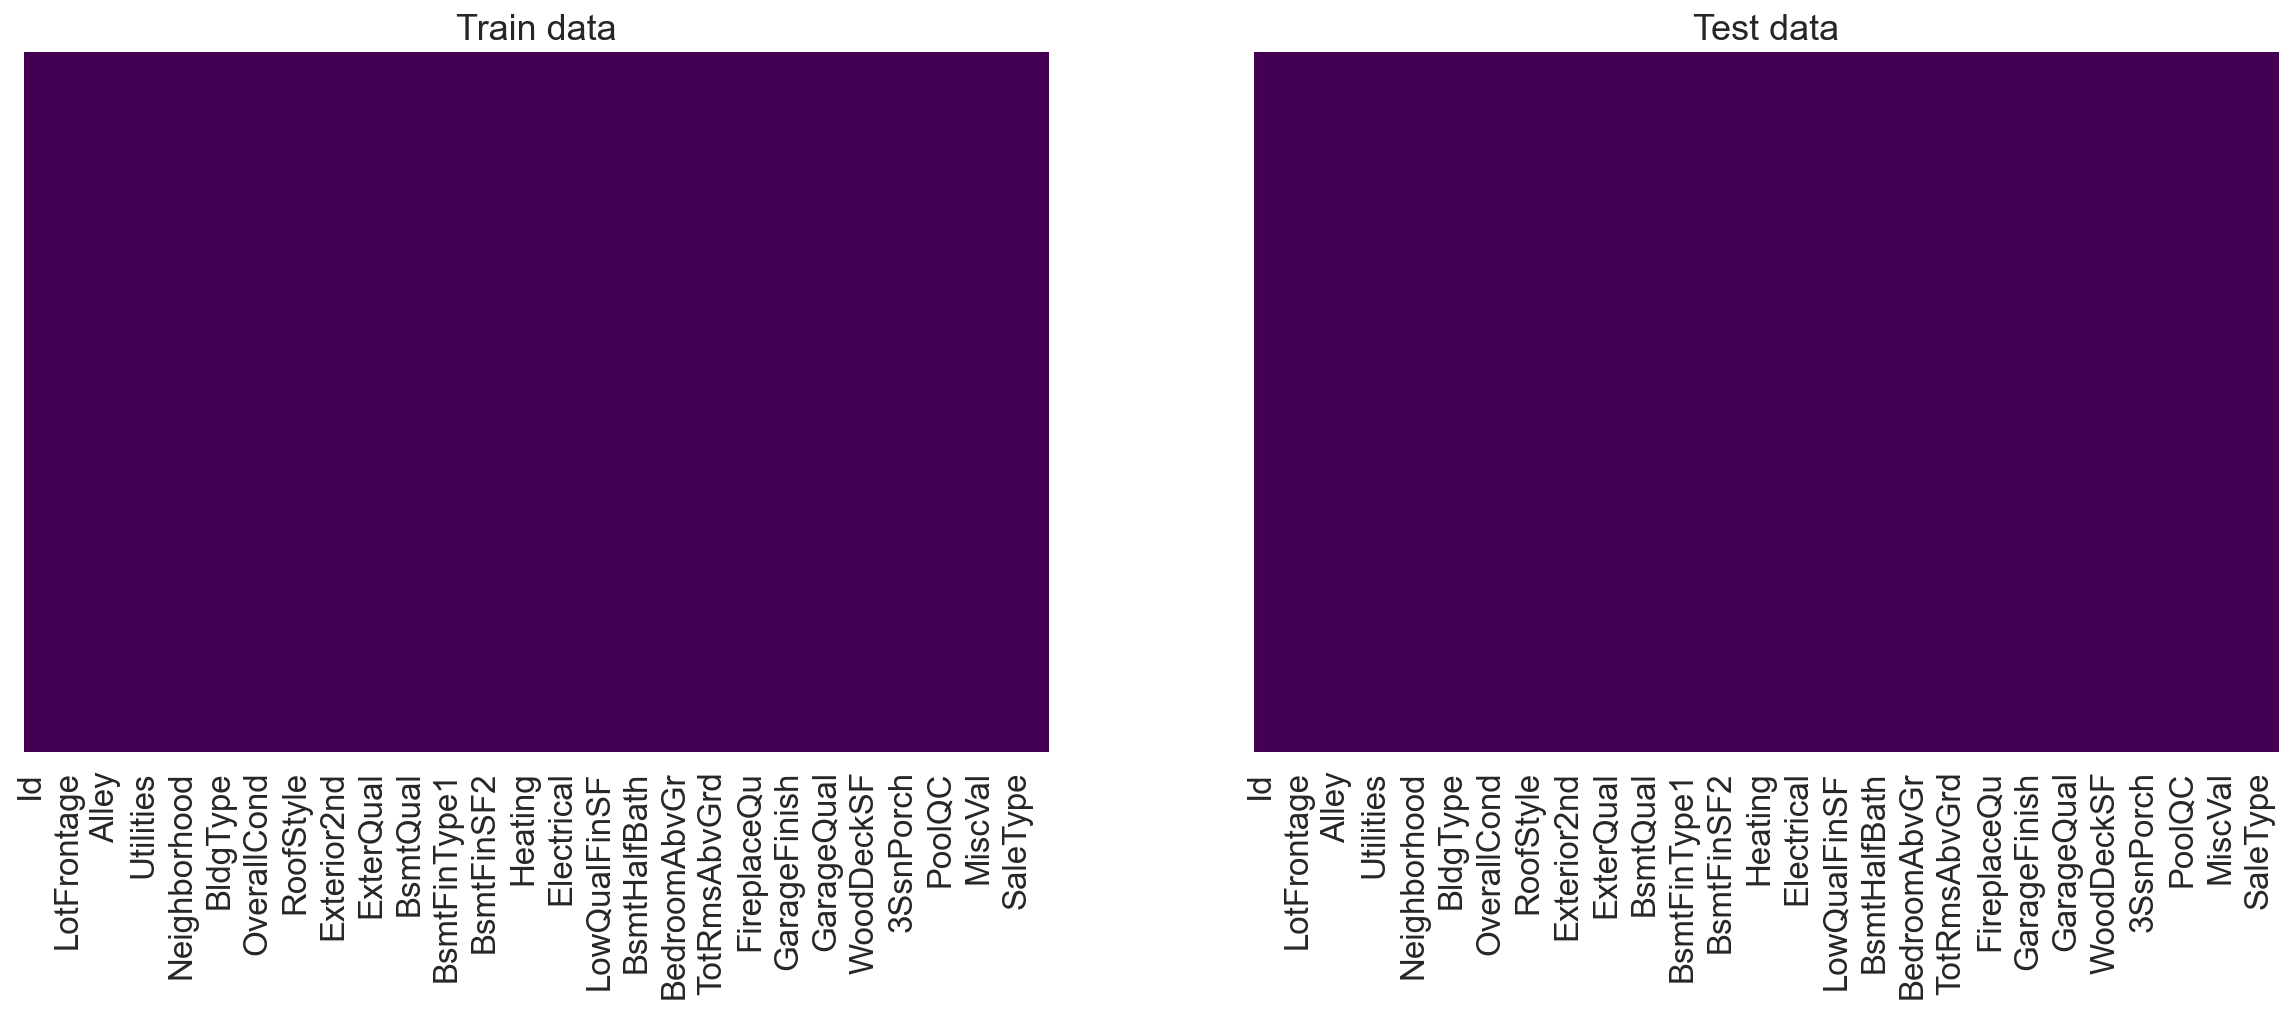

In [432]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 6))

# train data 
sns.heatmap(train.isnull(), yticklabels=False, ax = ax[0], cbar=False, cmap='viridis')
ax[0].set_title('Train data')

# test data
sns.heatmap(test.isnull(), yticklabels=False, ax = ax[1], cbar=False, cmap='viridis')
ax[1].set_title('Test data');


### Step B: Combinig Data of train and test: 

--------

In [569]:
train2= train[['Id','OverallQual' , 'GarageArea' ,'GrLivArea' , 'TotalBsmtSF' , 'YearBuilt' , 'Fireplaces' , 
'FullBath' ,'MasVnrArea' , 'YearRemodAdd' , 'OpenPorchSF' , 'BsmtFinSF1' , 'WoodDeckSF' , 'LotFrontage','BsmtExposure'
,'Foundation' ,'Exterior1st','BldgType','Neighborhood', 'LotConfig' , 'Exterior2nd'  , 'SalePrice']]
test2 = test[['Id','OverallQual' , 'GarageArea' ,'GrLivArea' , 'TotalBsmtSF' , 'YearBuilt' , 'Fireplaces' , 
'FullBath' ,'MasVnrArea' , 'YearRemodAdd' , 'OpenPorchSF' , 'BsmtFinSF1' , 'WoodDeckSF' , 'LotFrontage','BsmtExposure'
,'Foundation' ,'Exterior1st','BldgType','Neighborhood', 'LotConfig' ,'Exterior2nd' ]]
combain = pd.merge(train2, test2 , how='outer')
combain

Id  OverallQual  GarageArea  GrLivArea  TotalBsmtSF  YearBuilt  \
0        1            7       548.0       1710        856.0       2003   
1        2            6       460.0       1262       1262.0       1976   
2        3            7       608.0       1786        920.0       2001   
3        4            7       642.0       1717        756.0       1915   
4        5            8       836.0       2198       1145.0       2000   
...    ...          ...         ...        ...          ...        ...   
2914  2915            4         0.0       1092        546.0       1970   
2915  2916            4       286.0       1092        546.0       1970   
2916  2917            5       576.0       1224       1224.0       1960   
2917  2918            5         0.0        970        912.0       1992   
2918  2919            7       650.0       2000        996.0       1993   

      Fireplaces  FullBath  MasVnrArea  YearRemodAdd  ...  WoodDeckSF  \
0              0         2       196.0          2003  ...           0   
1              1         2         0.0          1976  ...         298   
2              1         2       162.0          2002  ...           0   
3              1         1         0.0          1970  ...           0   
4              1         2       350.0          2000  ...         192   
...          ...       ...         ...           ...  ...         ...   
2914           0         1         0.0          1970  ...           0   
2915           0         1         0.0          1970  ...           0   
2916           1         1         0.0          1996  ...         474   
2917           0         1         0.0          1992  ...          80   
2918           1         2        94.0          1994  ...         190   

      LotFrontage  BsmtExposure  Foundation Exterior1st BldgType Neighborhood  \
0            65.0            No       PConc     VinylSd     1Fam      CollgCr   
1            80.0            Gd      CBlock     MetalSd     1Fam      Veenker   
2            68.0            Mn       PConc     VinylSd     1Fam      CollgCr   
3            60.0            No      BrkTil     Wd Sdng     1Fam      Crawfor   
4            84.0            Av       PConc     VinylSd     1Fam      NoRidge   
...           ...           ...         ...         ...      ...          ...   
2914         21.0            No      CBlock     CemntBd    Twnhs      MeadowV   
2915         21.0            No      CBlock     CemntBd   TwnhsE      MeadowV   
2916        160.0            No      CBlock     VinylSd     1Fam      Mitchel   
2917         62.0            Av       PConc     HdBoard     1Fam      Mitchel   
2918         74.0            Av       PConc     HdBoard     1Fam      Mitchel   

     LotConfig Exterior2nd SalePrice  
0       Inside     VinylSd  208500.0  
1          FR2     MetalSd  181500.0  
2       Inside     VinylSd  223500.0  
3       Corner     Wd Shng  140000.0  
4          FR2     VinylSd  250000.0  
...        ...         ...       ...  
2914    Inside     CmentBd       NaN  
2915    Inside     CmentBd       NaN  
2916    Inside     VinylSd       NaN  
2917    Inside     Wd Shng       NaN  
2918    Inside     HdBoard       NaN  

[2919 rows x 22 columns]



### Step B: Dummies the columns: 

--------


In [507]:
num_var = [f for f in combain.columns if combain.dtypes[f] != 'object']

Q1 = combain.quantile(0.25)

Q3 = combain.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

combain1 = combain[~((combain < (Q1 - 1.5 * IQR)) |(combain > (Q3 + 1.5 * IQR))).any(axis=1)]
combain1.shape

In [570]:
combain_data = pd.get_dummies(combain,drop_first=True)
combain_data.shape

(2919, 86)

In [571]:
train3=combain_data.iloc[:563]
test3=combain_data.iloc[563:]

## Step 5:  Modeling







- **Choosing the target and the predectors for the models:**

- We investigated features on the dataset and we choose model's features based on their correlation with each other and with the target (sale price)

In [528]:
num_var = [f for f in train.columns if train.dtypes[f] != 'object']
num_var.remove('SalePrice')
num_var.remove('Id')
train1 = train.drop(['SalePrice'] , axis=1)
X_train = train[num_var]
y_train = train.SalePrice
X_test=test[num_var]

- **Scalling**

In [529]:
ss = StandardScaler()
Xs_train = ss.fit_transform(X_train)
Xs_test=ss.transform(X_test)
print(Xs_train.shape , y_train.shape)

(1460, 37) (1460,)


### Baseline model:
----



In [481]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

lr_baseline = LinearRegression()
lr_baseline.fit(Xs_train,y_train)
lr_baseline.score(Xs_train,y_train)

0.8168008135247747

In [482]:
y_pred_test = lr_baseline.predict(Xs_test)
y_pred_trai=lr_baseline.predict(Xs_train)

- **Calculate the RMSE error**

In [485]:
print(f"RMSE Train: {math.sqrt(mean_squared_error(y_train, y_pred_trai))}")
print(f"R Squared Train: {r2_score(y_train, y_pred_trai)}")
print(np.std(train['SalePrice']))
print(np.mean(train['SalePrice']))

RMSE Train: 33991.153821358115
R Squared Train: 0.8168008135247747
79415.29188606751
180921.19589041095


In [487]:
submission = pd.DataFrame({
   "Id": test["Id"],
    "SalePrice": y_pred_test
  })
submission.to_csv('submission_BL_100.csv', index=False)

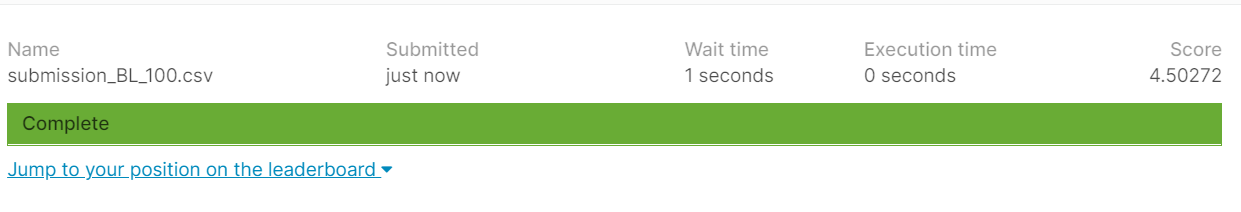


 ### RidgeCV model :
----

In [488]:
from sklearn.linear_model import RidgeCV

ridgecv = RidgeCV()   
ridgecv.fit(Xs_train, y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]))

In [489]:
ridgecv.score(Xs_train, y_train)

0.8167400985090394

In [492]:
ridgecv.alpha_

10.0

In [493]:
re_rigecv=ridgecv.predict(Xs_test)

In [495]:
submission = pd.DataFrame({
   "Id": test["Id"],
    "SalePrice": re_rigecv
  })
submission.to_csv('submission_Rigecv_100.csv', index=False)

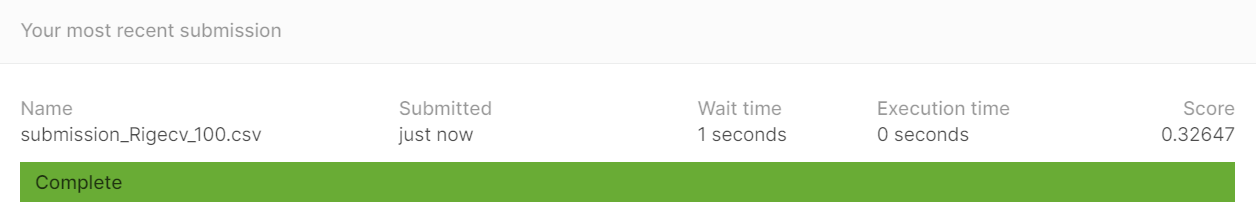

 ### Ridge model :
----

In [496]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression

ridge = Ridge( )
reg=ridge.fit(Xs_train, y_train)
scores = cross_val_score(reg, Xs_train, y_train, cv=10 )
print("Cross-validated scores:", scores)
print("Mean of Cross-validated scores:", scores.mean())

Cross-validated scores: [0.8423 0.8621 0.8879 0.7513 0.8307 0.835  0.8229 0.818  0.506  0.8378]
Mean of Cross-validated scores: 0.7994005676220568


In [498]:
print(reg.score(Xs_train, y_train))


0.8167639842462977


In [499]:
pre_ridge=ridge.predict(Xs_test)

In [500]:
submission = pd.DataFrame({
   "Id": test["Id"],
    "SalePrice": pre_ridge
  })
submission.to_csv('submission_Rige_200.csv', index=False)

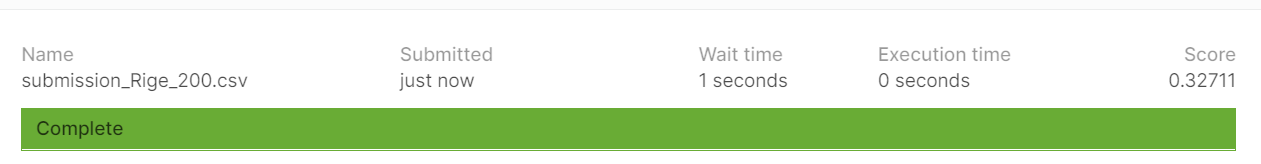

 ### LassoCV model :
----

In [501]:
 from sklearn.linear_model import LassoCV
lassocv = LassoCV(random_state=0 , verbose =1)
lassocv.fit(Xs_train, y_train)
scores_lasso = cross_val_score(lassocv, Xs_train, y_train, cv=10)
print("Ridge Cross-validated R2-scores:", scores_lasso)
print("Mean of Ridge Cross-validated R2-scores:", scores_lasso.mean())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
....................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
............................................................................................................................................................................................................................................................................

Ridge Cross-validated R2-scores: [0.844  0.8345 0.8905 0.7518 0.8194 0.8097 0.8255 0.814  0.5127 0.8451]
Mean of Ridge Cross-validated R2-scores: 0.7947175011637759


...............................................................................................................................................................................[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s finished


In [502]:
lassocv.score(Xs_train, y_train)

0.8155233685757899

In [503]:
pre=lassocv.predict(Xs_test)

In [504]:
submission = pd.DataFrame({
   "Id": test["Id"],
    "SalePrice": pre
  })
submission.to_csv('submission_lasso_100.csv', index=False)

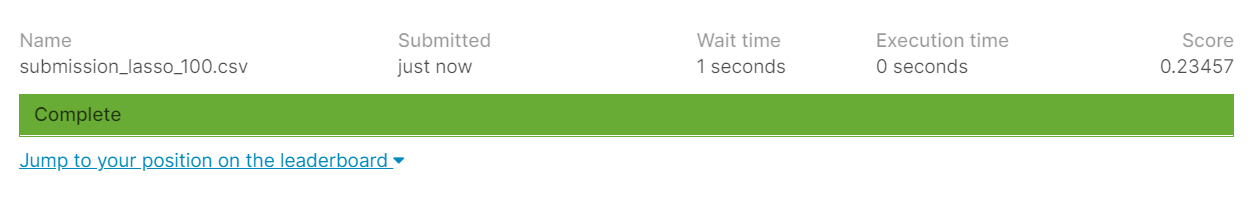

 ### Lasso model :
----

In [505]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(Xs_train, y_train)
scores = cross_val_score(lasso, Xs_train, y_train, cv=10)
print("Cross-validated scores:", scores)
print("Mean of Cross-validated scores:", scores.mean())


Cross-validated scores: [0.8422 0.8621 0.8879 0.7512 0.8307 0.8349 0.8228 0.8179 0.5059 0.8377]
Mean of Cross-validated scores: 0.799338027648352


In [506]:
lasso.score( Xs_train, y_train)

0.8167642345832515

In [509]:
pre_lasso=lasso.predict(Xs_test)

In [510]:
submission = pd.DataFrame({
   "Id": test["Id"],
    "SalePrice": pre_lasso
  })
submission.to_csv('submission_lasso_200.csv', index=False)

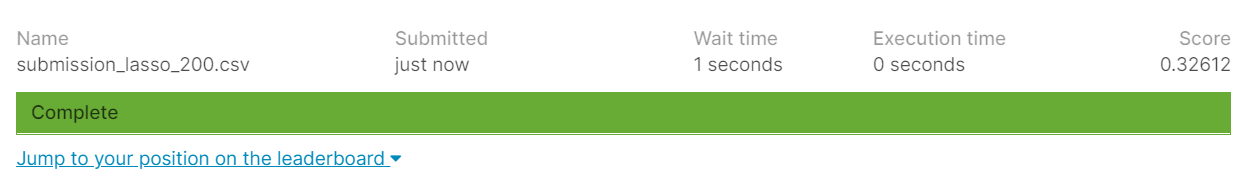

 ### ElasticNetCV model :
----

In [512]:
 from sklearn.linear_model import ElasticNetCV

regr = ElasticNetCV(l1_ratio= 0.5,cv=5, random_state=0 , n_alphas=100)
regr.fit(Xs_train, y_train)
print(regr.alpha_)
regr.score(Xs_train, y_train)

125.63206937374352


0.1426648387138768

In [513]:
pre_ElasticNetCV_100 = regr.predict(Xs_test)

In [514]:
submission = pd.DataFrame({
   "Id": test["Id"],
    "SalePrice": pre_ElasticNetCV_100
  })

submission.to_csv('submission_ElasticNetCV_100.csv', index=False)

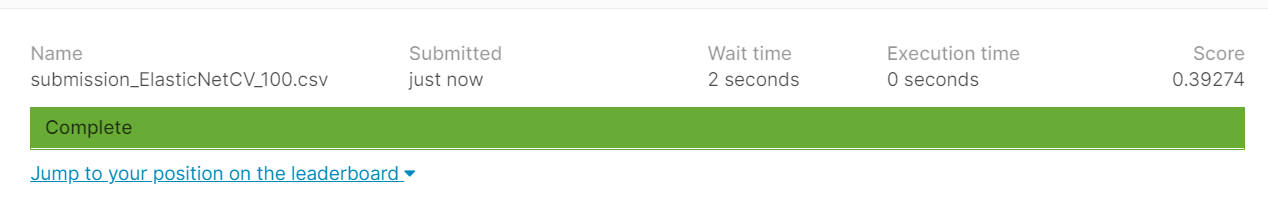

 ### ElasticNet model :
----

In [515]:
>>> from sklearn.linear_model import ElasticNet
el = ElasticNet( l1_ratio=0.5)
el1=el.fit(Xs_train, y_train)
scores = cross_val_score(el1, Xs_train, y_train, cv=10)
print("Cross-validated scores:", scores)
print("Mean of Cross-validated scores:", scores.mean())
print(el.score(Xs_train, y_train))
y_pre11=el.predict(Xs_test)

Cross-validated scores: [0.8459 0.8362 0.875  0.7549 0.7953 0.8244 0.8236 0.8085 0.533  0.8465]
Mean of Cross-validated scores: 0.7943294309537143
0.7976859678277471


In [516]:
submission = pd.DataFrame({
   "Id": test["Id"],
    "SalePrice": y_pre11
  })

submission.to_csv('submission_ElasticNet.csv', index=False)

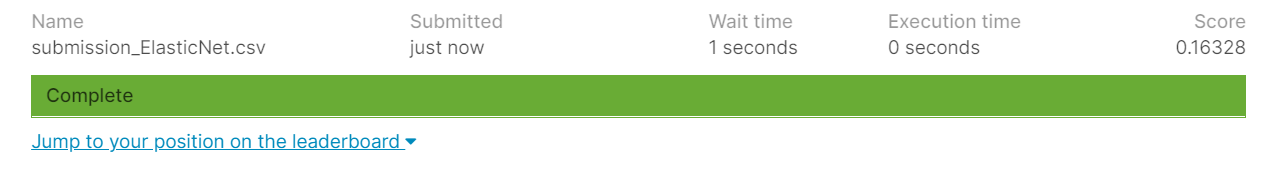

 ### Random Forest Regressor model :
------------

In [530]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(Xs_train, y_train)
regressor.score(Xs_train, y_train)
predictions = regressor.predict(Xs_test)

In [531]:
regressor.score(Xs_train, y_train)

0.9792787750191639

In [533]:
#First, check score to see if the fitted model is reasonable
y_pred_train = regressor.predict(Xs_train)
print(f"RMSE Train: {math.sqrt(mean_squared_error(y_train, y_pred_train))}")
print(f"R Squared Train: {r2_score(y_train, y_pred_train)}")
print(np.std(train['SalePrice']))
print(np.mean(train['SalePrice']))


RMSE Train: 11431.727130385489
R Squared Train: 0.9792787750191639
79415.29188606751
180921.19589041095


In [534]:
submission = pd.DataFrame({
   "Id": test["Id"],
    "SalePrice": predictions
  })

submission.to_csv('submission_regressor_100.csv', index=False)

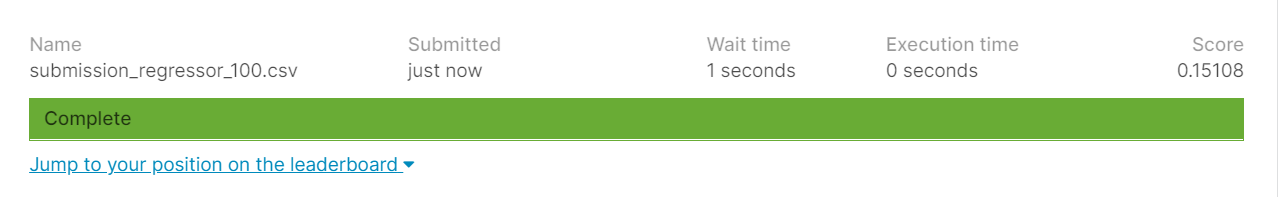

### Random Forest Regressor model using Pipeline and Grid Search

------------ 

In [535]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
lr_pipe2 = Pipeline([
    ('sscaler2', StandardScaler()),
    ('rf', RandomForestRegressor()
)
])

pipe_2_params = { 'sscaler2__with_mean': [True, False], 
                 'sscaler2__with_std': [True, False],
                 'rf__bootstrap': [True],
                  'rf__max_depth': [14],
                 'rf__max_features': [2,6,8,10],
                 'rf__min_samples_leaf': [3],
                 'rf__min_samples_split': [8],
                 'rf__n_estimators': [100,200,300]
                                   }
   
pipe_2_gridsearch = GridSearchCV(lr_pipe2, 
                                 pipe_2_params, 
                                 cv=5, 
                                 verbose=1 ,n_jobs=1 )




In [536]:
pipe_2_gridsearch.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:  2.4min finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('sscaler2', StandardScaler()),
                                       ('rf', RandomForestRegressor())]),
             n_jobs=1,
             param_grid={'rf__bootstrap': [True], 'rf__max_depth': [14],
                         'rf__max_features': [2, 6, 8, 10],
                         'rf__min_samples_leaf': [3],
                         'rf__min_samples_split': [8],
                         'rf__n_estimators': [100, 200, 300],
                         'sscaler2__with_mean': [True, False],
                         'sscaler2__with_std': [True, False]},
             verbose=1)

In [537]:
pre=pipe_2_gridsearch.predict(Xs_test)

In [538]:
submission = pd.DataFrame({
   "Id": test["Id"],
    "SalePrice": pre
  })

submission.to_csv('submission_RandomForestRegresso_GS_100.csv', index=False)

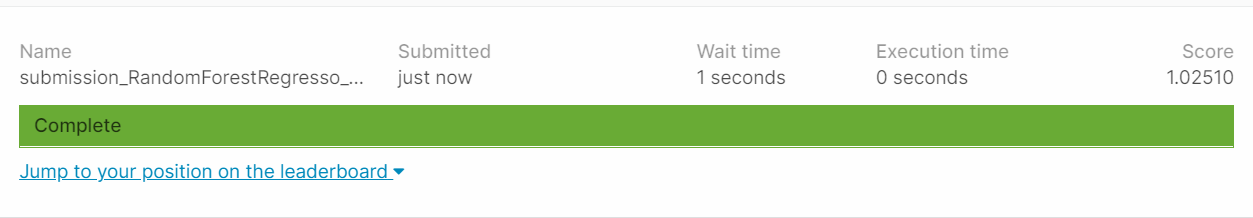

### Lasso Grid Search 

In [539]:
#pipe_2_gridsearch.best_score_
model_lasso = Lasso(max_iter=100000)
grid_params = {'alpha':[1.e-5, 3.e-5, 0.0001, 0.0003, 0.001, 0.003, 0.1, 0.3]}
grid_params = {'alpha':np.linspace(0.0001, 0.001, 50)}
reg_lasso = GridSearchCV(model_lasso, grid_params, 
                             cv=5, verbose=3, n_jobs=-1, 
                             scoring = 'neg_root_mean_squared_error',
                             return_train_score=True) # r2
model = reg_lasso.fit(Xs_train, y_train)
reg_lasso.fit(Xs_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   14.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   54.0s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  1.8min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Done  47 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 152 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  3.5min finished


GridSearchCV(cv=5, estimator=Lasso(max_iter=100000), n_jobs=-1,
             param_grid={'alpha': array([0.0001, 0.0001, 0.0001, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002,
       0.0002, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0004, 0.0004,
       0.0004, 0.0004, 0.0004, 0.0004, 0.0005, 0.0005, 0.0005, 0.0005,
       0.0005, 0.0006, 0.0006, 0.0006, 0.0006, 0.0006, 0.0007, 0.0007,
       0.0007, 0.0007, 0.0007, 0.0007, 0.0008, 0.0008, 0.0008, 0.0008,
       0.0008, 0.0009, 0.0009, 0.0009, 0.0009, 0.0009, 0.0009, 0.001 ,
       0.001 , 0.001 ])},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=3)

In [541]:
pre=reg_lasso.predict(Xs_test)

In [542]:
submission = pd.DataFrame({
   "Id": test["Id"],
    "SalePrice": pre
  })

submission.to_csv('submission_reg_lasso_GS_100.csv', index=False)

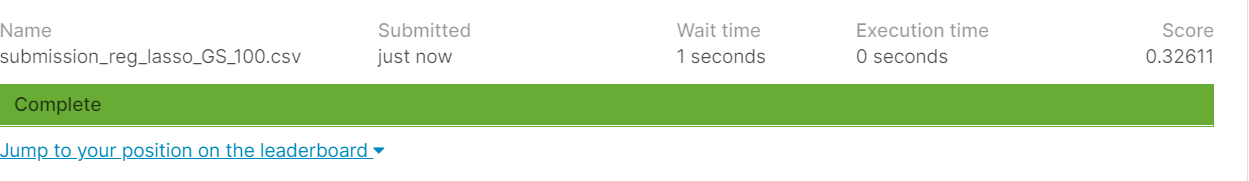


### Support Vector Machine (SVM)

In [543]:

from sklearn.svm import SVR
model_svr = SVR(C=20, epsilon=0.008, gamma=0.0003)
model_svr.fit(Xs_train,y_train)


SVR(C=20, epsilon=0.008, gamma=0.0003)

In [544]:

model_svr.score(Xs_train,y_train)


-0.04895654180878206

In [545]:
pred_svr= model_svr.predict(Xs_test)#0.4


In [547]:
submission = pd.DataFrame({
   "Id": test["Id"],
    "SalePrice": pred_svr
  })

submission.to_csv('submission_pred_svr_100.csv', index=False)

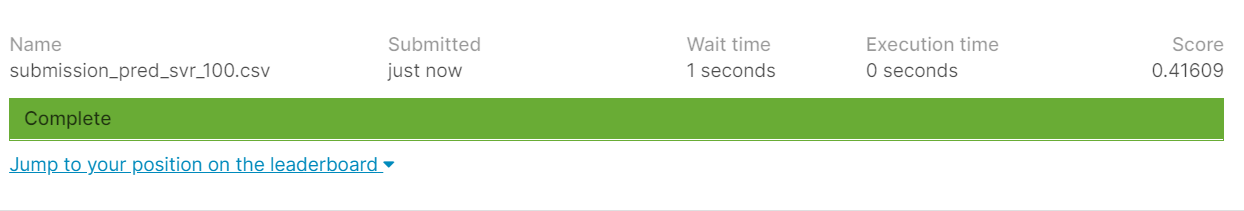

### Gradient Boosting Regressor

In [548]:
from sklearn.ensemble import GradientBoostingRegressor
Gboost=GradientBoostingRegressor()
Gboost.fit(Xs_train,y_train)
pred_Gboost= Gboost.predict(Xs_test)
Gboost.score(Xs_train, y_train)

0.9604613080287336

In [549]:
submission = pd.DataFrame({
   "Id": test["Id"],
    "SalePrice": pred_Gboost
  })

submission.to_csv('submission_pred_Gboost_100.csv', index=False)

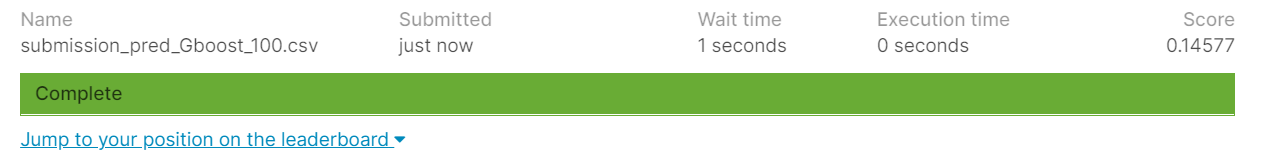

### Conclusion and Recommendations

- Our findings in this study is that house sale price affected by built year also, location zone seems to be important as well in deciding house price. There are also other features that play roles in afficting the sale price of the house like the total area of its basement, the living area, kitchen's quality, its foundation and the neighborhood of the house. Our target was predicting house sale price based on features.


----------------

In [567]:
scores ={'LR': 4.5027,'RedgeCV': 0.326,'Redge': 0.327, 'LassoCV': 0.234, 'Lasso': 0.326,'elastic_net_CV': 0.392, 'elastic_net': 0.163, 'Random': 0.151, 'RandomGS': 1.025, 'LassoGS' :0.326, 'SVM': 0.416, 'GBoost': 0.145
}

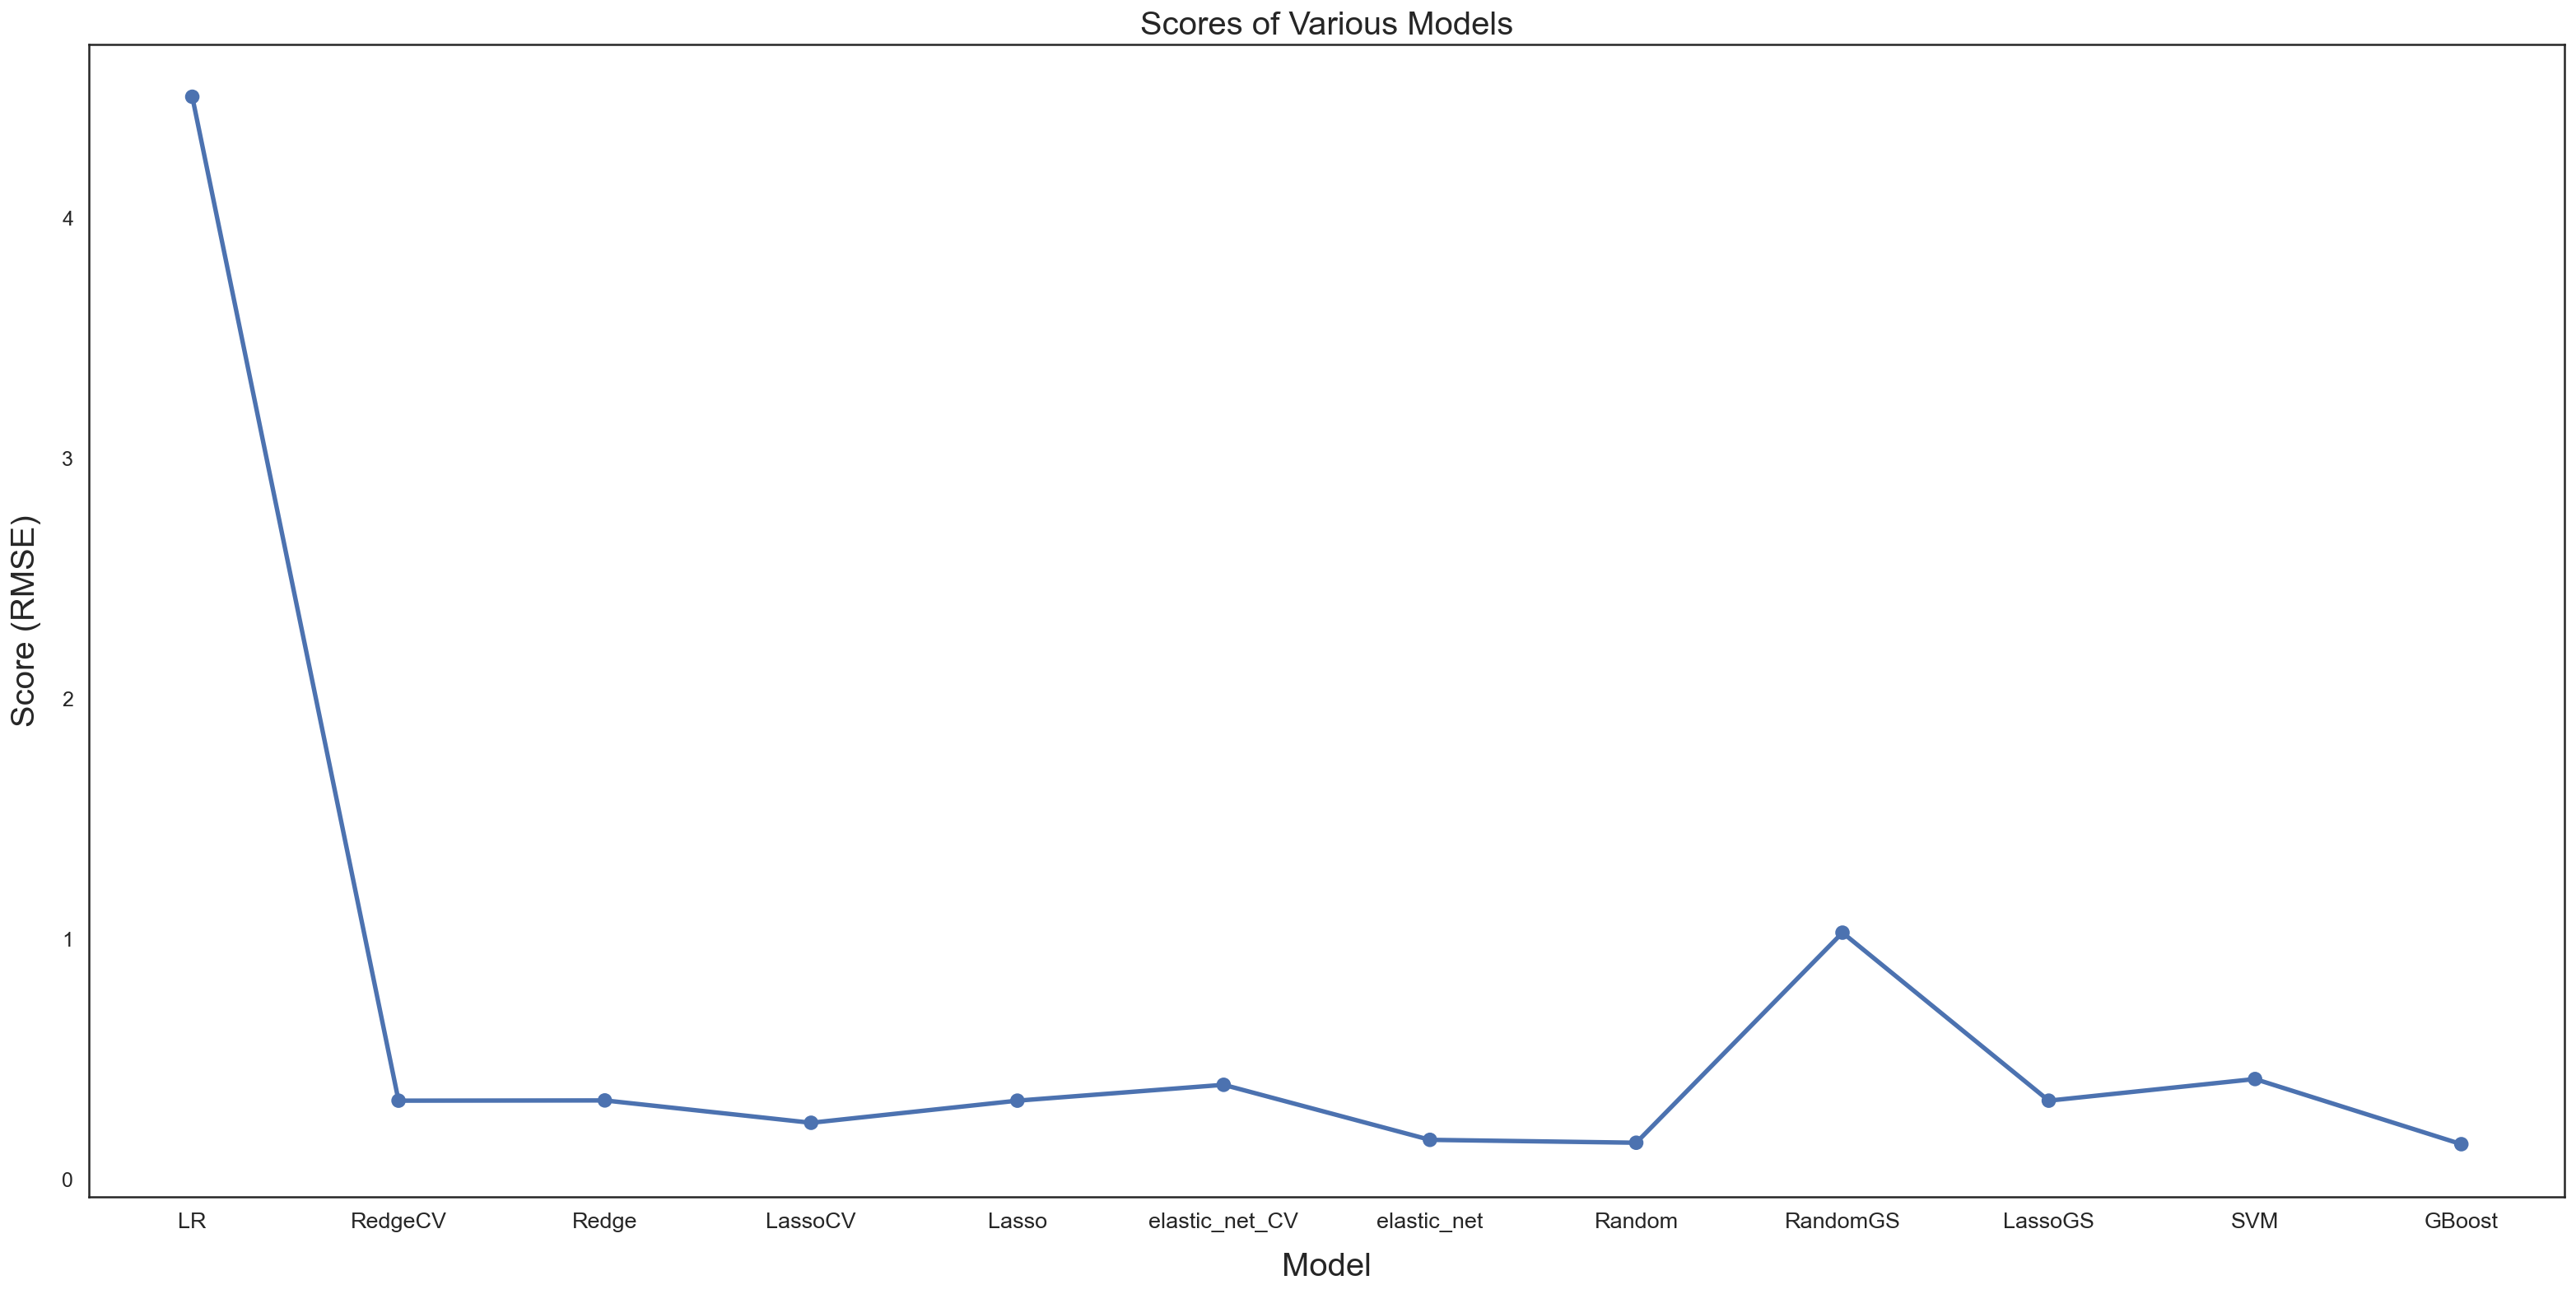

In [568]:
# Plot the predictions for each model
sns.set_style("white")
fig  = plt.figure(figsize=(24, 12))

ax=sns.pointplot(x=list(scores.keys()), y=[score for score in scores.values()], markers=['o'], linestyles=['-'])
# for i, score in enumerate(scores.values()):
#     ax.text(i, score[0] + 0.002, '{:.6f}'.format(score[0]), horizontalalignment='left', size='large', color='black', weight='semibold')

plt.ylabel('Score (RMSE)', size=20, labelpad=12.5)
plt.xlabel('Model', size=20, labelpad=12.5)
plt.tick_params(axis='x', labelsize=13.5)
plt.tick_params(axis='y', labelsize=12.5)

plt.title('Scores of Various Models', size=20)

plt.show();


- The plot above show us a comparsion between RMSE score of the implemented models in our project. And the model that have the lowest RMSE score is GBoost (Gradient Boosting Regressor) and it perform better than the baseline model. We believe our model generalized new data beacuse RSME score was 0.14 on new, unseen data that means it predict correctly beacuse the error rate was low.


### The Approvid  model

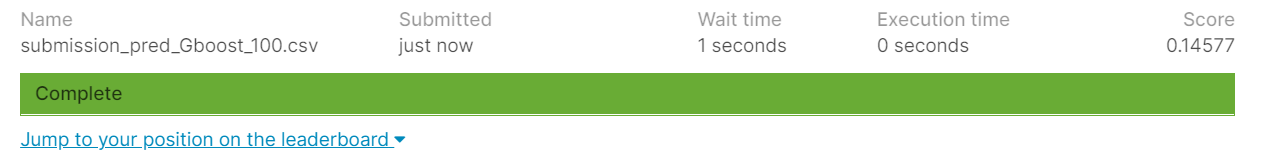